# <center><ins>COVID19 ANALYTICS</ins></center>

Una entidad gubernamental responsable de la gestión de la salud en un país enfrenta el desafío de comprender y analizar la propagación del COVID-19 para tomar decisiones informadas y eficaces en la gestión de la pandemia. Como científico de datos, tu tarea es analizar los datos relacionados con el COVID-19 y presentar insights a través de visualizaciones que respondan a las siguientes preguntas clave:

**Preguntas:**

1. ¿Cómo ha evolucionado el Covid-19 en **México-Perú-Colombia** en comparación con el impacto observado a nivel global?

2. ¿Cuál ha sido la evolución de los nuevos casos diarios reportados de Covid-19 en **México-Perú-Colombia** a lo largo del tiempo?

3. ¿Cuál es la evolución del índice de letalidad del Covid-19 en **México-Perú-Colombia**, comparado con los países con los índices históricos más elevados?

4. Desde una perspectiva demográfica, ¿cuáles son las características que tienen un mayor impacto en el índice de letalidad de un país?

5. ¿Relación entre el aumento de los nuevos casos diarios y los nuevos decesos diarios para los países **México-Perú-Colombia**?

6. ¿Cuál ha sido la evolución de los nuevos decesos diarios reportados de Covid-19 en **México-Perú-Colombia** a lo largo del tiempo?

7. ¿Cómo evolucionan los casos acumulados en todos los países a nivel mundial - Gráfico Coroplético?


## 1. Importando Nuestros Datasets

In [1]:
##Importando las librerías a utilizar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from io import StringIO
import requests

In [2]:
## Guardando en variables nuestros datasets
df_covid = pd.read_csv(StringIO(requests.get("https://covid19.who.int/WHO-COVID-19-global-data.csv").text))
df_population = pd.read_excel('https://raw.githubusercontent.com/davidcarrillo10288/Covid-19-analysis/master/WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1.xlsx', sheet_name=0, skiprows=16)
df_population = df_population[df_population['Year'] == 2019]

In [3]:
## Validando nuestro dataset Covid19
df_covid.head(8)

Date_reported Country_code      Country WHO_region  New_cases  \
0    2020-01-05           AF  Afghanistan       EMRO        NaN   
1    2020-01-12           AF  Afghanistan       EMRO        NaN   
2    2020-01-19           AF  Afghanistan       EMRO        NaN   
3    2020-01-26           AF  Afghanistan       EMRO        NaN   
4    2020-02-02           AF  Afghanistan       EMRO        NaN   
5    2020-02-09           AF  Afghanistan       EMRO        NaN   
6    2020-02-16           AF  Afghanistan       EMRO        NaN   
7    2020-02-23           AF  Afghanistan       EMRO        NaN   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0         NaN                  0  
1                 0         NaN                  0  
2                 0         NaN                  0  
3                 0         NaN                  0  
4                 0         NaN                  0  
5                 0         NaN                  0  
6                 0         NaN                  0  
7                 0         NaN                  0

In [4]:
df_population.head(8)

Index    Variant           Region, subregion, country or area * Notes  \
69      70  Estimates                                          WORLD   NaN   
142    143  Estimates                             Sub-Saharan Africa     b   
214    215  Estimates               Northern Africa and Western Asia   NaN   
286    287  Estimates                      Central and Southern Asia   NaN   
358    359  Estimates                 Eastern and South-Eastern Asia   NaN   
430    431  Estimates                Latin America and the Caribbean   NaN   
502    503  Estimates  Oceania (excluding Australia and New Zealand)   NaN   
574    575  Estimates                          Australia/New Zealand   NaN   

     Location code ISO3 Alpha-code ISO2 Alpha-code  SDMX code**        Type  \
69             900             NaN             NaN          1.0       World   
142           1834             NaN             NaN        202.0  SDG region   
214           1833             NaN             NaN        747.0  SDG region   
286           1831             NaN             NaN         62.0  SDG region   
358           1832             NaN             NaN        753.0  SDG region   
430           1830             NaN             NaN        419.0  SDG region   
502           1835             NaN             NaN        543.0  SDG region   
574           1836             NaN             NaN         53.0  SDG region   

     Parent code  ...  \
69             0  ...   
142         1828  ...   
214         1828  ...   
286         1828  ...   
358         1828  ...   
430         1828  ...   
502         1828  ...   
574         1828  ...   

     Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)  \
69                                             209.694                               
142                                            388.622                               
214                                            174.739                               
286                                            227.047                               
358                                            145.643                               
430                                            189.594                               
502                                            288.899                               
574                                             83.486                               

    Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)  \
69                                              146.21                                  
142                                            324.278                                  
214                                            113.261                                  
286                                            168.558                                  
358                                             86.283                                  
430                                            102.284                                  
502                                            197.772                                  
574                                             49.997                                  

    Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)  \
69                                              71.916                                            
142                                             173.83                                            
214                                              53.27                                            
286                                             75.217                                            
358                                             47.004                                            
430                                             66.231                                            
502                                            105.102                                        

## 2. Análisis Exploratorio de Datos (EDA)

### 2.1 EDA Base Covid World Health Organization

In [5]:
## Realizamos una visión general de nuestros tipos de datos
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50880 entries, 0 to 50879
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      50880 non-null  object 
 1   Country_code       49396 non-null  object 
 2   Country            49608 non-null  object 
 3   WHO_region         45792 non-null  object 
 4   New_cases          36622 non-null  float64
 5   Cumulative_cases   50880 non-null  int64  
 6   New_deaths         24216 non-null  float64
 7   Cumulative_deaths  50880 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.1+ MB


* Observamos que tenemos 7 columnas y 50640 registros.
* Notamos la presencia de valores nulos, esto se analizará posteriormente.
* Los tipos de datos son 3, (Objeto, entero, flotante).

### 2.1.1 Tratamiento de Valores nulos

In [6]:
## Importamos la Librería Missingno, para poder visualizar nuestros valores nulos presentes
import missingno as msno

In [7]:
## Verificando la presencia de valores nulos en el dataset
df_covid.isnull().sum().sort_values(ascending=False)

New_deaths           26664
New_cases            14258
WHO_region            5088
Country_code          1484
Country               1272
Date_reported            0
Cumulative_cases         0
Cumulative_deaths        0
dtype: int64

* Observamos que existe presencia de datos nulos.
* Tenemos que validar la relación que existen entre datos nulos.
* La presencia de datos nulos en variables como 'country_code' y 'country', nos generan alerta, ya que de no tener datos para estas columnas, esto no generaría valor para el dataset.
* Se evaluará la posibilidad de eliminar ciertas filas que tengan presencia de valores nulos.

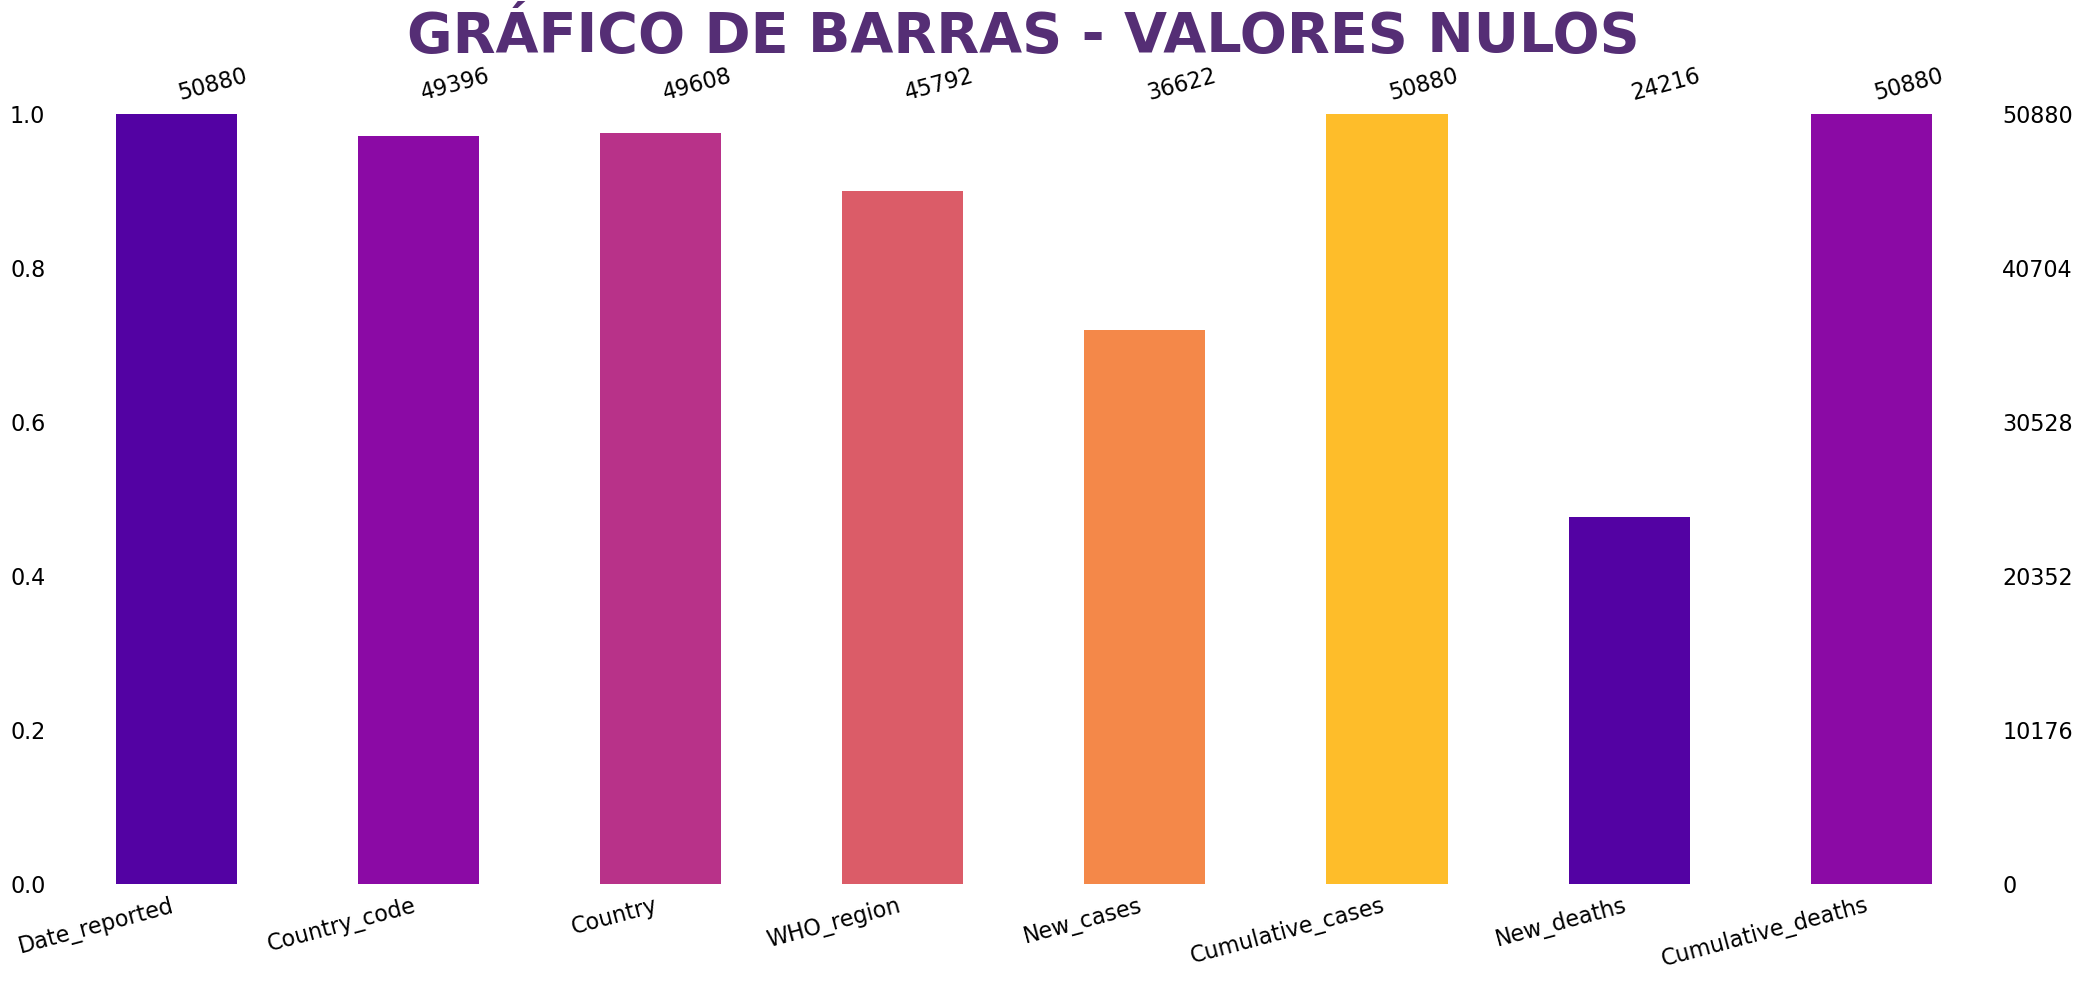

In [8]:
## Mostrando visualmente la cantidad de nulos para cada variable, con respecto al total de datos
msno.bar(df_covid, color=sns.color_palette("plasma"),label_rotation=15)
plt.title('GRÁFICO DE BARRAS - VALORES NULOS', fontdict={'fontsize': 40, 'fontweight': 'bold', 'color': '#552E75'})
# plt.tight_layout()
plt.show()

> * **Si bien es cierto, hay algunas variables que tienen fuerte cantidad de nulos, considerar que puede ser simplemente que se tenga que modificar por valores de cero.**
> * **Las variables 'country_code' y 'country', tienen presencia de nulos, pero en cantidades pequeñas.**

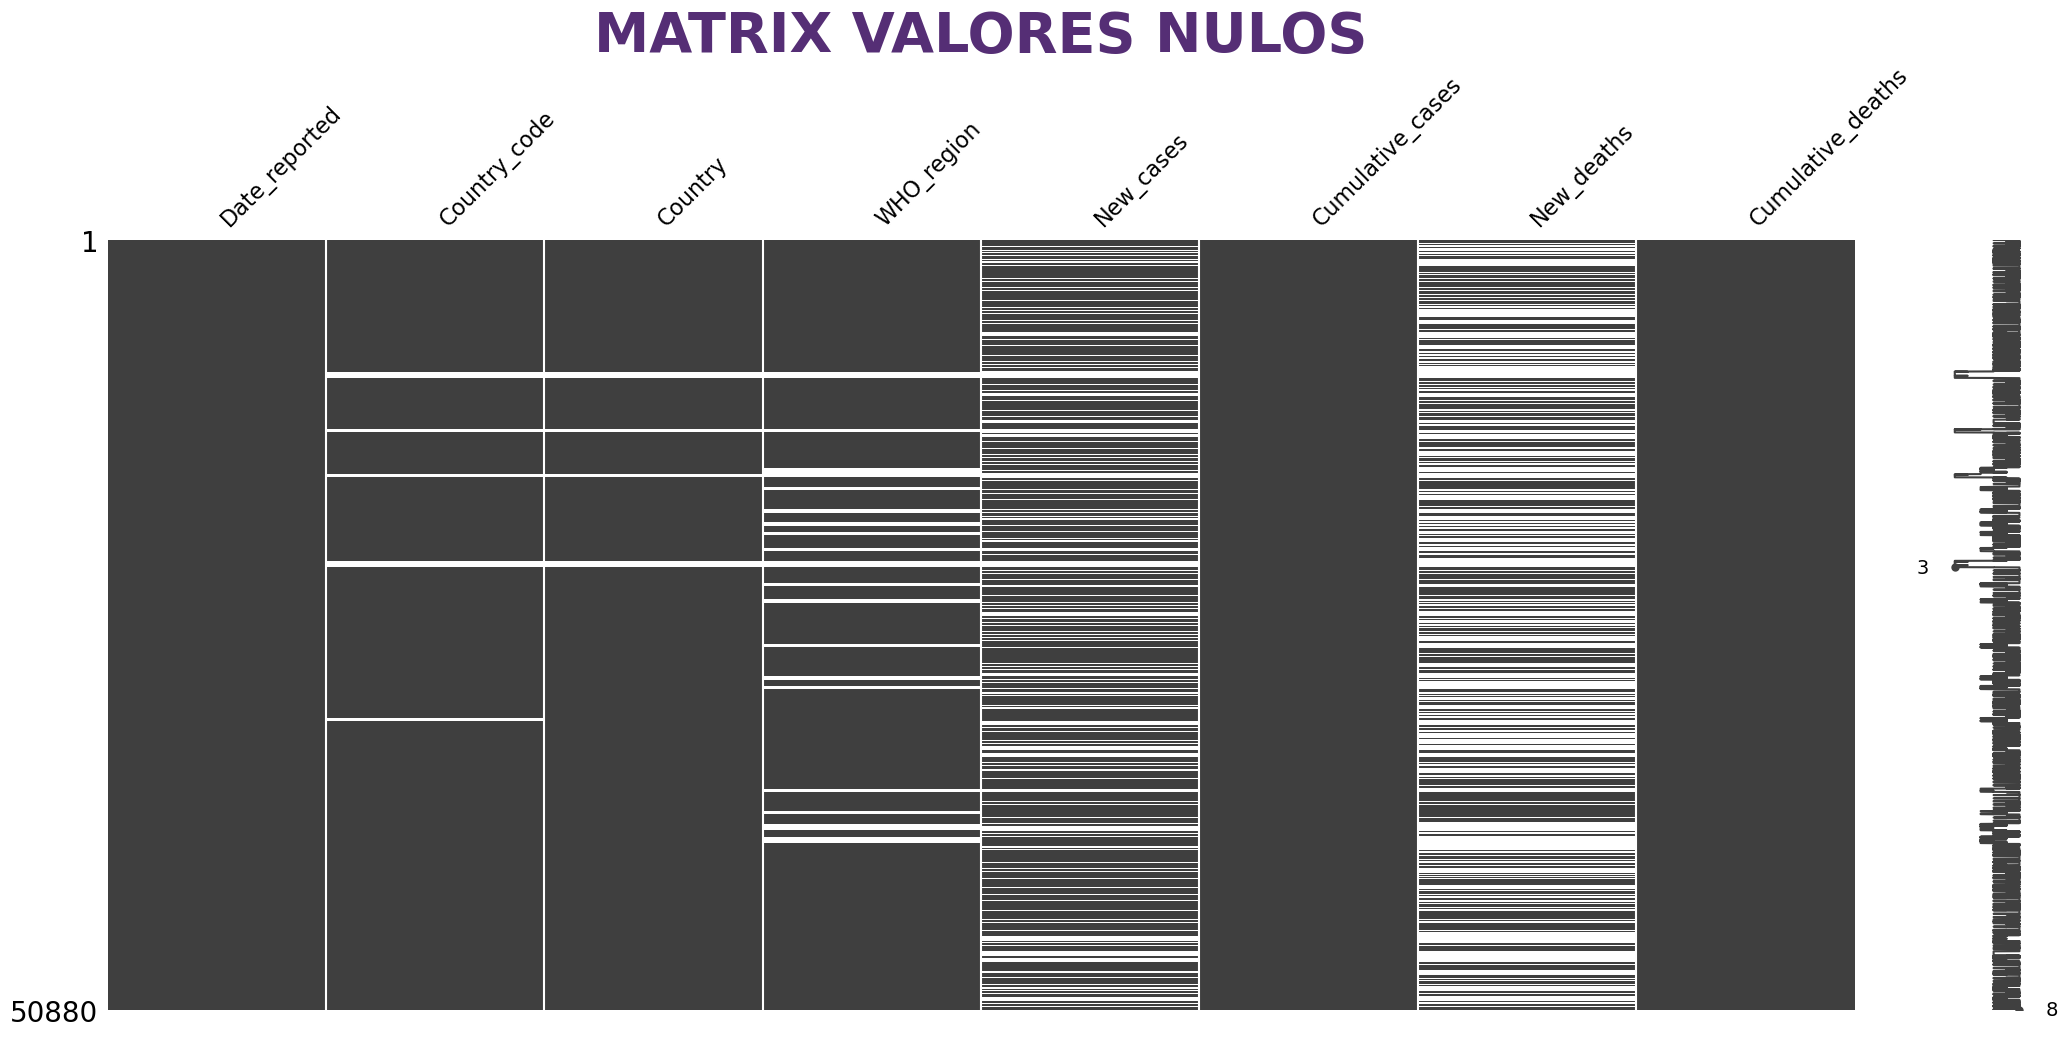

In [9]:
## Se realiza una gráfica de matriz de nulos
msno.matrix(df_covid)
plt.title('MATRIX VALORES NULOS',fontdict={'fontsize': 40, 'fontweight': 'bold', 'color': '#552E75'})
plt.show()

> * **Se observa bastante presencia de datos nulos en varias variables**
> * **Se visualiza bastante correlación entre los datos nulos para varias columnas**
> * **Las variables country_code y country, notamos que existen datos nulos en casi las mismas posiciones**
> * **Se evalua la posibilidad de poder eliminar esos valores nulos de esas columnas**

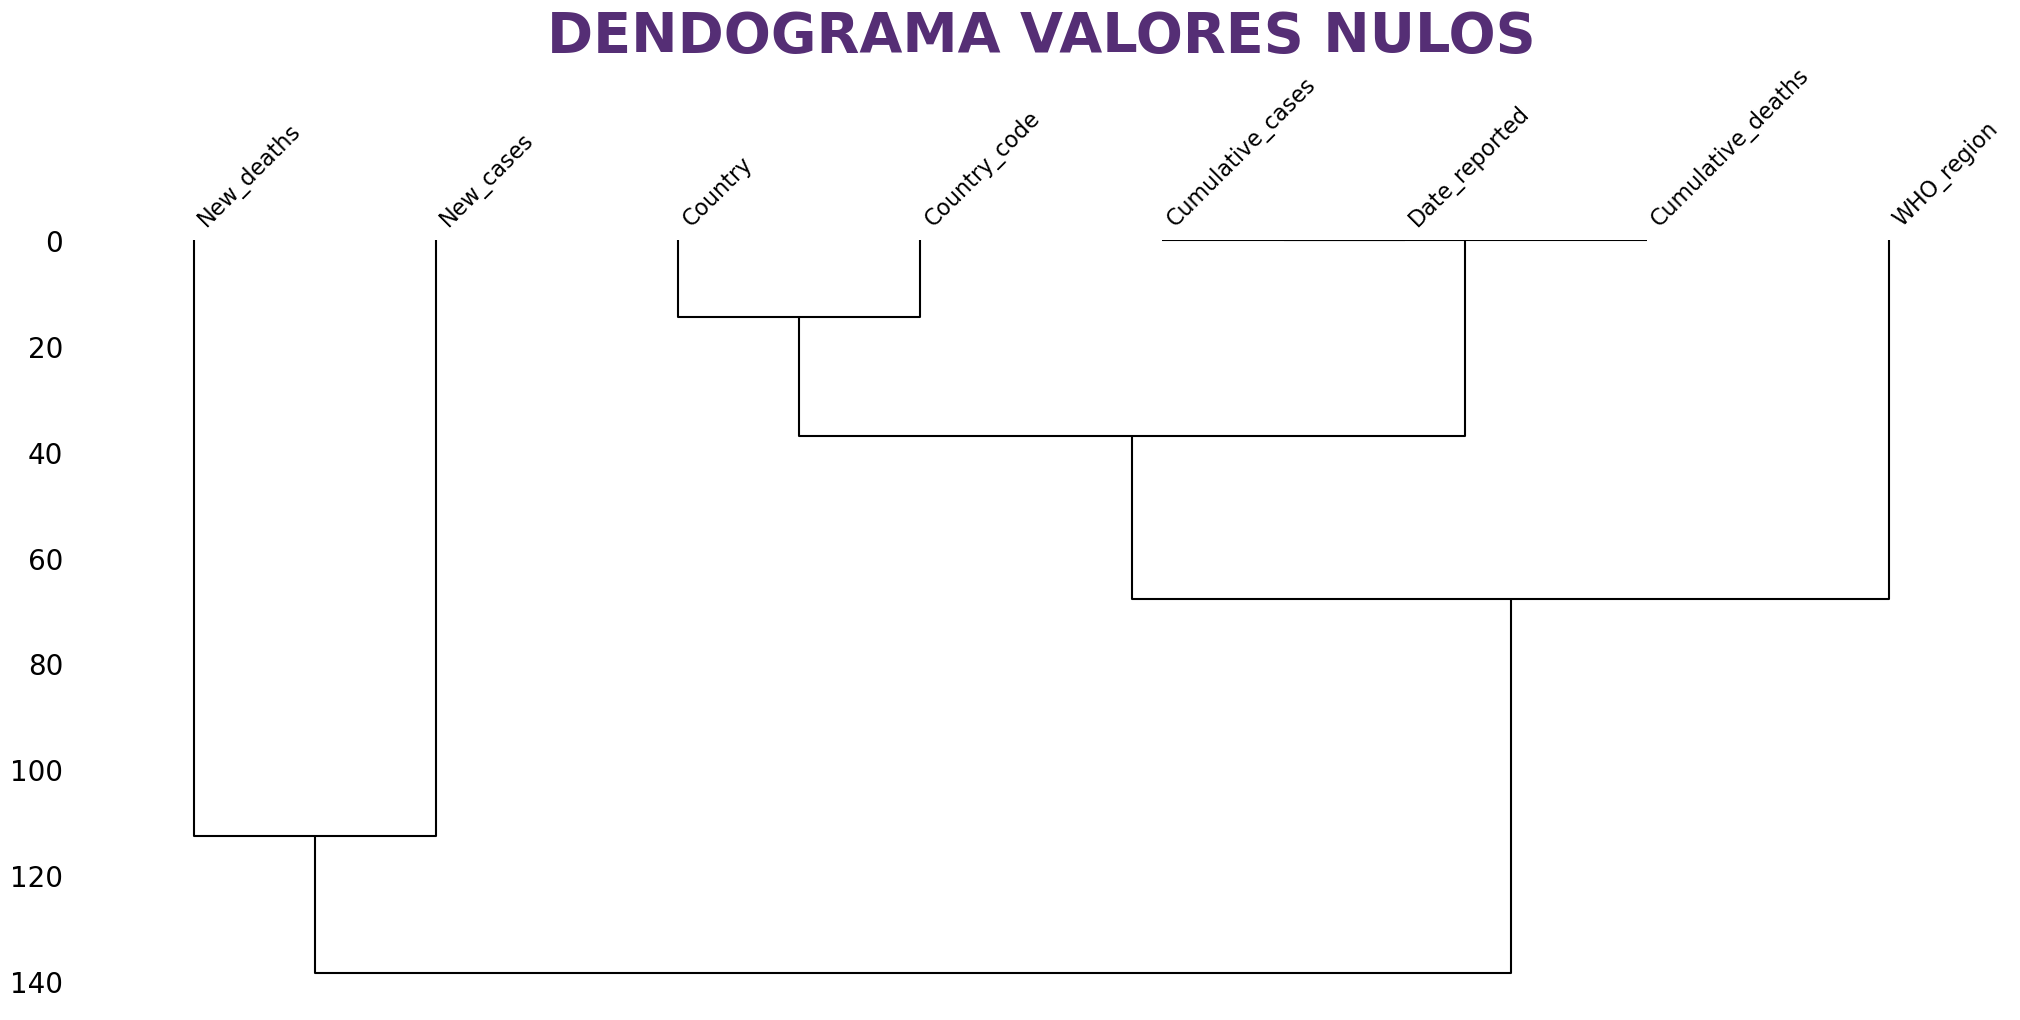

In [10]:
## Se realiza la gráfica de dendograma para valores nulos
msno.dendrogram(df_covid)
plt.title('DENDOGRAMA VALORES NULOS', fontdict={'fontsize': 40, 'fontweight': 'bold', 'color': '#552E75'})
plt.show()

> * **Notamos la fuerte correlación en el dendograma entre las variables 'country_code' y 'country**
> * **De todas maneras, tener en cuenta que estas variables, de tener valores nulos, no nos aportan valor**

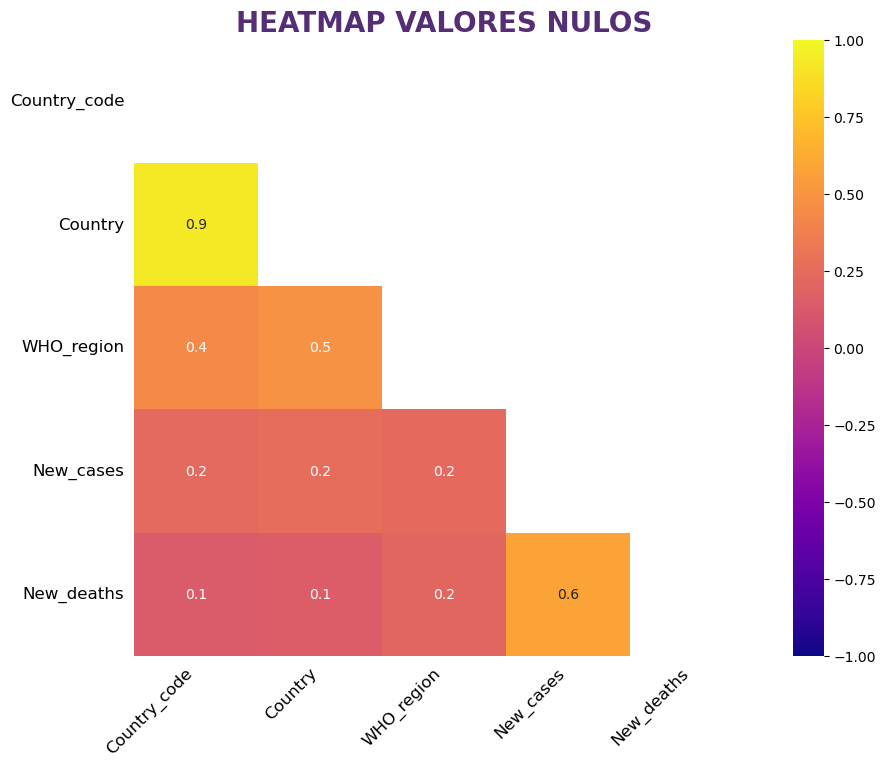

In [11]:
msno.heatmap(df_covid,cmap='plasma',
    vmin=-1,
    vmax=1,
    cbar=True,
    figsize=(10, 8),
    fontsize=12)
plt.title('HEATMAP VALORES NULOS',fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': '#552E75'})
plt.show()

> * **Este gráfico de Heatmap, nuevamente nos muestra la fuerte correlación que existe entre los valores nulos de la variable 'country_code' y 'country'**

**OBS: ELIMINADO LOS VALORES NULOS DE COUNTRY_CODE**

In [12]:
index_country_code_nulos = df_covid['Country_code'].isnull().index[df_covid['Country_code'].isnull()]
index_country_code_nulos

Int64Index([ 8692,  8693,  8694,  8695,  8696,  8697,  8698,  8699,  8700,
             8701,
            ...
            31790, 31791, 31792, 31793, 31794, 31795, 31796, 31797, 31798,
            31799],
           dtype='int64', length=1484)

In [13]:
df_covid_limpio = df_covid.drop(index_country_code_nulos)
df_covid_limpio

Date_reported Country_code      Country WHO_region  New_cases  \
0        2020-01-05           AF  Afghanistan       EMRO        NaN   
1        2020-01-12           AF  Afghanistan       EMRO        NaN   
2        2020-01-19           AF  Afghanistan       EMRO        NaN   
3        2020-01-26           AF  Afghanistan       EMRO        NaN   
4        2020-02-02           AF  Afghanistan       EMRO        NaN   
...             ...          ...          ...        ...        ...   
50875    2023-12-24           ZW     Zimbabwe       AFRO       23.0   
50876    2023-12-31           ZW     Zimbabwe       AFRO       23.0   
50877    2024-01-07           ZW     Zimbabwe       AFRO       46.0   
50878    2024-01-14           ZW     Zimbabwe       AFRO       85.0   
50879    2024-01-21           ZW     Zimbabwe       AFRO       55.0   

       Cumulative_cases  New_deaths  Cumulative_deaths  
0                     0         NaN                  0  
1                     0         NaN                  0  
2                     0         NaN                  0  
3                     0         NaN                  0  
4                     0         NaN                  0  
...                 ...         ...                ...  
50875            266048         1.0               5731  
50876            266071         NaN               5731  
50877            266117         3.0               5734  
50878            266202         3.0               5737  
50879            266257         NaN               5737  

[49396 rows x 8 columns]

In [14]:
df_covid_limpio.shape, df_covid.shape

((49396, 8), (50880, 8))

<AxesSubplot:>

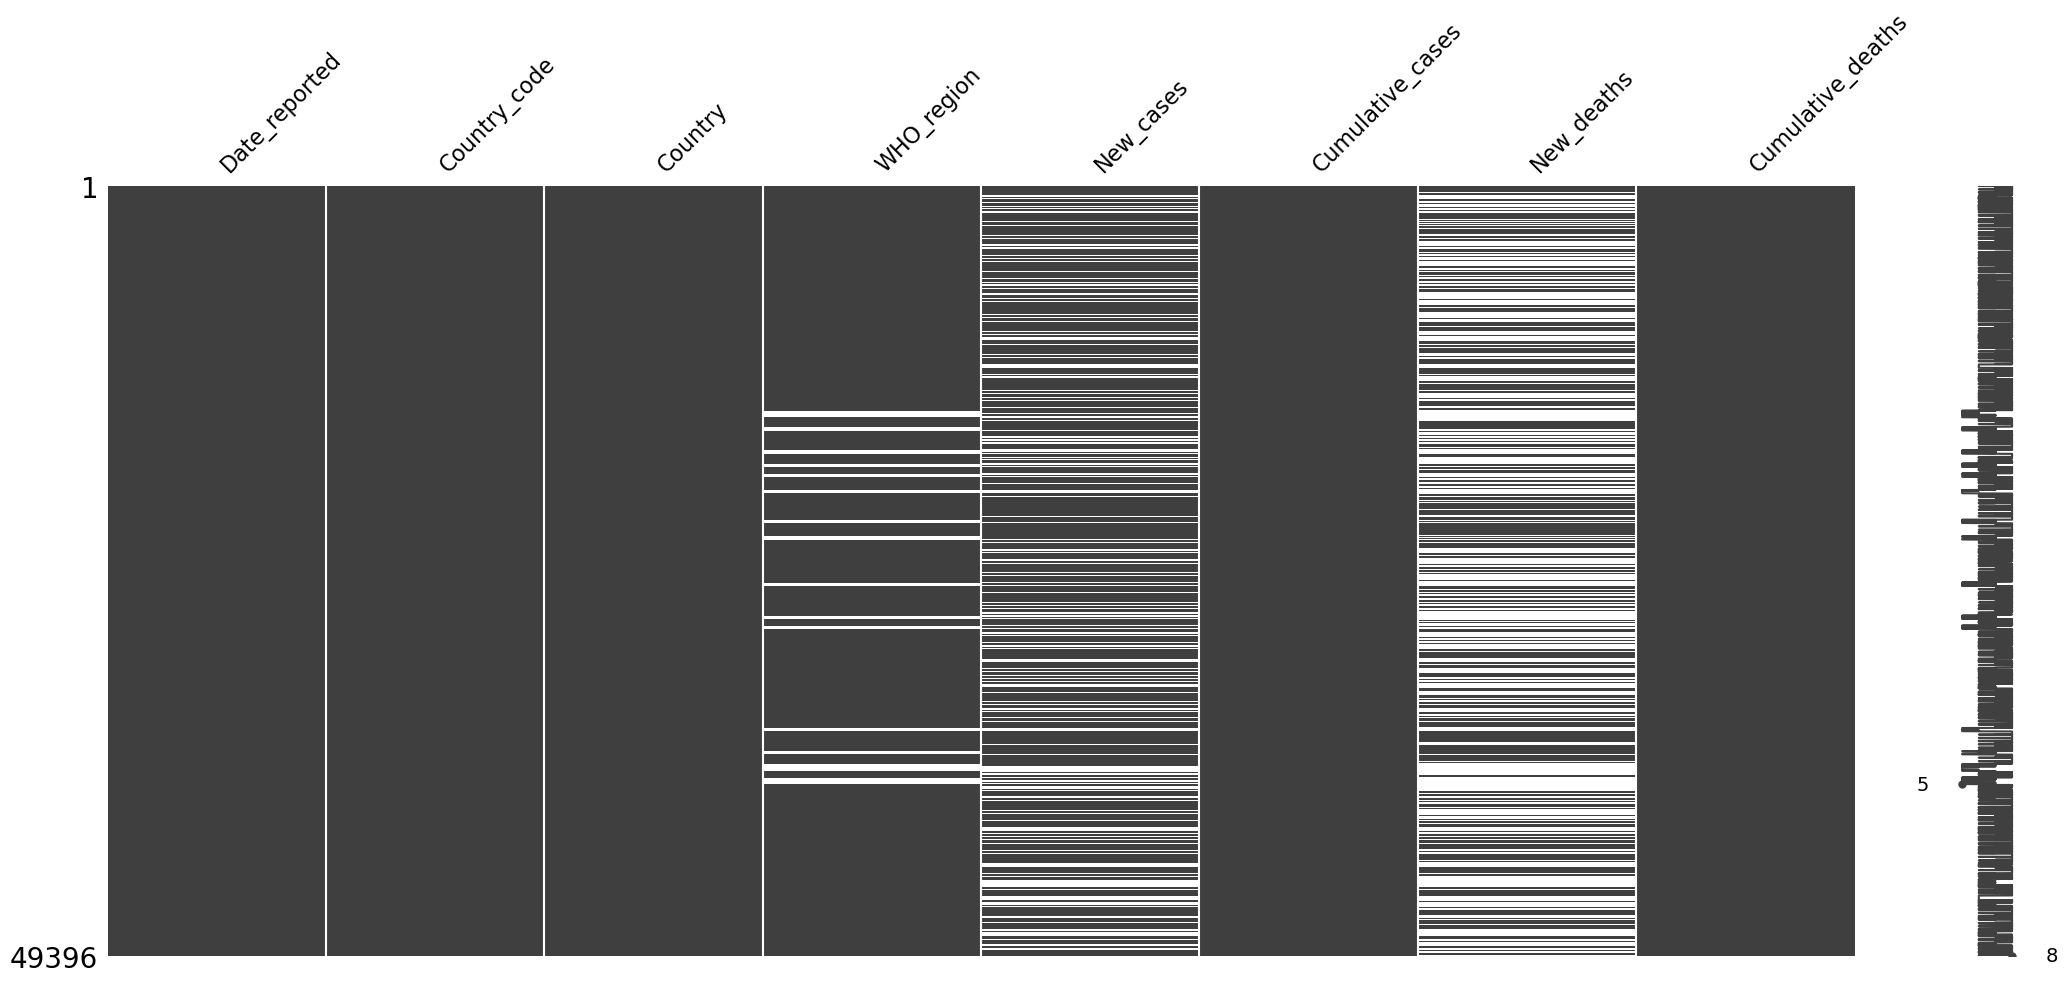

In [15]:
## Validando en nuestra matriz de nulos
msno.matrix(df_covid_limpio)

* Validamos que se eliminaron los valores nulos de forma correcta

### 2.1.2 Tratamiento de Duplicados 

In [16]:
## Verificando presencia de duplicados en el dataframe original
df_covid.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
50875    False
50876    False
50877    False
50878    False
50879    False
Length: 50880, dtype: bool

In [17]:
## Cantidad de datos duplicados en todo el dataframe original
df_covid.duplicated().sum()

211

In [18]:
## Consiguiendo los números de filas donde existen duplicados
index_duplicated = df_covid.duplicated().index[df_covid.duplicated()]
index_duplicated

Int64Index([ 8904,  8905,  8906,  8907,  8908,  8909,  8910,  8911,  8912,
             8913,
            ...
            21471, 21472, 21473, 21474, 21475, 21476, 21477, 21478, 21479,
            21480],
           dtype='int64', length=211)

In [19]:
## validando que realmente se trate de datos duplicados
df_covid.loc[index_duplicated]

Date_reported Country_code Country WHO_region  New_cases  \
8904     2020-01-05          NaN     NaN        NaN        NaN   
8905     2020-01-12          NaN     NaN        NaN        NaN   
8906     2020-01-19          NaN     NaN        NaN        NaN   
8907     2020-01-26          NaN     NaN        NaN        NaN   
8908     2020-02-02          NaN     NaN        NaN        NaN   
...             ...          ...     ...        ...        ...   
21476    2021-03-28          NaN     NaN        NaN        NaN   
21477    2021-04-04          NaN     NaN        NaN        NaN   
21478    2021-04-11          NaN     NaN        NaN        NaN   
21479    2021-04-18          NaN     NaN        NaN        NaN   
21480    2021-04-25          NaN     NaN        NaN        NaN   

       Cumulative_cases  New_deaths  Cumulative_deaths  
8904                  0         NaN                  0  
8905                  0         NaN                  0  
8906                  0         NaN                  0  
8907                  0         NaN                  0  
8908                  0         NaN                  0  
...                 ...         ...                ...  
21476                 0         NaN                  0  
21477                 0         NaN                  0  
21478                 0         NaN                  0  
21479                 0         NaN                  0  
21480                 0         NaN                  0  

[211 rows x 8 columns]

* Validamos que existen presencia de datos duplicados. La totalidad de datos duplicados es de 211 filas.
* Se verifica las filas donde se encuentra presencia de datos duplicados, se observa detalaldamente separando en un dataframe todas las filas discriminadas.
* Se observa que las filas analizadas, efectivamente tienen todos los datos con valores duplicados y con presencia de valores nulos. Lo diferente que se observa es que la fecha es diferente para cada fila.
* Se decide eliminar las filas que no nos estan aportando valor.

**OBS: ANALIZANDO EL DATAFRAME LIMPIO, TRABAJADO PREVIAMENTE CON DATOS NULOS, PARA VALIDAR SI HAY PRESENCIA DE DUPLICADOS**

In [20]:
df_covid_limpio.duplicated().sum()

0

> * Se observa que los duplicados existentes en el dataframe original, fueron eliminados cuando se realizo la eliminación de filas en el tratamiento de datos nulos
> * Se procede a automatizar el proceso para que se eliminen los datos duplicados para el dataframe limpio, ya que esta data se actualiza periodicamente.

In [21]:
## Automatizando el proceso por si en el tiempo se de la presencia de datos duplicados
index_duplicados = df_covid_limpio.duplicated().index[df_covid_limpio.duplicated()]
df_covid_limpio = df_covid_limpio.drop(index_duplicados)
df_covid_limpio

Date_reported Country_code      Country WHO_region  New_cases  \
0        2020-01-05           AF  Afghanistan       EMRO        NaN   
1        2020-01-12           AF  Afghanistan       EMRO        NaN   
2        2020-01-19           AF  Afghanistan       EMRO        NaN   
3        2020-01-26           AF  Afghanistan       EMRO        NaN   
4        2020-02-02           AF  Afghanistan       EMRO        NaN   
...             ...          ...          ...        ...        ...   
50875    2023-12-24           ZW     Zimbabwe       AFRO       23.0   
50876    2023-12-31           ZW     Zimbabwe       AFRO       23.0   
50877    2024-01-07           ZW     Zimbabwe       AFRO       46.0   
50878    2024-01-14           ZW     Zimbabwe       AFRO       85.0   
50879    2024-01-21           ZW     Zimbabwe       AFRO       55.0   

       Cumulative_cases  New_deaths  Cumulative_deaths  
0                     0         NaN                  0  
1                     0         NaN                  0  
2                     0         NaN                  0  
3                     0         NaN                  0  
4                     0         NaN                  0  
...                 ...         ...                ...  
50875            266048         1.0               5731  
50876            266071         NaN               5731  
50877            266117         3.0               5734  
50878            266202         3.0               5737  
50879            266257         NaN               5737  

[49396 rows x 8 columns]

In [22]:
## Se observa que la data se mantiene, ya que como habiamos explicado ya se habian eliminado esas filas duplicadas
df_covid_limpio.shape

(49396, 8)

### 2.1.3 Convirtiendo los Valores Nulos existentes en Valor numérico 'Cero' 

In [23]:
df_covid_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49396 entries, 0 to 50879
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      49396 non-null  object 
 1   Country_code       49396 non-null  object 
 2   Country            49396 non-null  object 
 3   WHO_region         45580 non-null  object 
 4   New_cases          36436 non-null  float64
 5   Cumulative_cases   49396 non-null  int64  
 6   New_deaths         24088 non-null  float64
 7   Cumulative_deaths  49396 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.4+ MB


* Notamos que las variables que son del tipo Object, ya no tienen datos nulos a excepción de la variable 'WHO_region'
* Al analizar esta variable 'WHO_region', observamos que es solo una etiqueta que representa la región al que pertenece cada país. En este caso, consideramos no relevante para nuestros análisis posteriores. Se decide prescindir de esta variable.
* Las otras variables restantes, notamos que son datos numéricos, enteros y flotantes.
* Al visualizar el dataframe notamos que estas variables numéricas, representan datos de casos y/o decesos, por consiguientes estos datos nulos en sí son valores CERO.
* Se decide realizar el cambio de valores nulos por el valor CERO. Se realiza el proceso .replace(np.nan,0)

In [24]:
## Eliminamos la columna 'WHO_region'
df_covid_limpio = df_covid_limpio.drop(columns= 'WHO_region')
df_covid_limpio.head()

Date_reported Country_code      Country  New_cases  Cumulative_cases  \
0    2020-01-05           AF  Afghanistan        NaN                 0   
1    2020-01-12           AF  Afghanistan        NaN                 0   
2    2020-01-19           AF  Afghanistan        NaN                 0   
3    2020-01-26           AF  Afghanistan        NaN                 0   
4    2020-02-02           AF  Afghanistan        NaN                 0   

   New_deaths  Cumulative_deaths  
0         NaN                  0  
1         NaN                  0  
2         NaN                  0  
3         NaN                  0  
4         NaN                  0

In [25]:
## Reemplazamos los valores nulos restantes por el valor CERO
df_covid_limpio = df_covid_limpio.replace(np.nan,0)
df_covid_limpio.head(10)

Date_reported Country_code      Country  New_cases  Cumulative_cases  \
0    2020-01-05           AF  Afghanistan        0.0                 0   
1    2020-01-12           AF  Afghanistan        0.0                 0   
2    2020-01-19           AF  Afghanistan        0.0                 0   
3    2020-01-26           AF  Afghanistan        0.0                 0   
4    2020-02-02           AF  Afghanistan        0.0                 0   
5    2020-02-09           AF  Afghanistan        0.0                 0   
6    2020-02-16           AF  Afghanistan        0.0                 0   
7    2020-02-23           AF  Afghanistan        0.0                 0   
8    2020-03-01           AF  Afghanistan        1.0                 1   
9    2020-03-08           AF  Afghanistan        0.0                 1   

   New_deaths  Cumulative_deaths  
0         0.0                  0  
1         0.0                  0  
2         0.0                  0  
3         0.0                  0  
4         0.0                  0  
5         0.0                  0  
6         0.0                  0  
7         0.0                  0  
8         0.0                  0  
9         0.0                  0

In [26]:
## Validamos si seguimos teniendo presencia de valores nulos
df_covid_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49396 entries, 0 to 50879
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      49396 non-null  object 
 1   Country_code       49396 non-null  object 
 2   Country            49396 non-null  object 
 3   New_cases          49396 non-null  float64
 4   Cumulative_cases   49396 non-null  int64  
 5   New_deaths         49396 non-null  float64
 6   Cumulative_deaths  49396 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 3.0+ MB


In [27]:
df_covid_limpio.isnull().sum()

Date_reported        0
Country_code         0
Country              0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64

> * **No tenemos presencia de datos nulos en nuestro dataframe Limpio**

### 2.1.4 Convirtiendo la columna 'Date_reported' a un formato datetime

In [28]:
## Se utiliza el método de pandas to_datetime
df_covid_limpio['Date_reported'] = pd.to_datetime(df_covid_limpio['Date_reported'])
df_covid_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49396 entries, 0 to 50879
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      49396 non-null  datetime64[ns]
 1   Country_code       49396 non-null  object        
 2   Country            49396 non-null  object        
 3   New_cases          49396 non-null  float64       
 4   Cumulative_cases   49396 non-null  int64         
 5   New_deaths         49396 non-null  float64       
 6   Cumulative_deaths  49396 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 3.0+ MB


### 2.1.5 Analizando columnas ''New_cases" y "New_deaths"

In [29]:
df_covid_limpio['New_cases'].value_counts(), df_covid_limpio['New_cases'].unique()

(0.0        12960
 1.0          851
 2.0          665
 3.0          518
 4.0          406
            ...  
 52118.0        1
 62265.0        1
 50473.0        1
 37418.0        1
 7704.0         1
 Name: New_cases, Length: 11869, dtype: int64,
 array([0.0000e+00, 1.0000e+00, 6.0000e+00, ..., 1.2073e+04, 1.0468e+04,
        7.7040e+03]))

In [30]:
df_covid_limpio['New_deaths'].value_counts(), df_covid_limpio['New_deaths'].unique()

(0.0       25308
 1.0        2867
 2.0        1717
 3.0        1113
 4.0         803
           ...  
 3257.0        1
 4106.0        1
 5339.0        1
 5198.0        1
 656.0         1
 Name: New_deaths, Length: 2127, dtype: int64,
 array([   0.,    2.,    3., ..., 1488.,  949.,  656.]))

* Observamos presencia de datos negativos para las dos columnas.
* Cada columna, solo tiene un dato negativo, en este momento no haremos nada con estos valores, luego se evaluará.
* Se procede a convertir los datos en valores enteros

In [31]:
## Transformando los datos a valores enteros
df_covid_limpio['New_cases'] = df_covid_limpio['New_cases'].astype('int64')
df_covid_limpio['New_deaths'] = df_covid_limpio['New_deaths'].astype('int64')

In [32]:
## Verificando nuevamente los tipos de datos en el dataframe
df_covid_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49396 entries, 0 to 50879
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      49396 non-null  datetime64[ns]
 1   Country_code       49396 non-null  object        
 2   Country            49396 non-null  object        
 3   New_cases          49396 non-null  int64         
 4   Cumulative_cases   49396 non-null  int64         
 5   New_deaths         49396 non-null  int64         
 6   Cumulative_deaths  49396 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 3.0+ MB


### 2.1.6 Creando nuevas variables

* Creamos una variable que se llamará **lethality_rate**, la cual se calculará dividiendo los decesos acumulados entre los casos acumulados.

In [33]:
## Creamos la nueva variable 'lethality_rate'
df_covid_limpio['lethality_rate'] = (df_covid_limpio['Cumulative_deaths']/df_covid_limpio['Cumulative_cases'])*100

In [34]:
## Verificamos la adición de la nueva variable al dataframe
df_covid_limpio

Date_reported Country_code      Country  New_cases  Cumulative_cases  \
0        2020-01-05           AF  Afghanistan          0                 0   
1        2020-01-12           AF  Afghanistan          0                 0   
2        2020-01-19           AF  Afghanistan          0                 0   
3        2020-01-26           AF  Afghanistan          0                 0   
4        2020-02-02           AF  Afghanistan          0                 0   
...             ...          ...          ...        ...               ...   
50875    2023-12-24           ZW     Zimbabwe         23            266048   
50876    2023-12-31           ZW     Zimbabwe         23            266071   
50877    2024-01-07           ZW     Zimbabwe         46            266117   
50878    2024-01-14           ZW     Zimbabwe         85            266202   
50879    2024-01-21           ZW     Zimbabwe         55            266257   

       New_deaths  Cumulative_deaths  lethality_rate  
0               0                  0             NaN  
1               0                  0             NaN  
2               0                  0             NaN  
3               0                  0             NaN  
4               0                  0             NaN  
...           ...                ...             ...  
50875           1               5731        2.154123  
50876           0               5731        2.153936  
50877           3               5734        2.154691  
50878           3               5737        2.155130  
50879           0               5737        2.154685  

[49396 rows x 8 columns]

In [35]:
## Validamos la presencia de nulos en lethality_rate
df_covid_limpio['lethality_rate'].unique()

array([       nan, 0.        , 2.1978022 , ..., 2.15469136, 2.15513031,
       2.15468514])

In [36]:
## Verificamos presencia de nulos en la variable
df_covid_limpio['lethality_rate'].isnull().sum()

4089

In [37]:
## Convirtiendo los valores nulos de 'lethality_rate' a CERO
df_covid_limpio['lethality_rate'] = df_covid_limpio['lethality_rate'].replace(np.nan,0)
df_covid_limpio

Date_reported Country_code      Country  New_cases  Cumulative_cases  \
0        2020-01-05           AF  Afghanistan          0                 0   
1        2020-01-12           AF  Afghanistan          0                 0   
2        2020-01-19           AF  Afghanistan          0                 0   
3        2020-01-26           AF  Afghanistan          0                 0   
4        2020-02-02           AF  Afghanistan          0                 0   
...             ...          ...          ...        ...               ...   
50875    2023-12-24           ZW     Zimbabwe         23            266048   
50876    2023-12-31           ZW     Zimbabwe         23            266071   
50877    2024-01-07           ZW     Zimbabwe         46            266117   
50878    2024-01-14           ZW     Zimbabwe         85            266202   
50879    2024-01-21           ZW     Zimbabwe         55            266257   

       New_deaths  Cumulative_deaths  lethality_rate  
0               0                  0        0.000000  
1               0                  0        0.000000  
2               0                  0        0.000000  
3               0                  0        0.000000  
4               0                  0        0.000000  
...           ...                ...             ...  
50875           1               5731        2.154123  
50876           0               5731        2.153936  
50877           3               5734        2.154691  
50878           3               5737        2.155130  
50879           0               5737        2.154685  

[49396 rows x 8 columns]

In [38]:
df_covid_limpio.isnull().sum()

Date_reported        0
Country_code         0
Country              0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
lethality_rate       0
dtype: int64

* Validamos que no hay presencia de nulos en nuestro nuevo dataframe
* Posteriormente se seguirá analizando este punto

## 2.1.7 Tratamiento de Valores Atípicos

In [39]:
## Analizamos los valores estadísticos principales de nuestro dataframe
df_covid_limpio.describe()

New_cases  Cumulative_cases    New_deaths  Cumulative_deaths  \
count  4.939600e+04      4.939600e+04  49396.000000       4.939600e+04   
mean   1.567324e+04      1.643477e+06    142.040530       1.928293e+04   
std    2.408294e+05      7.274286e+06    875.025827       7.909933e+04   
min   -6.507900e+04      0.000000e+00  -3432.000000       0.000000e+00   
25%    0.000000e+00      3.846750e+03      0.000000       2.900000e+01   
50%    1.020000e+02      4.283250e+04      0.000000       4.980000e+02   
75%    1.999250e+03      4.998840e+05     20.000000       6.630250e+03   
max    4.047548e+07      1.034368e+08  47687.000000       1.165780e+06   

       lethality_rate  
count    4.939600e+04  
mean              inf  
std               NaN  
min      0.000000e+00  
25%      3.340161e-01  
50%      1.055678e+00  
75%      2.047740e+00  
max               inf

* Observamos que si bien no hay valores nulos, hay ciertas columnas que nos indican datos confusos
* La columna lethality_rate, nos muestra que tiene mean = inf y std= NaN, lo cual no es correcto, se evaluará esta columna
* Al parecer la columna lethality_rate, posee valores infinitos, se tienen que tratar
* En las columnas New_cases y New_deaths, visualizamos que tienen valores minimos negativos, lo cual no es posible, se evaluará posteriormente
* **Observamos valores atípicos en varias variables, ya que el máximo valor esta muy separado del quantil 75%. Sin embargo, tener en cuenta que estos son casos que van sumandose diariamente, por ende no entrarían en el análisis de atípicos.** 
* **Por el contrario, la columna lethality_rate si podría tener atípicos, ya que es la división de dos acumulados. Esta variable si se analizará.**

**COLUMNA 'lethality_rate'**

In [40]:
## Verificando lo sucedido con la columna lethality_rate, cantidad de valores infinitos
(df_covid_limpio['lethality_rate']==np.inf).sum()

3

* Tenemos 3 valores infinitos en nuestra columna, esto tenemos que corregirlo

In [41]:
# Encuentra las filas donde la columna lethality_rate tiene valores infinitos
filas_con_inf = list(df_covid_limpio.index[df_covid_limpio['lethality_rate'] == np.inf])

# Muestra las filas que contienen 'inf' en la columna lethality_rate
print("Filas con 'inf' en la columna lethality_rate:", filas_con_inf)

Filas con 'inf' en la columna lethality_rate: [5736, 50677, 50678]


In [42]:
## Observando en mi dataframe, estas filas para ver que sucedió porque se generó infinito
df_covid_limpio.loc[[5735,5736,5737,50676,50677, 50678, 50679],:]

#['lethality_rate'] = ['Cumulative_deaths']/['Cumulative_cases']*100

Date_reported Country_code   Country  New_cases  Cumulative_cases  \
5735     2020-03-22           BW  Botswana          0                 0   
5736     2020-03-29           BW  Botswana          0                 0   
5737     2020-04-05           BW  Botswana          4                 4   
50676    2020-03-01           ZW  Zimbabwe          0                 0   
50677    2020-03-08           ZW  Zimbabwe          0                 0   
50678    2020-03-15           ZW  Zimbabwe          0                 0   
50679    2020-03-22           ZW  Zimbabwe          2                 2   

       New_deaths  Cumulative_deaths  lethality_rate  
5735            0                  0             0.0  
5736            1                  1             inf  
5737            0                  1            25.0  
50676           0                  0             0.0  
50677           5                  5             inf  
50678           0                  5             inf  
50679           0                  5           250.0

* Luego de analizar los valores **inf**, podemos concluir que esto se debe a que se registraron deaths sin tener casos acumulados, esto podría acarrearnos ciertos problemas en nuestros posteriores cálculos.


* La solución que conseguimos, luego de un análisis minucioso, fue **eliminar estas filas**, esto debido a que **si bien empezaron las deaths mucho antes de que se registraran los casos en el país**, no hubieron nuevas muertes luego, y por ende cuando aparece el primer caso acumulado, se puede hacer el calculo de **lethality_rate**, en esta situación consideramos que eliminar estos valores no nos ocasionarian ningún problema.


* De todas maneras tenemos que analizar, ya que esto podría generarnos atípicos en la columna **lethality_rate**, debido a que empezaron con más muertes que casos acumulados

In [43]:
## Creando un backup
df_covid_limpio_2 = df_covid_limpio.copy()

In [44]:
## Eliminado las filas que contienen valores infinitos
df_covid_limpio_2 = df_covid_limpio_2.drop([5736, 50677, 50678],axis=0)

In [45]:
## Verificando en el dataframe, ya no hay presencia de valores infinitos
(df_covid_limpio_2['lethality_rate']==np.inf).sum()

0

* Se eliminaron los valores infinitos

**COLUMNA 'New_deaths' y 'New_cases'**

In [46]:
## Verificando lo sucedido con la columna New_deaths, cantidad de valores negativos
(df_covid_limpio['New_deaths']<0).sum()

10

* Tenemos 10 valores negativos en nuestro dataframe, esto tenemos que evaluarlo, que sucedió

In [47]:
# Encontrando las filas donde la columna New_deaths tiene valores negativos
filas_con_negativos = list(df_covid_limpio.index[df_covid_limpio['New_deaths'] <0])

# Muestra las filas que contienen 'inf' en la columna lethality_rate
print("Filas con valores negativos en la columna New_deaths:", filas_con_negativos)

Filas con valores negativos en la columna New_deaths: [2516, 5393, 7972, 9285, 18699, 35366, 35592, 37770, 41679, 45202]


In [48]:
## Observando en mi dataframe, estas filas para ver que sucedió porque se generaron valores negativos
df_covid_limpio_2.loc[[2516, 5393, 7972, 9285, 18699, 35366, 35592, 37770, 41679, 45202],:]

Date_reported Country_code                            Country  \
2516     2023-07-16           AU                          Australia   
5393     2021-10-17           BQ  Bonaire, Saint Eustatius and Saba   
7972     2022-06-19           CA                             Canada   
9285     2023-04-02           CL                              Chile   
18699    2020-11-01           GP                         Guadeloupe   
35366    2023-05-07           PA                             Panama   
35592    2023-08-13           PG                   Papua New Guinea   
37770    2020-08-30           RE                            Réunion   
41679    2022-06-12           SL                       Sierra Leone   
45202    2020-11-22           TH                           Thailand   

       New_cases  Cumulative_cases  New_deaths  Cumulative_deaths  \
2516        7826          11549500         -76              22694   
5393         102              2306          -1                 19   
7972       23312           3915721        -331              41017   
9285       14253           5264330       -3432              61050   
18699        268              7742          -1                126   
35366        591           1037324          -1               8620   
35592          0             46864         -30                640   
37770        440              1557          -3                  3   
41679          0              7682          -1                125   
45202         39              3913         -60                  0   

       lethality_rate  
2516         0.196493  
5393         0.823938  
7972         1.047495  
9285         1.159692  
18699        1.627486  
35366        0.830984  
35592        1.365654  
37770        0.192678  
41679        1.627180  
45202        0.000000

In [49]:
## Agrupamos algunas columnas del dataframe
df_analizar = df_covid_limpio_2.groupby('Country').sum()[['New_deaths','New_cases']].reset_index()
df_analizar

Country  New_deaths  New_cases
0                                          Afghanistan        7975     231063
1                                              Albania        3605     334818
2                                              Algeria        6881     272010
3                                       American Samoa          34       8359
4                                              Andorra         159      48015
..                                                 ...         ...        ...
228                                  Wallis and Futuna           8       3550
229                                              Yemen        2159      11945
230                                             Zambia        4069     349304
231                                           Zimbabwe        5732     266257
232  occupied Palestinian territory, including east...        5708     703228

[233 rows x 3 columns]

In [50]:
# Lista de países que se desea mantener en el dataframe
paises_a_filtrar = ['Australia', 'Bonaire, Saint Eustatius and Saba', 'Canada','Chile', 'Guadeloupe',
                    'Panama', 'Papua New Guinea','Réunion', 'Sierra Leone', 'Thailand']

# Filtrar el DataFrame utilizando loc - isin
df_analizar.loc[df_analizar['Country'].isin(paises_a_filtrar), :]

Country  New_deaths  New_cases
11                           Australia       24351   11752647
25   Bonaire, Saint Eustatius and Saba          41      11922
37                              Canada       54004    4771226
41                               Chile       62220    5334773
84                          Guadeloupe        1021     203235
158                             Panama        8670    1042688
159                   Papua New Guinea         670      46864
173                            Réunion         921     494595
188                       Sierra Leone         125       7779
205                           Thailand       34539    4764382

In [51]:
## Observando Australia debido a presencia de valores negativos
df_covid_limpio_2.loc[[2515,2516,2517],:]

Date_reported Country_code    Country  New_cases  Cumulative_cases  \
2515    2023-07-09           AU  Australia      10511          11541674   
2516    2023-07-16           AU  Australia       7826          11549500   
2517    2023-07-23           AU  Australia       6495          11555995   

      New_deaths  Cumulative_deaths  lethality_rate  
2515           0              22770        0.197285  
2516         -76              22694        0.196493  
2517          85              22779        0.197118

In [52]:
## Observando Australia
df_covid_limpio_2.loc[[2515,2516,2517],:]

Date_reported Country_code    Country  New_cases  Cumulative_cases  \
2515    2023-07-09           AU  Australia      10511          11541674   
2516    2023-07-16           AU  Australia       7826          11549500   
2517    2023-07-23           AU  Australia       6495          11555995   

      New_deaths  Cumulative_deaths  lethality_rate  
2515           0              22770        0.197285  
2516         -76              22694        0.196493  
2517          85              22779        0.197118

In [53]:
## Separamos el dataframe solo para Australia
df_covid_limpio_2[df_covid_limpio_2['Country'] == 'Australia']

Date_reported Country_code    Country  New_cases  Cumulative_cases  \
2332    2020-01-05           AU  Australia          0                 0   
2333    2020-01-12           AU  Australia          0                 0   
2334    2020-01-19           AU  Australia          0                 0   
2335    2020-01-26           AU  Australia          4                 4   
2336    2020-02-02           AU  Australia          8                12   
...            ...          ...        ...        ...               ...   
2539    2023-12-24           AU  Australia      11099          11710734   
2540    2023-12-31           AU  Australia      10671          11721405   
2541    2024-01-07           AU  Australia       9626          11731031   
2542    2024-01-14           AU  Australia      11114          11742145   
2543    2024-01-21           AU  Australia      10502          11752647   

      New_deaths  Cumulative_deaths  lethality_rate  
2332           0                  0        0.000000  
2333           0                  0        0.000000  
2334           0                  0        0.000000  
2335           0                  0        0.000000  
2336           0                  0        0.000000  
...          ...                ...             ...  
2539          36              24176        0.206443  
2540          35              24211        0.206554  
2541          33              24244        0.206666  
2542          86              24330        0.207202  
2543          21              24351        0.207196  

[212 rows x 8 columns]

* **ANALIZANDO EL VALOR NEGATIVO EN AUSTRALIA**

**Figura 1** 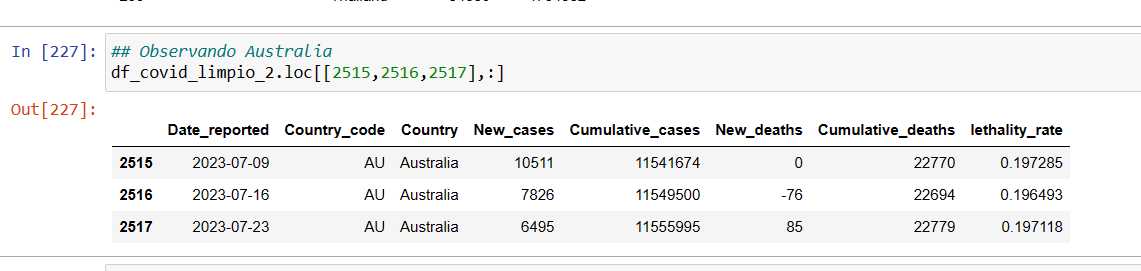  **Figura 2** 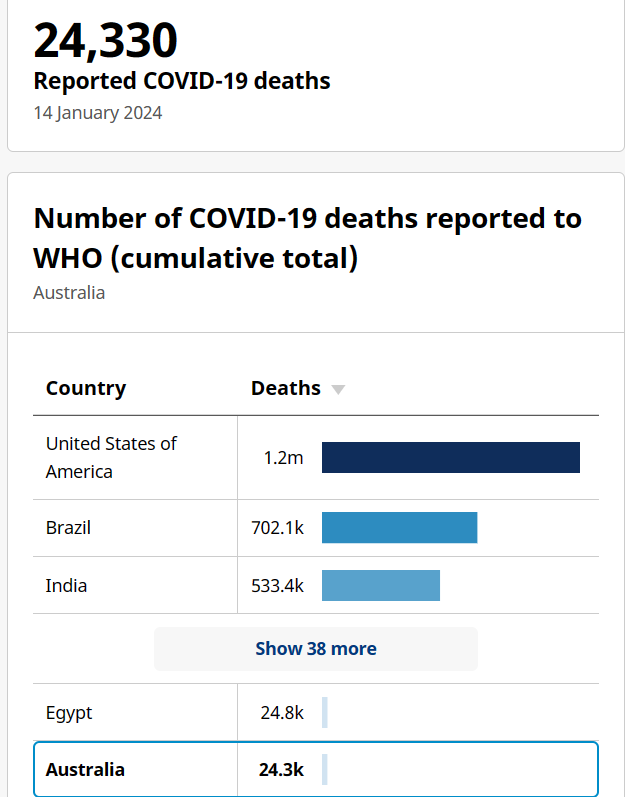   **Figura 3** 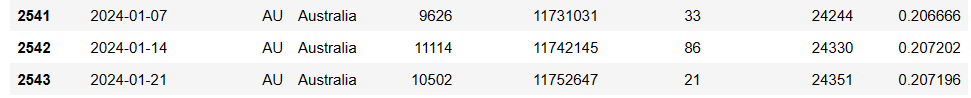

* Notamos que tanto Australia como los otros países tienen valores negativos en 'New_deaths' y 'New_cases'.
* Verificamos los acumulados tanto en la página oficial **(Figura 2)** como en el Dataframe **(Figura 3)** y notamos que si corresponden, por ende si tomaron el dato negativo para sus cálculos. Considerar que en la página oficial tenemos un corte al 14 de enero de 2024.
* Validamos en la **Figura 1**, que el dato negativo si ayuda a que el acumulado tenga esos valores.
* Por esta razón, luego de hacer un análisis extenso de el porque existen estos valores nulos **(e.g. Figura 4)**, decidimos mantener esos datos negativos, ya que consideramos que existen por el motivo de ajuste de información de los países, posibles errores de cálculos, información imprecisa, etc.

**Figura 4**   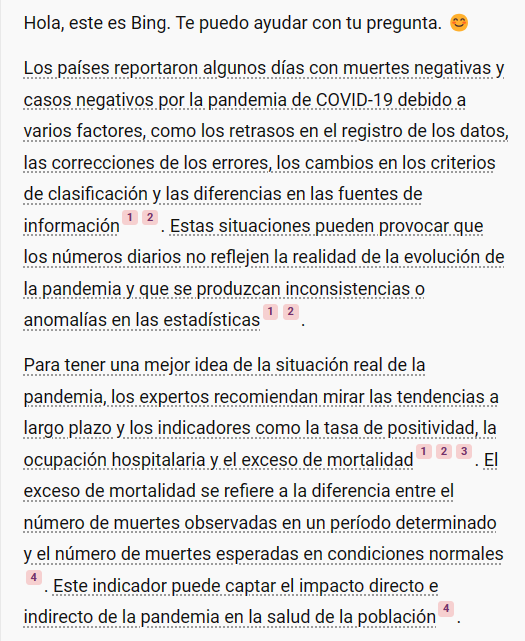

* **Se decidió continuar con estos valores negativos en todos los países que lo posean, de todas maneras se tendrá sumo cuidado en los análisis posteriores**

**ANÁLISIS DESCRIPTIVO ESTADÍSTICO INICIAL PARA OBSERVAR ATÍPICOS**

* Como ya habíamos indicado inicialmente, se realizará el análisis solo sobre la variable **'lethality_rate'**

In [54]:
## Se realiza un análisis estadistico descriptivo de la variable 'lethality_rate'
df_covid_limpio_2['lethality_rate'].describe().reset_index()

index  lethality_rate
0  count    49393.000000
1   mean       11.773469
2    std      887.488947
3    min        0.000000
4    25%        0.334001
5    50%        1.055630
6    75%        2.047132
7    max   103875.000000

* Se observa presencia de valores atípicos, el quantil 75% esta muy alejado del valor máximo. Se realizará un gráfico de boxplot para validarlo.

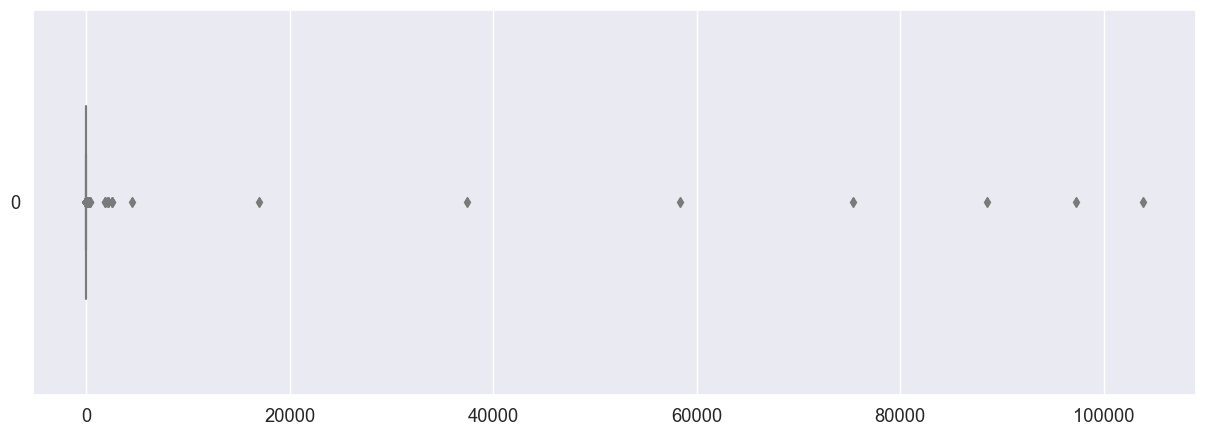

In [55]:
# Dibujamos gráfica de boxplot de Lethality_rate antes del Truncamiento
plt.rcParams['figure.figsize'] = [15,5];
sns.set(style="whitegrid")
sns.set(font_scale=1.2)
sns.boxplot(data=df_covid_limpio_2['lethality_rate'], orient="h", palette="pastel", width=0.5)
plt.show()

* Se observa que si hay presencia de varios atípicos. Se realizará tratamiento por precentiles

**TRUNCAMIENTO POR PERCENTILES**

In [56]:
df_covid_limpio_2[['lethality_rate']].describe(percentiles=[0.01,0.025,0.05,0.1,0.5,0.75])

lethality_rate
count    49393.000000
mean        11.773469
std        887.488947
min          0.000000
1%           0.000000
2.5%         0.000000
5%           0.000000
10%          0.000000
50%          1.055630
75%          2.047132
max     103875.000000

In [57]:
df_covid_limpio_2[['lethality_rate']].describe(percentiles=[0.5,0.75,0.9,0.95,0.975,0.99])

lethality_rate
count    49393.000000
mean        11.773469
std        887.488947
min          0.000000
50%          1.055630
75%          2.047132
90%          3.419174
95%          5.000000
97.5%        7.369884
99%         12.156250
max     103875.000000

* Efectivamente se observa que el percentil 99% esta muy alejado del valor máximo. Se realizará el truncamiento hasta el 99%

In [58]:
# Calculamos el percentil p99
mini = np.min(df_covid_limpio_2['lethality_rate'])
p99 = np.percentile(df_covid_limpio_2['lethality_rate'],99)
mini, p99

(0.0, 12.1562501421231)

In [59]:
## Imputando los valores con la función clip, acotamos entre los percentiles seleccionados
df_covid_limpio_2['lethality_rate'] = np.clip(df_covid_limpio_2['lethality_rate'],mini,p99)

In [60]:
## Validamos que el truncamiento haya sido exitoso
df_covid_limpio_2['lethality_rate'].describe().reset_index()

index  lethality_rate
0  count    49393.000000
1   mean        1.559370
2    std        1.935145
3    min        0.000000
4    25%        0.334001
5    50%        1.055630
6    75%        2.047132
7    max       12.156250

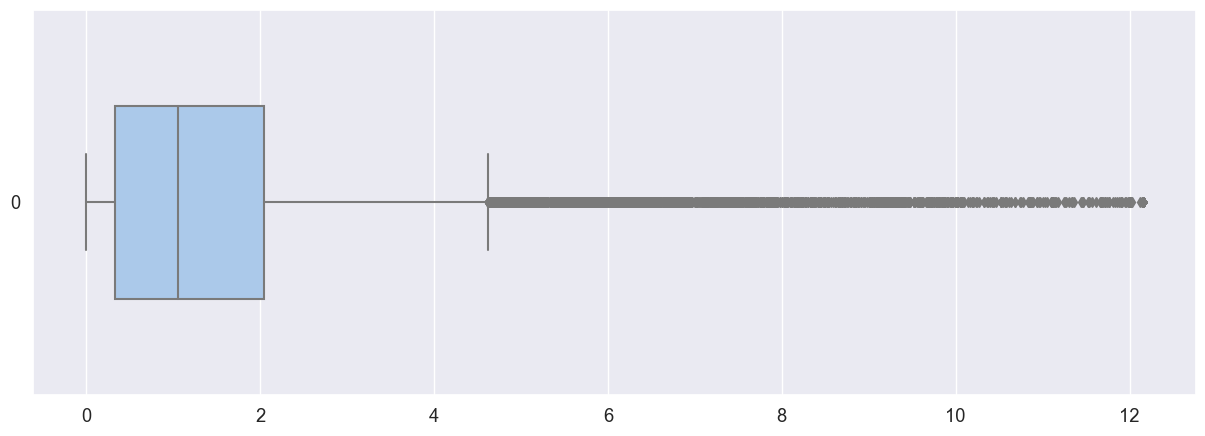

In [61]:
# Dibujamos gráfica de boxplot para lethality_rate, después del Truncamiento
plt.rcParams['figure.figsize'] = [15,5];
sns.set(style="whitegrid")
sns.set(font_scale=1.2)
sns.boxplot(data=df_covid_limpio_2['lethality_rate'], orient="h", palette="pastel", width=0.5)
plt.show()

* El truncamiento por percentiles fue exitoso. Sin embargo aún hay presencia de atípicos, pero decidimos no ajustar más los datos debido a que estos datos son muy importantes de analizar como para estar eliminandolos discriminadamente.

### 2.1.8 Dataframe Transformado

In [62]:
## Reasignando la variable y corrigiendo el índice
df_covid_limpio_final = df_covid_limpio_2.reset_index(drop=True)
df_covid_limpio_final

Date_reported Country_code      Country  New_cases  Cumulative_cases  \
0        2020-01-05           AF  Afghanistan          0                 0   
1        2020-01-12           AF  Afghanistan          0                 0   
2        2020-01-19           AF  Afghanistan          0                 0   
3        2020-01-26           AF  Afghanistan          0                 0   
4        2020-02-02           AF  Afghanistan          0                 0   
...             ...          ...          ...        ...               ...   
49388    2023-12-24           ZW     Zimbabwe         23            266048   
49389    2023-12-31           ZW     Zimbabwe         23            266071   
49390    2024-01-07           ZW     Zimbabwe         46            266117   
49391    2024-01-14           ZW     Zimbabwe         85            266202   
49392    2024-01-21           ZW     Zimbabwe         55            266257   

       New_deaths  Cumulative_deaths  lethality_rate  
0               0                  0        0.000000  
1               0                  0        0.000000  
2               0                  0        0.000000  
3               0                  0        0.000000  
4               0                  0        0.000000  
...           ...                ...             ...  
49388           1               5731        2.154123  
49389           0               5731        2.153936  
49390           3               5734        2.154691  
49391           3               5737        2.155130  
49392           0               5737        2.154685  

[49393 rows x 8 columns]

* Conseguimos el dataframe **df_covid_limpio_final**, el cual ya esta trabajado, libre de valores nulos y atípicos. Se continuará trabajando de ahora en adelante con este dataframe.

### 2.2 EDA Base Population United Nations

In [63]:
## Vista general del dataframe
df_population

Index    Variant Region, subregion, country or area * Notes  \
69        70  Estimates                                WORLD   NaN   
142      143  Estimates                   Sub-Saharan Africa     b   
214      215  Estimates     Northern Africa and Western Asia   NaN   
286      287  Estimates            Central and Southern Asia   NaN   
358      359  Estimates       Eastern and South-Eastern Asia   NaN   
...      ...        ...                                  ...   ...   
20305  20306  Estimates                                Samoa   NaN   
20377  20378  Estimates                              Tokelau    35   
20449  20450  Estimates                                Tonga   NaN   
20521  20522  Estimates                               Tuvalu   NaN   
20593  20594  Estimates            Wallis and Futuna Islands     2   

       Location code ISO3 Alpha-code ISO2 Alpha-code  SDMX code**  \
69               900             NaN             NaN          1.0   
142             1834             NaN             NaN        202.0   
214             1833             NaN             NaN        747.0   
286             1831             NaN             NaN         62.0   
358             1832             NaN             NaN        753.0   
...              ...             ...             ...          ...   
20305            882             WSM              WS        882.0   
20377            772             TKL              TK        772.0   
20449            776             TON              TO        776.0   
20521            798             TUV              TV        798.0   
20593            876             WLF              WF        876.0   

               Type  Parent code  ...  \
69            World            0  ...   
142      SDG region         1828  ...   
214      SDG region         1828  ...   
286      SDG region         1828  ...   
358      SDG region         1828  ...   
...             ...          ...  ...   
20305  Country/Area          957  ...   
20377  Country/Area          957  ...   
20449  Country/Area          957  ...   
20521  Country/Area          957  ...   
20593  Country/Area          957  ...   

       Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)  \
69                                               209.694                               
142                                              388.622                               
214                                              174.739                               
286                                              227.047                               
358                                              145.643                               
...                                                  ...                               
20305                                            199.759                               
20377                                            141.052                               
20449                                            245.689                               
20521                                            404.852                               
20593                                             77.781                               

      Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)  \
69                                                146.21                                  
142                                              324.278                                  
214                                              113.261                                  
286                                              168.558                                  
358                                               86.283                                  
...                                                  ...                                  
20305                                            133.625                                  
20377                                            142.411   

In [64]:
## Dimensiones de nuestro dataframe
df_population.shape

(286, 65)

* Validamos que tenemos 65 columnas y 286 filas
* Evaluaremos que columnas serán más importantes para nuestros análisis

In [65]:
## Realizamos una visión general de nuestros tipos de datos
df_population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 69 to 20593
Data columns (total 65 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Index                                                                                           286 non-null    int64  
 1   Variant                                                                                         286 non-null    object 
 2   Region, subregion, country or area *                                                            286 non-null    object 
 3   Notes                                                                                           76 non-null     object 
 4   Location code                                                                                   286 non-null    int64  
 5   ISO3 Alpha-c

In [66]:
## Verificamos presencia de valores nulos en nuestros datos
df_population.isnull().sum().sort_values(ascending=False)

Notes                                               210
ISO2 Alpha-code                                      50
ISO3 Alpha-code                                      49
SDMX code**                                           4
Index                                                 0
                                                   ... 
Sex Ratio at Birth (males per 100 female births)      0
Total Deaths (thousands)                              0
Male Deaths (thousands)                               0
Variant                                               0
Net Migration Rate (per 1,000 population)             0
Length: 65, dtype: int64

* Observamos que tenemos 4 variables con presencia de valores nulos

In [67]:
## Verificamos detalladamente los nombres de las columnas existentes en el dataframe
df_population.columns

Index(['Index', 'Variant', 'Region, subregion, country or area *', 'Notes',
       'Location code', 'ISO3 Alpha-code', 'ISO2 Alpha-code', 'SDMX code**',
       'Type', 'Parent code', 'Year',
       'Total Population, as of 1 January (thousands)',
       'Total Population, as of 1 July (thousands)',
       'Male Population, as of 1 July (thousands)',
       'Female Population, as of 1 July (thousands)',
       'Population Density, as of 1 July (persons per square km)',
       'Population Sex Ratio, as of 1 July (males per 100 females)',
       'Median Age, as of 1 July (years)',
       'Natural Change, Births minus Deaths (thousands)',
       'Rate of Natural Change (per 1,000 population)',
       'Population Change (thousands)', 'Population Growth Rate (percentage)',
       'Population Annual Doubling Time (years)', 'Births (thousands)',
       'Births by women aged 15 to 19 (thousands)',
       'Crude Birth Rate (births per 1,000 population)',
       'Total Fertility Rate (live births

* En este punto, notamos que tenemos muchas variables en nuestro dataframe, realizamos un análisis rápido y validamos que columnas nos servirán para nuestros análisis posteriores.

* Decidimos mantener en el dataframe sólo las siguientes columnas: ***['ISO2 Alpha-code','Total Population, as of 1 July (thousands)','Male Population, as of 1 July (thousands)','Female Population, as of 1 July (thousands)','Population Density, as of 1 July (persons per square km)','Life Expectancy at Birth, both sexes (years)']***

In [68]:
## Generamos un nuevo dataframe que contenga solo las variables elegidas
df_population_mod = df_population[['ISO2 Alpha-code','Total Population, as of 1 July (thousands)',
                                  'Male Population, as of 1 July (thousands)','Female Population, as of 1 July (thousands)',
                                  'Population Density, as of 1 July (persons per square km)',
                                  'Life Expectancy at Birth, both sexes (years)']]
df_population_mod

ISO2 Alpha-code Total Population, as of 1 July (thousands)  \
69                NaN                                7764951.032   
142               NaN                                1080677.346   
214               NaN                                  530149.56   
286               NaN                                2021559.651   
358               NaN                                2324282.002   
...               ...                                        ...   
20305              WS                                    211.905   
20377              TK                                      1.752   
20449              TO                                    104.951   
20521              TV                                     10.956   
20593              WF                                     11.714   

      Male Population, as of 1 July (thousands)  \
69                                  3906407.855   
142                                  538158.386   
214                                  273104.233   
286                                 1033583.865   
358                                  1176368.32   
...                                         ...   
20305                                   108.147   
20377                                     0.879   
20449                                    51.994   
20521                                     5.654   
20593                                     5.648   

      Female Population, as of 1 July (thousands)  \
69                                    3858543.178   
142                                    542518.959   
214                                    257045.327   
286                                    987975.786   
358                                   1147913.681   
...                                           ...   
20305                                     103.759   
20377                                       0.874   
20449                                      52.956   
20521                                       5.301   
20593                                       6.066   

      Population Density, as of 1 July (persons per square km)  \
69                                                59.546         
142                                               49.425         
214                                               42.485         
286                                              195.683         
358                                              143.117         
...                                                  ...         
20305                                             74.878         
20377                                                146         
20449                                            161.462         
20521                                              365.2         
20593                                             83.671         

      Life Expectancy at Birth, both sexes (years)  
69                                           72.79  
142                                         60.725  
214                                         73.392  
286                                         70.615  
358                                         77.013  
...                                            ...  
20305                                       72.157  
20377                                       75.076  
20449                                       70.871  
20521                                       64.278  
20593                                       79.617  

[286 rows x 6 columns]

In [69]:
## Realizamos un renombre de las variables
df_population_mod = df_population_mod.rename(columns={
                            'ISO2 Alpha-code': 'Country_code',
                            'Total Population, as of 1 July (thousands)': 'Total_Population',
                            'Male Population, as of 1 July (thousands)': 'Male_Population',
                            'Female Population, as of 1 July (thousands)': 'Female_Population',
                            'Population Density, as of 1 July (persons per square km)': 'Population_Density',
                            'Life Expectancy at Birth, both sexes (years)': 'Life_Expectancy'
                            })
df_population_mod

Country_code Total_Population Male_Population Female_Population  \
69             NaN      7764951.032     3906407.855       3858543.178   
142            NaN      1080677.346      538158.386        542518.959   
214            NaN        530149.56      273104.233        257045.327   
286            NaN      2021559.651     1033583.865        987975.786   
358            NaN      2324282.002      1176368.32       1147913.681   
...            ...              ...             ...               ...   
20305           WS          211.905         108.147           103.759   
20377           TK            1.752           0.879             0.874   
20449           TO          104.951          51.994            52.956   
20521           TV           10.956           5.654             5.301   
20593           WF           11.714           5.648             6.066   

      Population_Density Life_Expectancy  
69                59.546           72.79  
142               49.425          60.725  
214               42.485          73.392  
286              195.683          70.615  
358              143.117          77.013  
...                  ...             ...  
20305             74.878          72.157  
20377                146          75.076  
20449            161.462          70.871  
20521              365.2          64.278  
20593             83.671          79.617  

[286 rows x 6 columns]

In [70]:
## Verificamos el tipo de dato que tiene cada variable
df_population_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 69 to 20593
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country_code        236 non-null    object
 1   Total_Population    286 non-null    object
 2   Male_Population     286 non-null    object
 3   Female_Population   286 non-null    object
 4   Population_Density  286 non-null    object
 5   Life_Expectancy     286 non-null    object
dtypes: object(6)
memory usage: 15.6+ KB


* Notamos que en este momento todas las variables son del tipo **'object'**. Sin embargo, nos damos cuenta que hay variables que son númericas, se evaluará posteriormente.

### 2.2.1 Tratamiento de Valores Nulos

In [71]:
## Validamos cantidad de nulos existentes para este nuevo dataframe
df_population_mod.isnull().sum()

Country_code          50
Total_Population       0
Male_Population        0
Female_Population      0
Population_Density     0
Life_Expectancy        0
dtype: int64

* Notamos que la única variable que posee valores nulos es **'Country_code'**, con 50 nulos.

<AxesSubplot:>

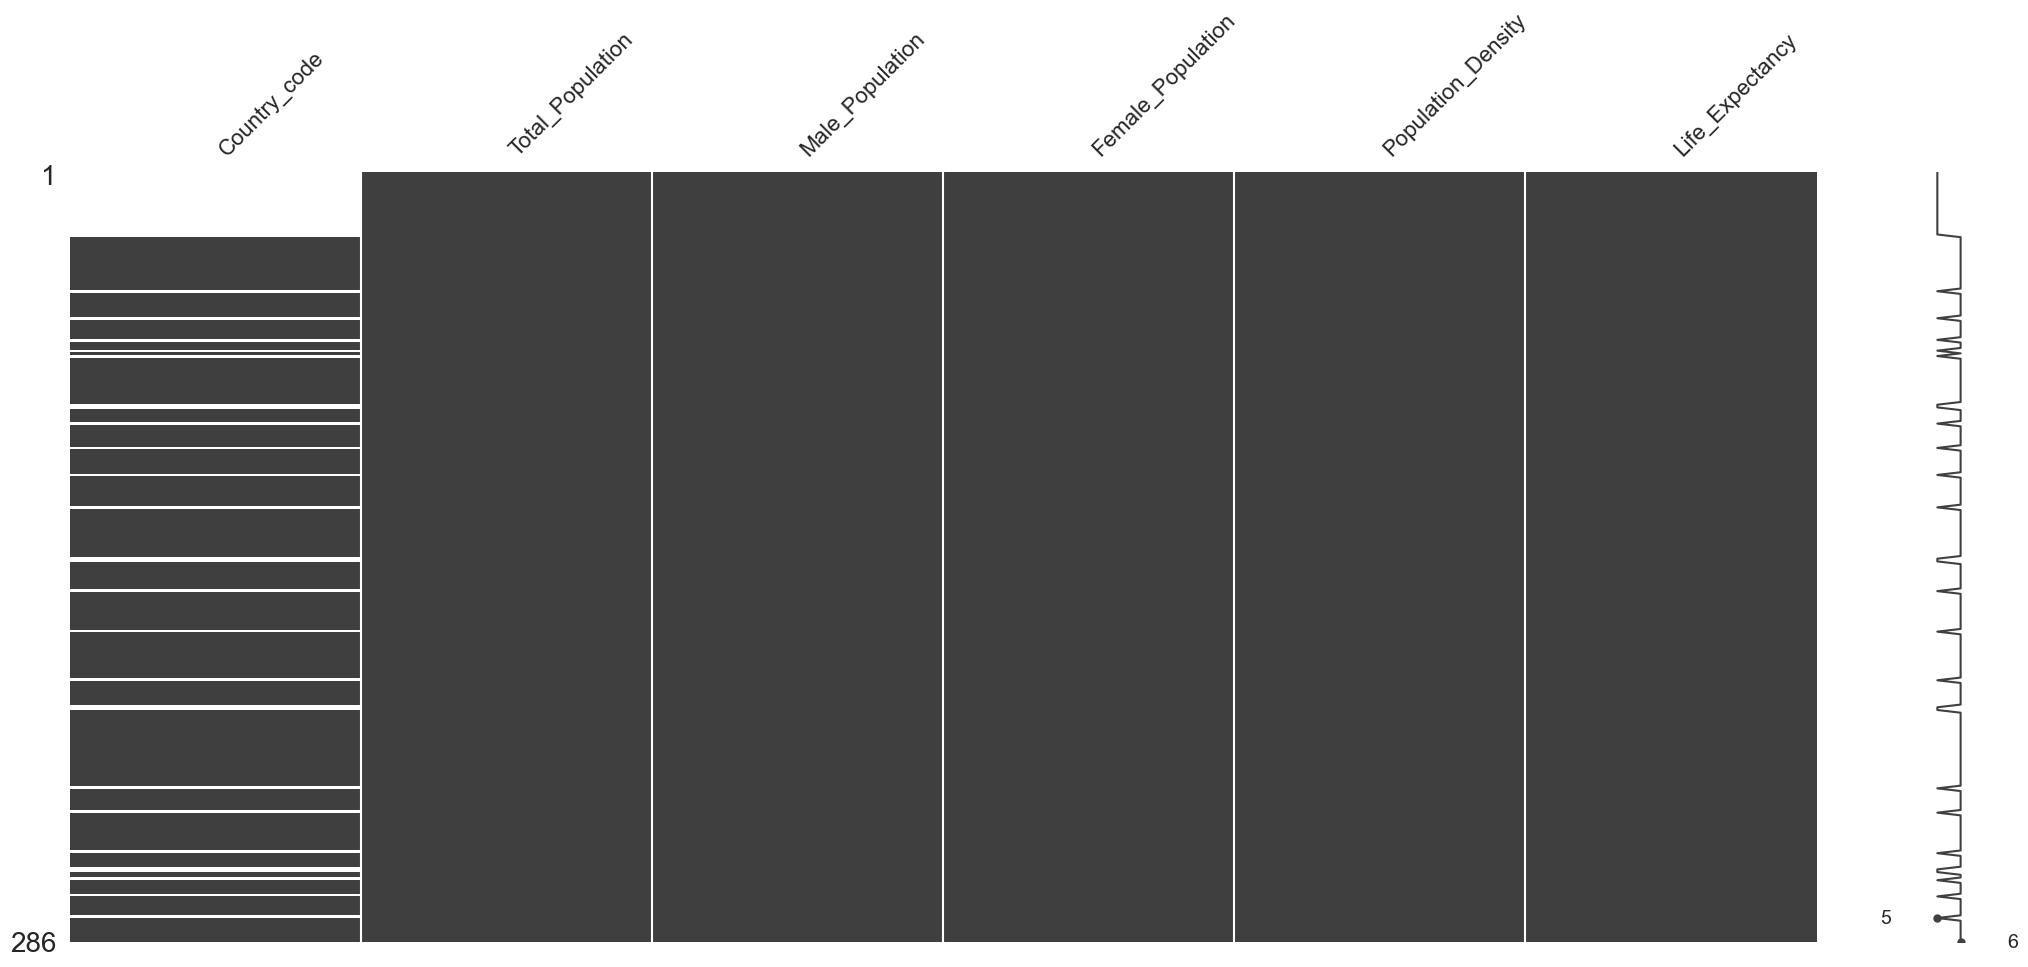

In [72]:
## Verificamos en la matriz de nulos a fin de observar como se distribuyen los nulos en la columna 'Country_code'
msno.matrix(df_population_mod)

* Validamos que al inicio hay un bloque grande de nulos para la variable, se decide eliminar los nulos ya que pueden afectar nuestros análisis.

In [73]:
## Verificamos los tipos de categorías que tenemos en nuestra variable 'Country_code'
df_population_mod['Country_code'].unique()

array([nan, 'BI', 'KM', 'DJ', 'ER', 'ET', 'KE', 'MG', 'MW', 'MU', 'YT',
       'MZ', 'RE', 'RW', 'SC', 'SO', 'SS', 'UG', 'TZ', 'ZM', 'ZW', 'AO',
       'CM', 'CF', 'TD', 'CG', 'CD', 'GQ', 'GA', 'ST', 'DZ', 'EG', 'LY',
       'MA', 'SD', 'TN', 'EH', 'BW', 'SZ', 'LS', 'ZA', 'BJ', 'BF', 'CV',
       'CI', 'GM', 'GH', 'GN', 'GW', 'LR', 'ML', 'MR', 'NE', 'NG', 'SH',
       'SN', 'SL', 'TG', 'KZ', 'KG', 'TJ', 'TM', 'UZ', 'CN', 'HK', 'MO',
       'TW', 'KP', 'JP', 'MN', 'KR', 'AF', 'BD', 'BT', 'IN', 'IR', 'MV',
       'NP', 'PK', 'LK', 'BN', 'KH', 'ID', 'LA', 'MY', 'MM', 'PH', 'SG',
       'TH', 'TL', 'VN', 'AM', 'AZ', 'BH', 'CY', 'GE', 'IQ', 'IL', 'JO',
       'KW', 'LB', 'OM', 'QA', 'SA', 'PS', 'SY', 'TR', 'AE', 'YE', 'BY',
       'BG', 'CZ', 'HU', 'PL', 'MD', 'RO', 'RU', 'SK', 'UA', 'DK', 'EE',
       'FO', 'FI', 'GG', 'IS', 'IE', 'IM', 'JE', 'LV', 'LT', 'NO', 'SE',
       'GB', 'AL', 'AD', 'BA', 'HR', 'GI', 'GR', 'VA', 'IT', 'XK', 'MT',
       'ME', 'MK', 'PT', 'SM', 'RS', 'SI', 'ES', 'AT

* Observamos que tiene valores ***nan***
* Luego de analizar detenidamente a que corresponden estos valores nulos, se visualiza que la variable **'Country_code'** esta relacionada con la variable ***'Region, subregion, country or area *'*** del dataframe original de pupulation, y en las filas donde esta la variable no se coloca un país sino una región o subregión, no figuran códigos de país. Debido a esto no podríamos corregirlo, ya que tenemos que tener un país especifico con su código especifico, decidimos eliminar las filas con valores nulos de la variable **'Country_code'**

In [74]:
## Eliminado las filas con valores nulos en la variable 'Country_code' - Método 1
df_population_mod_notna = df_population_mod[df_population_mod['Country_code'].notna()]
df_population_mod_notna

Country_code Total_Population Male_Population Female_Population  \
1801            BI        11874.838        5894.278           5980.56   
1873            KM          790.986         397.126            393.86   
1945            DJ         1073.994         533.626           540.367   
2017            ER         3498.818         1724.86          1773.958   
2089            ET       114120.594       57375.433         56745.161   
...            ...              ...             ...               ...   
20305           WS          211.905         108.147           103.759   
20377           TK            1.752           0.879             0.874   
20449           TO          104.951          51.994            52.956   
20521           TV           10.956           5.654             5.301   
20593           WF           11.714           5.648             6.066   

      Population_Density Life_Expectancy  
1801             457.605          62.351  
1873             425.033          64.068  
1945              46.333          63.085  
2017              28.881            67.3  
2089             114.121          65.838  
...                  ...             ...  
20305             74.878          72.157  
20377                146          75.076  
20449            161.462          70.871  
20521              365.2          64.278  
20593             83.671          79.617  

[236 rows x 6 columns]

In [75]:
## Eliminado las filas con valores nulos en la variable 'Country_code' - Método 2
df_population_mod_dropna = df_population_mod.dropna(subset=['Country_code'])
df_population_mod_dropna

Country_code Total_Population Male_Population Female_Population  \
1801            BI        11874.838        5894.278           5980.56   
1873            KM          790.986         397.126            393.86   
1945            DJ         1073.994         533.626           540.367   
2017            ER         3498.818         1724.86          1773.958   
2089            ET       114120.594       57375.433         56745.161   
...            ...              ...             ...               ...   
20305           WS          211.905         108.147           103.759   
20377           TK            1.752           0.879             0.874   
20449           TO          104.951          51.994            52.956   
20521           TV           10.956           5.654             5.301   
20593           WF           11.714           5.648             6.066   

      Population_Density Life_Expectancy  
1801             457.605          62.351  
1873             425.033          64.068  
1945              46.333          63.085  
2017              28.881            67.3  
2089             114.121          65.838  
...                  ...             ...  
20305             74.878          72.157  
20377                146          75.076  
20449            161.462          70.871  
20521              365.2          64.278  
20593             83.671          79.617  

[236 rows x 6 columns]

In [76]:
## Convirtiendo valores '...' a nan, presentes en nuestras variables Male_Population, Female_Population y Life_Expectancy
df_population_mod_dropna = df_population_mod_dropna.replace('...',np.nan)
df_population_mod_dropna

Country_code  Total_Population  Male_Population  Female_Population  \
1801            BI         11874.838         5894.278           5980.560   
1873            KM           790.986          397.126            393.860   
1945            DJ          1073.994          533.626            540.367   
2017            ER          3498.818         1724.860           1773.958   
2089            ET        114120.594        57375.433          56745.161   
...            ...               ...              ...                ...   
20305           WS           211.905          108.147            103.759   
20377           TK             1.752            0.879              0.874   
20449           TO           104.951           51.994             52.956   
20521           TV            10.956            5.654              5.301   
20593           WF            11.714            5.648              6.066   

       Population_Density  Life_Expectancy  
1801              457.605           62.351  
1873              425.033           64.068  
1945               46.333           63.085  
2017               28.881           67.300  
2089              114.121           65.838  
...                   ...              ...  
20305              74.878           72.157  
20377             146.000           75.076  
20449             161.462           70.871  
20521             365.200           64.278  
20593              83.671           79.617  

[236 rows x 6 columns]

* Se decide eliminar estos nuevos valores nulos, solo son 3 datos.
* En este caso la variable como Life_Expectancy, puede depender de diversos factores y puede ser difícil de imputar con precisión, la imputación podría no ser adecuada. Asimismo, variables demográficas como Male_Population y Female_Population pueden tener relaciones complejas que no se pueden capturar fácilmente con imputación.

In [77]:
## Se decide eliminar los nuevos valores nulos obtenidos
df_population_mod_dropna = df_population_mod_dropna.dropna(subset=['Male_Population'])
df_population_mod_dropna = df_population_mod_dropna.dropna(subset=['Life_Expectancy'])
df_population_mod_dropna = df_population_mod_dropna.dropna(subset=['Female_Population'])
df_population_mod_dropna

Country_code  Total_Population  Male_Population  Female_Population  \
1801            BI         11874.838         5894.278           5980.560   
1873            KM           790.986          397.126            393.860   
1945            DJ          1073.994          533.626            540.367   
2017            ER          3498.818         1724.860           1773.958   
2089            ET        114120.594        57375.433          56745.161   
...            ...               ...              ...                ...   
20305           WS           211.905          108.147            103.759   
20377           TK             1.752            0.879              0.874   
20449           TO           104.951           51.994             52.956   
20521           TV            10.956            5.654              5.301   
20593           WF            11.714            5.648              6.066   

       Population_Density  Life_Expectancy  
1801              457.605           62.351  
1873              425.033           64.068  
1945               46.333           63.085  
2017               28.881           67.300  
2089              114.121           65.838  
...                   ...              ...  
20305              74.878           72.157  
20377             146.000           75.076  
20449             161.462           70.871  
20521             365.200           64.278  
20593              83.671           79.617  

[235 rows x 6 columns]

* Observamos que solo reducimos en una fila nuestro dataset.

In [78]:
## Validando que no exista presencia de valores nulos en el dataframe
df_population_mod_dropna.isna().sum()

Country_code          0
Total_Population      0
Male_Population       0
Female_Population     0
Population_Density    0
Life_Expectancy       0
dtype: int64

* Ya no tenemos presencia de datos **NaN** en nuestro dataset.

### 2.2.2 Tranformando el tipo de dato de nuestras variables

* En esta parte trabajaremos los tipos de datos de nuestro dataframe, debido a que tenemos valores numéricos, pero estos estan representados como Object, tenemos que convertirlos.

In [79]:
## Convertimos a int64 nuestras variables numéricas
df_population_mod_dropna['Female_Population'].astype('int64')
df_population_mod_dropna['Total_Population'].astype('int64')
df_population_mod_dropna['Male_Population'].astype('int64')
df_population_mod_dropna['Population_Density'].astype('int64')
df_population_mod_dropna['Life_Expectancy'].astype('int64')

1801     62
1873     64
1945     63
2017     67
2089     65
         ..
20305    72
20377    75
20449    70
20521    64
20593    79
Name: Life_Expectancy, Length: 235, dtype: int64

In [80]:
## Verificando que la conversión haya sido exitosa
df_population_mod_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 1801 to 20593
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country_code        235 non-null    object 
 1   Total_Population    235 non-null    float64
 2   Male_Population     235 non-null    float64
 3   Female_Population   235 non-null    float64
 4   Population_Density  235 non-null    float64
 5   Life_Expectancy     235 non-null    float64
dtypes: float64(5), object(1)
memory usage: 12.9+ KB


* Notamos que no llegó a convertirse a **int64**, debido a que poseemos tipo de datos **float64**. COntinuamos con este tipo de dato.

In [81]:
## Multiplicamos por 1000 algunas variables, a fin de tener un dato más exacto sin decimales
df_population_mod_dropna[['Total_Population','Male_Population','Female_Population']] = df_population_mod_dropna[['Total_Population','Male_Population','Female_Population']]*1000
df_population_mod_dropna

Country_code  Total_Population  Male_Population  Female_Population  \
1801            BI        11874838.0        5894278.0          5980560.0   
1873            KM          790986.0         397126.0           393860.0   
1945            DJ         1073994.0         533626.0           540367.0   
2017            ER         3498818.0        1724860.0          1773958.0   
2089            ET       114120594.0       57375433.0         56745161.0   
...            ...               ...              ...                ...   
20305           WS          211905.0         108147.0           103759.0   
20377           TK            1752.0            879.0              874.0   
20449           TO          104951.0          51994.0            52956.0   
20521           TV           10956.0           5654.0             5301.0   
20593           WF           11714.0           5648.0             6066.0   

       Population_Density  Life_Expectancy  
1801              457.605           62.351  
1873              425.033           64.068  
1945               46.333           63.085  
2017               28.881           67.300  
2089              114.121           65.838  
...                   ...              ...  
20305              74.878           72.157  
20377             146.000           75.076  
20449             161.462           70.871  
20521             365.200           64.278  
20593              83.671           79.617  

[235 rows x 6 columns]

In [82]:
## Validando no presencia de nulos nuevamente
df_population_mod_dropna.isnull().sum()

Country_code          0
Total_Population      0
Male_Population       0
Female_Population     0
Population_Density    0
Life_Expectancy       0
dtype: int64

* Validamos nuevamente no tener nulos, de forma satisfactoria.

### 2.2.3 Dataframe Transformado 

In [83]:
## Reasignando la variable y corrigiendo el índice
df_population_limpio = df_population_mod_dropna.reset_index(drop=True)
df_population_limpio

Country_code  Total_Population  Male_Population  Female_Population  \
0             BI        11874838.0        5894278.0          5980560.0   
1             KM          790986.0         397126.0           393860.0   
2             DJ         1073994.0         533626.0           540367.0   
3             ER         3498818.0        1724860.0          1773958.0   
4             ET       114120594.0       57375433.0         56745161.0   
..           ...               ...              ...                ...   
230           WS          211905.0         108147.0           103759.0   
231           TK            1752.0            879.0              874.0   
232           TO          104951.0          51994.0            52956.0   
233           TV           10956.0           5654.0             5301.0   
234           WF           11714.0           5648.0             6066.0   

     Population_Density  Life_Expectancy  
0               457.605           62.351  
1               425.033           64.068  
2                46.333           63.085  
3                28.881           67.300  
4               114.121           65.838  
..                  ...              ...  
230              74.878           72.157  
231             146.000           75.076  
232             161.462           70.871  
233             365.200           64.278  
234              83.671           79.617  

[235 rows x 6 columns]

* Reasignamos el nombre del dataframe, de ahora en adelante trabajaremos con **df_population_limpio**, el cual nos representa nuestro dataset de population despues de realizar el tratamiento.

# 3. Planteamiento de Preguntas 

## 3.1 ¿Cómo ha evolucionado el Covid-19 en México-Perú-Colombia en comparación con el impacto observado a nivel global?

In [84]:
## Validamos nuestro dataframe donde responderemos la pregunta
df_covid_limpio_final.head(10)

Date_reported Country_code      Country  New_cases  Cumulative_cases  \
0    2020-01-05           AF  Afghanistan          0                 0   
1    2020-01-12           AF  Afghanistan          0                 0   
2    2020-01-19           AF  Afghanistan          0                 0   
3    2020-01-26           AF  Afghanistan          0                 0   
4    2020-02-02           AF  Afghanistan          0                 0   
5    2020-02-09           AF  Afghanistan          0                 0   
6    2020-02-16           AF  Afghanistan          0                 0   
7    2020-02-23           AF  Afghanistan          0                 0   
8    2020-03-01           AF  Afghanistan          1                 1   
9    2020-03-08           AF  Afghanistan          0                 1   

   New_deaths  Cumulative_deaths  lethality_rate  
0           0                  0             0.0  
1           0                  0             0.0  
2           0                  0             0.0  
3           0                  0             0.0  
4           0                  0             0.0  
5           0                  0             0.0  
6           0                  0             0.0  
7           0                  0             0.0  
8           0                  0             0.0  
9           0                  0             0.0

**WORLWIDE CASES DISTRIBUTION**

* En esta parte, trataremos de conseguir la distribución de casos acumulados alrededor del mundo. Pero nos centraremos en el top 10 de países y adicional, analizaremos 3 países de Latinoamerica: México, Perú y Colombia.

In [85]:
## Seleccionando los 10 paises con más casos acumulados - Top 10
top_10_countries = df_covid_limpio_final.groupby('Country').max().reset_index()[['Country','Cumulative_cases']].sort_values(by='Cumulative_cases', ascending=False).head(10)
top_10_countries

Country  Cumulative_cases
222                           United States of America         103436829
42                                               China          99326423
96                                               India          45023751
72                                              France          38997490
78                                             Germany          38437756
28                                              Brazil          37519960
168                                  Republic of Korea          34571873
105                                              Japan          33803572
103                                              Italy          26693706
219  United Kingdom of Great Britain and Northern I...          24885790

In [86]:
## Agrupando los países que no están en el top 10
other_countries = df_covid_limpio_final.groupby('Country').max().reset_index()[['Country','Cumulative_cases']].sort_values(by='Cumulative_cases', ascending=False).iloc[10:]
other_countries

Country  Cumulative_cases
171                     Russian Federation          23773710
215                                Türkiye          17004677
197                                  Spain          13980340
11                               Australia          11752647
227                               Viet Nam          11624000
..                                     ...               ...
208                                Tokelau                80
92                                Holy See                26
163                               Pitcairn                 4
212                           Turkmenistan                 0
54   Democratic People's Republic of Korea                 0

[223 rows x 2 columns]

In [87]:
## Conseguimos los 3 países que analizaremos el COVID 19: México - Perú - Colombia
countries_evaluated = other_countries[(other_countries['Country']== 'Mexico') | (other_countries['Country']=='Peru')
                                       | (other_countries['Country']=='Colombia')]
countries_evaluated

Country  Cumulative_cases
134    Mexico           7702809
43   Colombia           6391672
161      Peru           4536733

In [88]:
## Casos acumulados por los países que no están en el Top 10 ni tampoco son los 3 países que estamos analizando
other_countries_without_analized = other_countries['Cumulative_cases'].sum() - countries_evaluated['Cumulative_cases'].sum()
other_countries_without_analized

272900585

In [89]:
# Usando concat para agregar los 3 paises a analizar al dataframe top 10
top_10_countries = pd.concat([top_10_countries, countries_evaluated], ignore_index=True)

## Adicionando nueva fila (Other_countries) al dataframe top_10_countries
new_row = {'Country': 'Others', 'Cumulative_cases': other_countries_without_analized}
top_10_countries = top_10_countries.append(new_row,ignore_index=True)

top_10_countries

# Usar concat para agregar los 3 paises a analizar
#df_covid_limpio = pd.concat([df_covid_limpio, pd.DataFrame([nueva_fila])], ignore_index=True)

C:\Users\david\AppData\Local\Temp\ipykernel_18620\2688136716.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_10_countries = top_10_countries.append(new_row,ignore_index=True)


Country  Cumulative_cases
0                            United States of America         103436829
1                                               China          99326423
2                                               India          45023751
3                                              France          38997490
4                                             Germany          38437756
5                                              Brazil          37519960
6                                   Republic of Korea          34571873
7                                               Japan          33803572
8                                               Italy          26693706
9   United Kingdom of Great Britain and Northern I...          24885790
10                                             Mexico           7702809
11                                           Colombia           6391672
12                                               Peru           4536733
13                                             Others         272900585

In [90]:
## Modificando los nombres de algunos paises, por la longitud
top_10_countries['Country'] = top_10_countries['Country'].replace({'United States of America':'USA', 'United Kingdom of Great Britain and Northern Ireland':'United Kingdom'})
top_10_countries

Country  Cumulative_cases
0                 USA         103436829
1               China          99326423
2               India          45023751
3              France          38997490
4             Germany          38437756
5              Brazil          37519960
6   Republic of Korea          34571873
7               Japan          33803572
8               Italy          26693706
9      United Kingdom          24885790
10             Mexico           7702809
11           Colombia           6391672
12               Peru           4536733
13             Others         272900585

In [91]:
# # Gráfico de Donuts
# fig, axs = plt.subplots(1, 2, figsize=(14, 5))
# wedges, texts, autotexts = axs[0].pie(top_10_countries, autopct='%1.1f%%', textprops={'fontsize': 9}, pctdistance=0.75, startangle=185, wedgeprops=dict(width=0.5, edgecolor='w'))

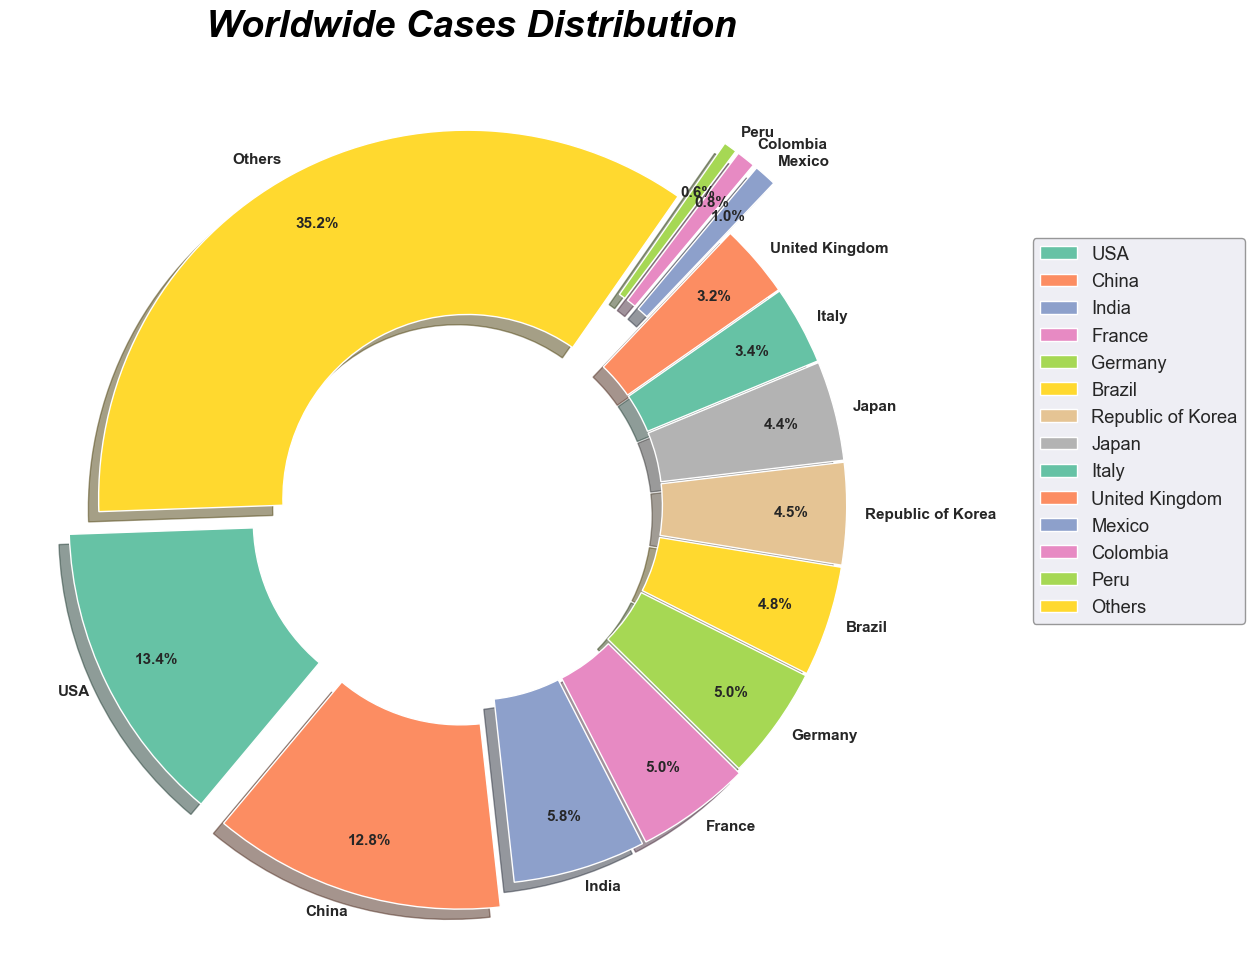

In [92]:
## Gráfico de Pie
valores = top_10_countries['Cumulative_cases']
etiqueta = top_10_countries['Country']
explode = (0.1, 0.1, 0.03, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.2, 0.2, 0.2, 0.02)
#colores = plt.cm.viridis((0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0))
data = [210, 200, 180, 170, 150, 140, 120, 100, 80, 70, 70, 60, 60, 50]
colors = plt.cm.Blues(data)
colors2 = plt.cm.viridis(data)

plt.figure(figsize=(20,10))
plt.pie(valores,labels=etiqueta, explode=explode,autopct='%1.1f%%', textprops={'fontsize': 11,'weight': 'bold'}, pctdistance=0.85, 
        startangle=182, wedgeprops=dict(width=0.5, edgecolor='w'), labeldistance=1.05, colors=plt.cm.Set2.colors, shadow=True)
    
plt.title('Worldwide Cases Distribution', fontdict={'fontsize': 27, 'fontweight': 'bold', 'color': 'Black',
    'family': 'sans-serif',
    'style': 'italic'})
plt.legend(etiqueta.T, bbox_to_anchor=((1.1,0.8)), frameon=True, edgecolor='gray')
plt.tight_layout()
plt.show()

* En la gráfica de pie notamos que los dos **paises con más casos acumulados** y por ende con mayor porcentaje, son **USA y China**, en ese orden respectivamente.
* El **resto de países que comprenden el Top 10**, tienen un porcentaje de casos acumulados similares que van del **5.8% al 3.2%**.
* Los 3 Países latinoamericanos analizados **(México-perú-Colombia)**, tiene porcentajes de casos acumulados mucho más bajos comparados con los demás países, va en el rango del **1% al 0.5%**.
* Considerar como dato importante la población de los países, este es un dato importante a tener en cuenta.

**CASE PROGRESSION BY COUNTRY**

* En esta parte, analizaremos como se ha dado la evolución de los casos acumulados para el **Top 5 de países con más casos**. Adicional a esto, se seguirá analizando los 3 países Latinoamericanos **(México-perú-Colombia)**.

In [93]:
## Escogemos los 5 países con más casos acumulados
total_5_countries = df_covid_limpio_final.groupby('Country').max().reset_index()[['Country','Cumulative_cases']].sort_values(by='Cumulative_cases',ascending=False).head(5)
total_5_countries

Country  Cumulative_cases
222  United States of America         103436829
42                      China          99326423
96                      India          45023751
72                     France          38997490
78                    Germany          38437756

In [94]:
# Usando concat para agregar los 3 paises a analizar
total_5_countries = pd.concat([total_5_countries, countries_evaluated], ignore_index=True)
total_5_countries

Country  Cumulative_cases
0  United States of America         103436829
1                     China          99326423
2                     India          45023751
3                    France          38997490
4                   Germany          38437756
5                    Mexico           7702809
6                  Colombia           6391672
7                      Peru           4536733

In [95]:
## Creamos un dataframe que contenga solo 3 columnas elegidas
df_cumulative_cases = df_covid_limpio_final[['Country','Date_reported','Cumulative_cases']]
df_cumulative_cases

Country Date_reported  Cumulative_cases
0      Afghanistan    2020-01-05                 0
1      Afghanistan    2020-01-12                 0
2      Afghanistan    2020-01-19                 0
3      Afghanistan    2020-01-26                 0
4      Afghanistan    2020-02-02                 0
...            ...           ...               ...
49388     Zimbabwe    2023-12-24            266048
49389     Zimbabwe    2023-12-31            266071
49390     Zimbabwe    2024-01-07            266117
49391     Zimbabwe    2024-01-14            266202
49392     Zimbabwe    2024-01-21            266257

[49393 rows x 3 columns]

In [96]:
## Agrupamos el dataframe creado solo por nuestro top 5 de países con más casos acumulados
df_cumulative_top5 = df_cumulative_cases[df_cumulative_cases['Country'].isin(total_5_countries['Country'])]
df_cumulative_top5

Country Date_reported  Cumulative_cases
8903                      China    2020-01-05                 1
8904                      China    2020-01-12                45
8905                      China    2020-01-19               125
8906                      China    2020-01-26              1985
8907                      China    2020-02-02             14411
...                         ...           ...               ...
47270  United States of America    2023-12-24         103436829
47271  United States of America    2023-12-31         103436829
47272  United States of America    2024-01-07         103436829
47273  United States of America    2024-01-14         103436829
47274  United States of America    2024-01-21         103436829

[1696 rows x 3 columns]

In [97]:
## Primera Forma
## Hacemos uso de la función pivot, a fin de crear una tabla descriptiva de como se iba acumulando los casos para nuestro top5
total_cumulative_top5 = df_cumulative_top5.pivot(index='Country', columns='Date_reported', values='Cumulative_cases')
total_cumulative_top5

Date_reported             2020-01-05  2020-01-12  2020-01-19  2020-01-26  \
Country                                                                    
China                              1          45         125        1985   
Colombia                           0           0           0           0   
France                             0           0           0           3   
Germany                            1           1           1           2   
India                              0           0           0           0   
Mexico                             0           0           0           0   
Peru                               0           0           0           0   
United States of America           0           0           0           7   

Date_reported             2020-02-02  2020-02-09  2020-02-16  2020-02-23  \
Country                                                                    
China                          14411       37251       68584       77042   
Colombia                           0           0           0           0   
France                             6          12          12          16   
Germany                           11          20          25          31   
India                              2           7           7           7   
Mexico                             0           0           0           1   
Peru                               0           0           0           0   
United States of America           9          20          24          40   

Date_reported             2020-03-01  2020-03-08  ...  2023-11-19  2023-11-26  \
Country                                           ...                           
China                          79968       80859  ...    99320035    99320425   
Colombia                           0           1  ...     6383595     6383948   
France                            16          16  ...    38997490    38997490   
Germany                          170        1075  ...    38437756    38437756   
India                              7          39  ...    45001575    45001764   
Mexico                             6          51  ...     7702324     7702412   
Peru                               0           9  ...     4525960     4527448   
United States of America          73         464  ...   103436829   103436829   

Date_reported             2023-12-03  2023-12-10  2023-12-17  2023-12-24  \
Country                                                                    
China                       99320845    99321242    99321637    99322142   
Colombia                     6384224     6384551     6384979     6385539   
France                      38997490    38997490    38997490    38997490   
Germany                     38437756    38437756    38437756    38437756   
India                       45002179    45003055    45004816    45008620   
Mexico                       7702517     7702619     7702738     7702802   
Peru                         4529542     4532076     4535365     4536698   
United States of America   103436829   103436829   103436829   103436829   

Date_reported             2023-12-31  2024-01-07  2024-01-14  2024-01-21  
Country                                                                   
China                       99322727    99323756    99325108    99326423  
Colombia                     6386231     6387209     6389365     6391672  
France                      38997490    38997490    38997490    38997490  
Germany                     38437756    38437756    38437756    38437756  
India                       45013172    45018134    45021758    45023751  
Mexico                       7702809     7702809     7702809     7702809  
Peru                         4536733     4536733     4536733     4536733  
United States of America   103436829   103436829   103436829   103436829  

[8 rows x 212 columns]

In [98]:
## Segunda Forma
## Hacemos uso de la función pivot, a fin de crear una tabla descriptiva de como se iba acumulando los casos para nuestro top5
total_cumulative_top5 = df_cumulative_top5.pivot(index='Date_reported', columns='Country', values='Cumulative_cases').reset_index()
total_cumulative_top5

Country Date_reported     China  Colombia    France   Germany     India  \
0          2020-01-05         1         0         0         1         0   
1          2020-01-12        45         0         0         1         0   
2          2020-01-19       125         0         0         1         0   
3          2020-01-26      1985         0         3         2         0   
4          2020-02-02     14411         0         6        11         2   
..                ...       ...       ...       ...       ...       ...   
207        2023-12-24  99322142   6385539  38997490  38437756  45008620   
208        2023-12-31  99322727   6386231  38997490  38437756  45013172   
209        2024-01-07  99323756   6387209  38997490  38437756  45018134   
210        2024-01-14  99325108   6389365  38997490  38437756  45021758   
211        2024-01-21  99326423   6391672  38997490  38437756  45023751   

Country   Mexico     Peru  United States of America  
0              0        0                         0  
1              0        0                         0  
2              0        0                         0  
3              0        0                         7  
4              0        0                         9  
..           ...      ...                       ...  
207      7702802  4536698                 103436829  
208      7702809  4536733                 103436829  
209      7702809  4536733                 103436829  
210      7702809  4536733                 103436829  
211      7702809  4536733                 103436829  

[212 rows x 9 columns]

In [99]:
## Calculamos los días acumulados para cada fila de todo el dataframe
total_cumulative_top5['Cumulative_days'] = total_cumulative_top5['Date_reported'].diff().dt.days.fillna(0).cumsum()
total_cumulative_top5

Country Date_reported     China  Colombia    France   Germany     India  \
0          2020-01-05         1         0         0         1         0   
1          2020-01-12        45         0         0         1         0   
2          2020-01-19       125         0         0         1         0   
3          2020-01-26      1985         0         3         2         0   
4          2020-02-02     14411         0         6        11         2   
..                ...       ...       ...       ...       ...       ...   
207        2023-12-24  99322142   6385539  38997490  38437756  45008620   
208        2023-12-31  99322727   6386231  38997490  38437756  45013172   
209        2024-01-07  99323756   6387209  38997490  38437756  45018134   
210        2024-01-14  99325108   6389365  38997490  38437756  45021758   
211        2024-01-21  99326423   6391672  38997490  38437756  45023751   

Country   Mexico     Peru  United States of America  Cumulative_days  
0              0        0                         0              0.0  
1              0        0                         0              7.0  
2              0        0                         0             14.0  
3              0        0                         7             21.0  
4              0        0                         9             28.0  
..           ...      ...                       ...              ...  
207      7702802  4536698                 103436829           1449.0  
208      7702809  4536733                 103436829           1456.0  
209      7702809  4536733                 103436829           1463.0  
210      7702809  4536733                 103436829           1470.0  
211      7702809  4536733                 103436829           1477.0  

[212 rows x 10 columns]

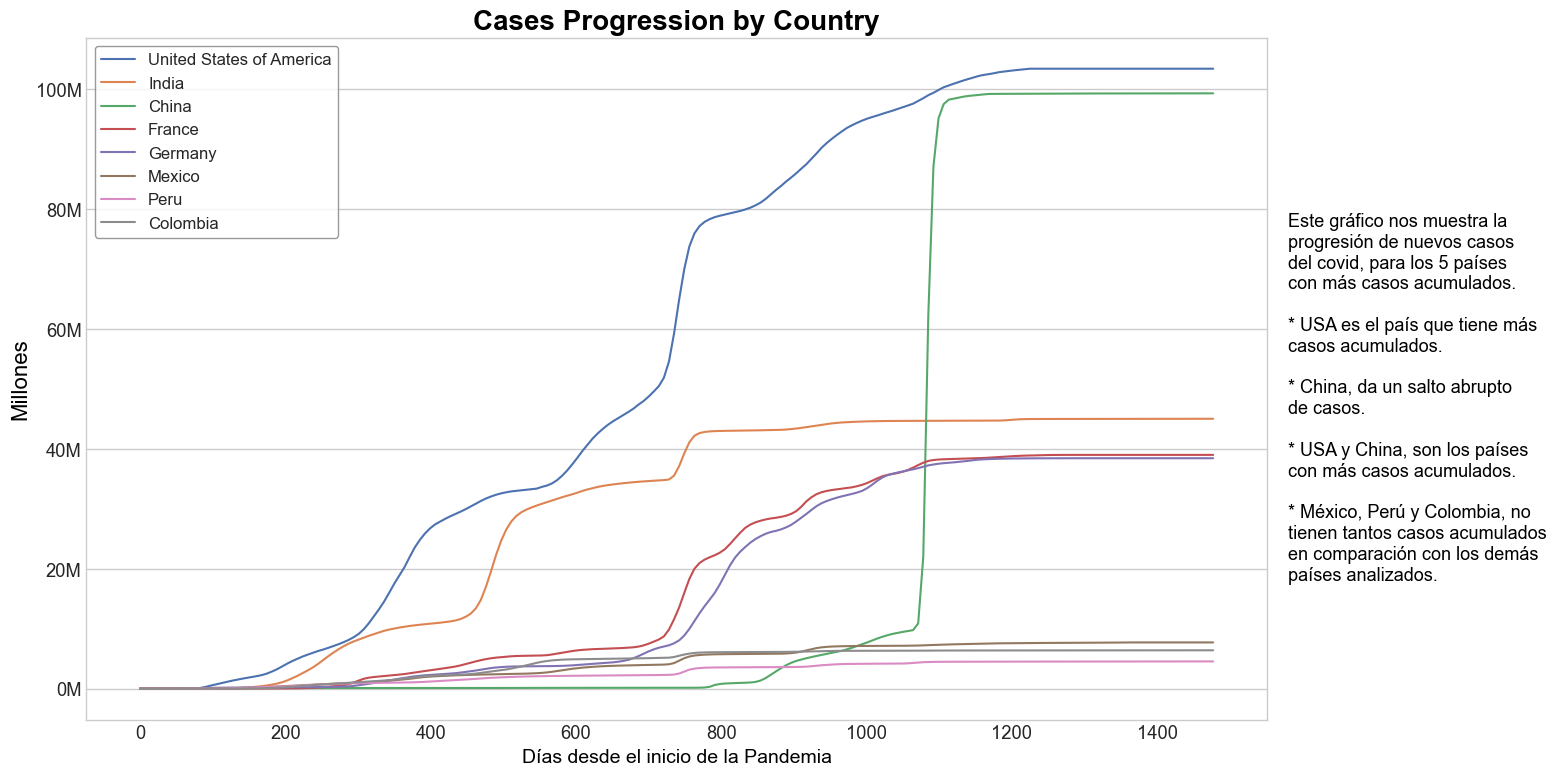

In [100]:
## Realizamos la Gráfica de la Progresión de Casos por País

from matplotlib.ticker import FuncFormatter
plt.figure(figsize=(13,8))
plt.style.use('seaborn-whitegrid')
x= total_cumulative_top5['Cumulative_days']
y= total_cumulative_top5[['United States of America','India','China', 'France','Germany', 'Mexico', 'Peru', 'Colombia']]
plt.plot(x,y)
plt.title('Cases Progression by Country', fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': 'black'})
plt.xlabel('Días desde el inicio de la Pandemia', fontdict={'fontsize': 14, 'color': 'black'})
plt.ylabel('Millones', fontdict={'fontsize': 16, 'color': 'black'})

# Añadir formateo al eje Y con números enteros y "M" para millones
def millions_formatter(x, _):
    return f'{int(x/1e6)}M'

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# # Añadir líneas horizontales
# for y_value in range(0,101,20):
#     plt.axhline(y=y_value*1e6, color='gray', linestyle='-', alpha=0.2)
    
# Añadir texto de conclusión
conclusion_text = '''
Este gráfico nos muestra la 
progresión de nuevos casos
del covid, para los 5 países
con más casos acumulados.

* USA es el país que tiene más 
casos acumulados.

* China, da un salto abrupto 
de casos.

* USA y China, son los países
con más casos acumulados.

* México, Perú y Colombia, no 
tienen tantos casos acumulados
en comparación con los demás
países analizados.'''

plt.figtext(1, 0.5, conclusion_text, fontsize=13, color='black', va='center', ha='left')
    
plt.grid(axis='x')
plt.legend(y.columns, fontsize='small',loc='upper left', frameon=True, edgecolor='gray')
plt.tight_layout()
plt.show()

In [101]:
# #Formatear el eje Y con números enteros y "M" para millones
# def percentage_formatter(x,_):
#     rounded_value = round(x*100,0)
#     return f'{int(rounded_value):,}%'
# ax.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

# fig.text(1,0.5, conclusion_text, fontsize=12, color='#495057', va='center', ha='left')

## 3.2 ¿Cuál ha sido la evolución de los nuevos casos diarios reportados de Covid-19 en México-Perú-Colombia a lo largo del tiempo? 

In [102]:
## Validamos nuestro dataframe donde responderemos la pregunta
df_covid_limpio_final.head(10)

Date_reported Country_code      Country  New_cases  Cumulative_cases  \
0    2020-01-05           AF  Afghanistan          0                 0   
1    2020-01-12           AF  Afghanistan          0                 0   
2    2020-01-19           AF  Afghanistan          0                 0   
3    2020-01-26           AF  Afghanistan          0                 0   
4    2020-02-02           AF  Afghanistan          0                 0   
5    2020-02-09           AF  Afghanistan          0                 0   
6    2020-02-16           AF  Afghanistan          0                 0   
7    2020-02-23           AF  Afghanistan          0                 0   
8    2020-03-01           AF  Afghanistan          1                 1   
9    2020-03-08           AF  Afghanistan          0                 1   

   New_deaths  Cumulative_deaths  lethality_rate  
0           0                  0             0.0  
1           0                  0             0.0  
2           0                  0             0.0  
3           0                  0             0.0  
4           0                  0             0.0  
5           0                  0             0.0  
6           0                  0             0.0  
7           0                  0             0.0  
8           0                  0             0.0  
9           0                  0             0.0

In [103]:
# #Daily New Cases
# grouped_df = df_covid_limpio.groupby(['Country', 'Date_reported'])['Cumulative_cases'].sum().unstack()
# grouped_df = grouped_df.reset_index()
# grouped_df = grouped_df.set_index('Country')
# grouped_df = grouped_df.loc[['France']]
# fechas = grouped_df.columns
# new_cases = grouped_df[fechas].diff(axis=1).fillna(grouped_df[fechas]).sum(axis=0)
# new_cases = new_cases[new_cases > 0]
# new_cases

**PRIMERA FORMA**

In [104]:
## Realizamos una agrupación del dataframe por País y día reportado, seguido de la suma de los casos acumulados.
df_covid_limpio_final.groupby(['Country','Date_reported']).sum()['Cumulative_cases'].unstack()

Date_reported                                       2020-01-05  2020-01-12  \
Country                                                                      
Afghanistan                                                0.0         0.0   
Albania                                                    0.0         0.0   
Algeria                                                    0.0         0.0   
American Samoa                                             0.0         0.0   
Andorra                                                    0.0         0.0   
...                                                        ...         ...   
Wallis and Futuna                                          0.0         0.0   
Yemen                                                      0.0         0.0   
Zambia                                                     0.0         0.0   
Zimbabwe                                                   0.0         0.0   
occupied Palestinian territory, including east ...         0.0         0.0   

Date_reported                                       2020-01-19  2020-01-26  \
Country                                                                      
Afghanistan                                                0.0         0.0   
Albania                                                    0.0         0.0   
Algeria                                                    0.0         0.0   
American Samoa                                             0.0         0.0   
Andorra                                                    0.0         0.0   
...                                                        ...         ...   
Wallis and Futuna                                          0.0         0.0   
Yemen                                                      0.0         0.0   
Zambia                                                     0.0         0.0   
Zimbabwe                                                   0.0         0.0   
occupied Palestinian territory, including east ...         0.0         0.0   

Date_reported                                       2020-02-02  2020-02-09  \
Country                                                                      
Afghanistan                                                0.0         0.0   
Albania                                                    0.0         0.0   
Algeria                                                    0.0         0.0   
American Samoa                                             0.0         0.0   
Andorra                                                    0.0         0.0   
...                                                        ...         ...   
Wallis and Futuna                                          0.0         0.0   
Yemen                                                      0.0         0.0   
Zambia                                                     0.0         0.0   
Zimbabwe                                                   0.0         0.0   
occupied Palestinian territory, including east ...         0.0         0.0   

Date_reported                                       2020-02-16  2020-02-23  \
Country                                                                      
Afghanistan                                                0.0         0.0   
Albania                                                    0.0         0.0   
Algeria                                                    0.0         0.0   
American Samoa                                             0.0         0.0   
Andorra                                                    0.0         0.0   
...                                                        ...         ...   
Wallis and Futuna                                          0.0         0.0   
Yemen                                                      0.0         0.0   
Zambia                                                     0.0         0.0   
Zimbabwe                                                   0.0         0.0   
occupied Palestinia

**SEGUNDA FORMA**

In [105]:
## Hacemos uso de la función pivot, a fin de crear una tabla descriptiva de como se iba acumulando los casos para todos los paises
df_grouped = df_covid_limpio_final.pivot(index='Date_reported', columns='Country', values='Cumulative_cases').reset_index()
df_grouped 

Country Date_reported  Afghanistan   Albania   Algeria  American Samoa  \
0          2020-01-05          0.0       0.0       0.0             0.0   
1          2020-01-12          0.0       0.0       0.0             0.0   
2          2020-01-19          0.0       0.0       0.0             0.0   
3          2020-01-26          0.0       0.0       0.0             0.0   
4          2020-02-02          0.0       0.0       0.0             0.0   
..                ...          ...       ...       ...             ...   
207        2023-12-24     230075.0  334596.0  272010.0          8359.0   
208        2023-12-31     230375.0  334596.0  272010.0          8359.0   
209        2024-01-07     230642.0  334653.0  272010.0          8359.0   
210        2024-01-14     230872.0  334752.0  272010.0          8359.0   
211        2024-01-21     231063.0  334818.0  272010.0          8359.0   

Country  Andorra    Angola  Anguilla  Antigua and Barbuda   Argentina  ...  \
0            0.0       0.0       0.0                  0.0         0.0  ...   
1            0.0       0.0       0.0                  0.0         0.0  ...   
2            0.0       0.0       0.0                  0.0         0.0  ...   
3            0.0       0.0       0.0                  0.0         0.0  ...   
4            0.0       0.0       0.0                  0.0         0.0  ...   
..           ...       ...       ...                  ...         ...  ...   
207      48015.0  106720.0    3904.0               9106.0  10076004.0  ...   
208      48015.0  106928.0    3904.0               9106.0  10076858.0  ...   
209      48015.0  107133.0    3904.0               9106.0  10078493.0  ...   
210      48015.0  107233.0    3904.0               9106.0  10081076.0  ...   
211      48015.0  107271.0    3904.0               9106.0  10081076.0  ...   

Country    Uruguay  Uzbekistan  Vanuatu  Venezuela (Bolivarian Republic of)  \
0              0.0         0.0      0.0                                 0.0   
1              0.0         0.0      0.0                                 0.0   
2              0.0         0.0      0.0                                 0.0   
3              0.0         0.0      0.0                                 0.0   
4              0.0         0.0      0.0                                 0.0   
..             ...         ...      ...                                 ...   
207      1041111.0    175081.0  12019.0                            552695.0   
208      1041111.0    175081.0  12019.0                            552695.0   
209      1041111.0    175081.0  12019.0                            552695.0   
210      1041111.0    175081.0  12019.0                            552695.0   
211      1041111.0    175081.0  12019.0                            552695.0   

Country    Viet Nam  Wallis and Futuna    Yemen    Zambia  Zimbabwe  \
0               0.0                0.0      0.0       0.0       0.0   
1               0.0                0.0      0.0       0.0       0.0   
2               0.0                0.0      0.0       0.0       0.0   
3               2.0                0.0      0.0       0.0       0.0   
4               6.0                0.0      0.0       0.0       0.0   
..              ...                ...      ...       ...       ...   
207      11624000.0             3550.0  11945.0  349304.0  266048.0   
208      11624000.0             3550.0  11945.0  349304.0  266071.0   
209      11624000.0             3550.0  11945.0  349304.0  266117.0   
210      11624000.0             3550.0  11945.0  349304.0  266202.0   
211      11624000.0             3550.0  11945.0  349304.0  266257.0   

Country  occupied Palestinian territory, including east Jerusalem  
0                                                      0.0         
1                                                      0.0         
2                                                      0.0         
3                                                      0.0         
4                               

In [106]:
## Separamos solo los paises a evaluar: México-Perú-Colombia
df_grouped_evaluate = df_grouped[['Date_reported','Mexico','Peru','Colombia']]
df_grouped_evaluate

Country Date_reported     Mexico       Peru   Colombia
0          2020-01-05        0.0        0.0        0.0
1          2020-01-12        0.0        0.0        0.0
2          2020-01-19        0.0        0.0        0.0
3          2020-01-26        0.0        0.0        0.0
4          2020-02-02        0.0        0.0        0.0
..                ...        ...        ...        ...
207        2023-12-24  7702802.0  4536698.0  6385539.0
208        2023-12-31  7702809.0  4536733.0  6386231.0
209        2024-01-07  7702809.0  4536733.0  6387209.0
210        2024-01-14  7702809.0  4536733.0  6389365.0
211        2024-01-21  7702809.0  4536733.0  6391672.0

[212 rows x 4 columns]

**OBS:** Debido a la presencia de datos negativos en la columna **New_cases**, se evaluará los nuevos casos de los países con la resta de los acumulados, de esta manera evitamos cualquier contratiempo para datos futuros.

In [107]:
## Creamos nuevas columnas, son la diferencia de filas consecutivas de 'Cumulative_cases' a fin de conseguir los casos diarios
df_grouped_evaluate = df_grouped_evaluate.copy()
df_grouped_evaluate['Mexico_daily_cases'] = df_grouped_evaluate['Mexico'].diff().fillna(0)
df_grouped_evaluate['Peru_daily_cases'] = df_grouped_evaluate['Peru'].diff().fillna(0)
df_grouped_evaluate['Colombia_daily_cases'] = df_grouped_evaluate['Colombia'].diff().fillna(0)
df_grouped_evaluate

Country Date_reported     Mexico       Peru   Colombia  Mexico_daily_cases  \
0          2020-01-05        0.0        0.0        0.0                 0.0   
1          2020-01-12        0.0        0.0        0.0                 0.0   
2          2020-01-19        0.0        0.0        0.0                 0.0   
3          2020-01-26        0.0        0.0        0.0                 0.0   
4          2020-02-02        0.0        0.0        0.0                 0.0   
..                ...        ...        ...        ...                 ...   
207        2023-12-24  7702802.0  4536698.0  6385539.0                64.0   
208        2023-12-31  7702809.0  4536733.0  6386231.0                 7.0   
209        2024-01-07  7702809.0  4536733.0  6387209.0                 0.0   
210        2024-01-14  7702809.0  4536733.0  6389365.0                 0.0   
211        2024-01-21  7702809.0  4536733.0  6391672.0                 0.0   

Country  Peru_daily_cases  Colombia_daily_cases  
0                     0.0                   0.0  
1                     0.0                   0.0  
2                     0.0                   0.0  
3                     0.0                   0.0  
4                     0.0                   0.0  
..                    ...                   ...  
207                1333.0                 560.0  
208                  35.0                 692.0  
209                   0.0                 978.0  
210                   0.0                2156.0  
211                   0.0                2307.0  

[212 rows x 7 columns]

### 3.2.1 Perú - Análisis Nuevos casos

In [108]:
## Discriminamos el dataframe solo para analizar Perú, consideramos solo casos diarios con valores mayores a cero
daily_cases_peru = df_grouped_evaluate[['Date_reported','Peru_daily_cases']]
daily_cases_peru = daily_cases_peru[daily_cases_peru['Peru_daily_cases']>0]
daily_cases_peru

Country Date_reported  Peru_daily_cases
9          2020-03-08               9.0
10         2020-03-15              38.0
11         2020-03-22             271.0
12         2020-03-29             317.0
13         2020-04-05             960.0
..                ...               ...
204        2023-12-03            2094.0
205        2023-12-10            2534.0
206        2023-12-17            3289.0
207        2023-12-24            1333.0
208        2023-12-31              35.0

[198 rows x 2 columns]

**PRIMERA FORMA**

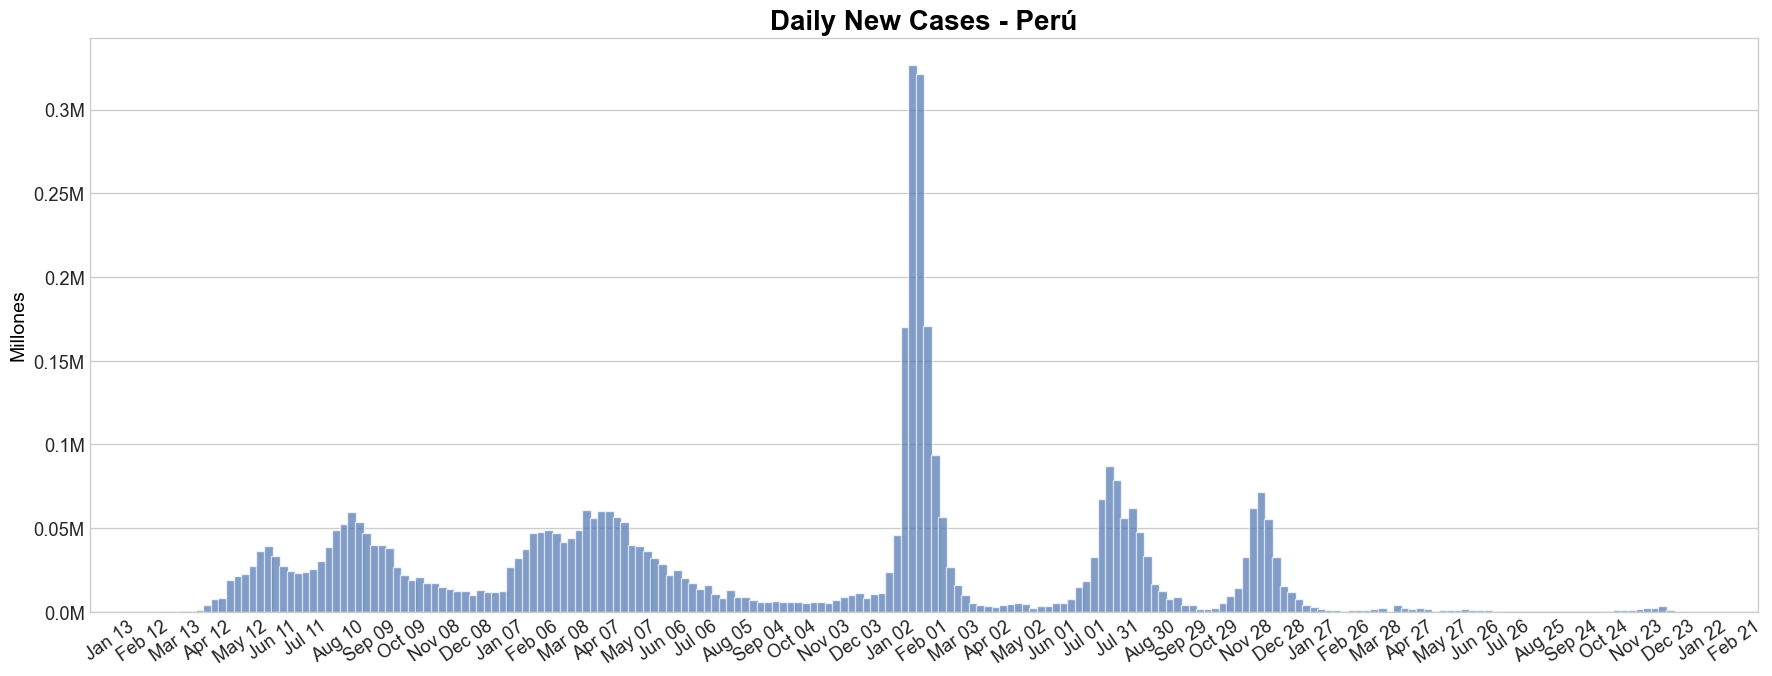

In [109]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
plt.figure(figsize=(18,7))
plt.bar(daily_cases_peru['Date_reported'],daily_cases_peru['Peru_daily_cases'],alpha=0.7, width=8)
plt.title('Daily New Cases - Perú', fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': 'black'})
plt.ylabel('Millones', fontdict={'fontsize': 14, 'color': 'black'})

# Añadir formateo al eje Y con números enteros y "M" para millones
def millions_formatter(x, _):
    return f'{round(x/1e6, 2)}M'

# # Formatear las fechas en el eje x
# date_format = DateFormatter("%b %d")
# plt.gca().xaxis.set_major_formatter(date_format)

# Formatear las fechas en el eje x y ajustar el intervalo
date_format = mdates.DateFormatter("%b %d")
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))  # Mostrar fechas cada 30 días
plt.gca().xaxis.set_major_formatter(date_format)

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.grid(axis='x')
plt.xticks(rotation=35)
plt.tight_layout()
plt.show()

**SEGUNDA FORMA**

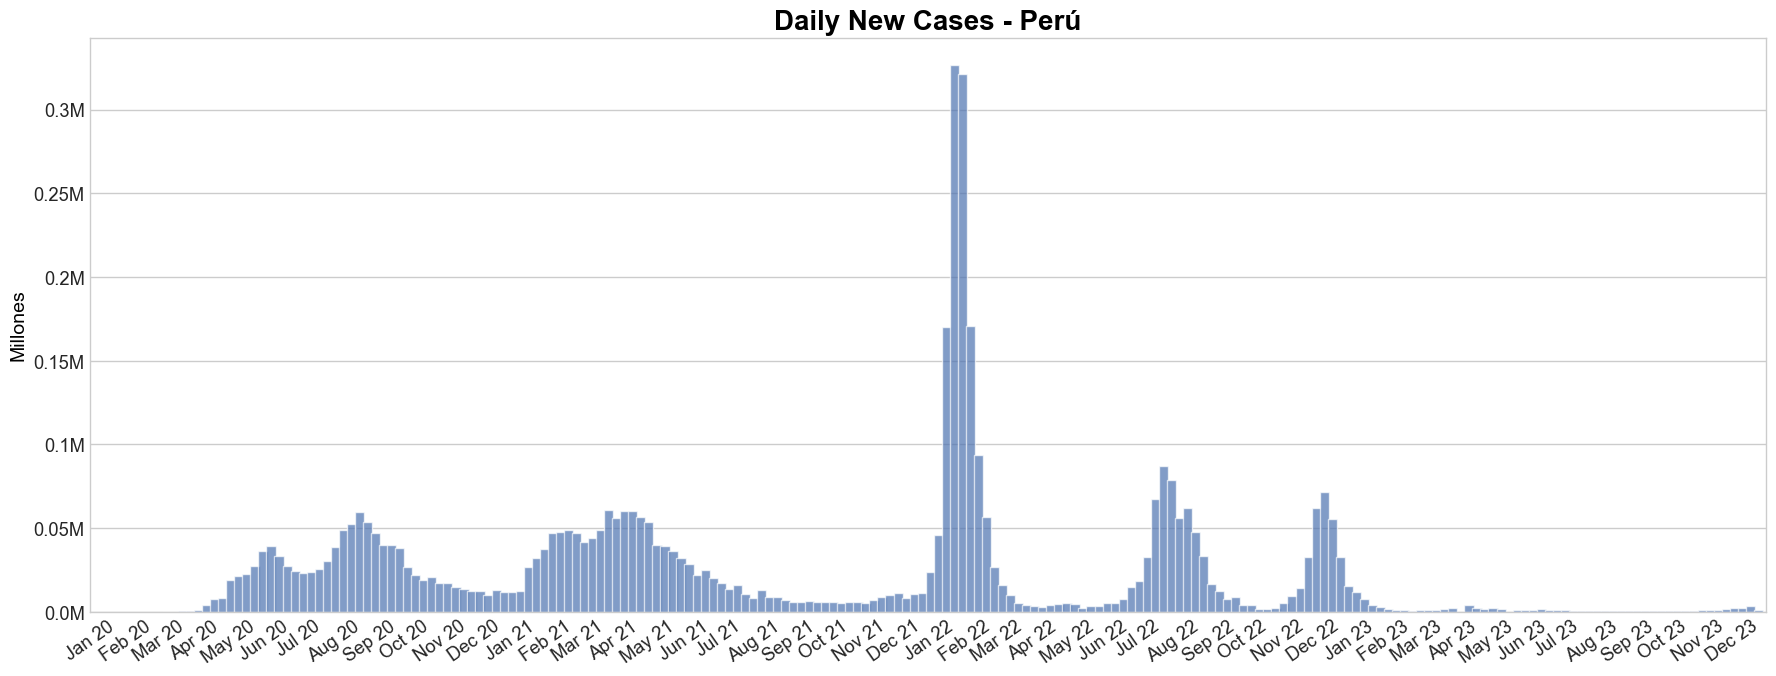

In [110]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
plt.figure(figsize=(18,7))
plt.bar(daily_cases_peru['Date_reported'],daily_cases_peru['Peru_daily_cases'],alpha=0.7, width=8)
plt.title('Daily New Cases - Perú', fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': 'black'})
plt.ylabel('Millones', fontdict={'fontsize': 14, 'color': 'black'})

# Ajustar el límite inferior del eje x a enero de 2020
start_date = pd.to_datetime('2020-01-01')
end_date = daily_cases_peru['Date_reported'].max()

# Añadir formateo al eje Y con números enteros y "M" para millones
def millions_formatter(x, _):
    return f'{round(x/1e6, 2)}M'

# Formatear las fechas en el eje x y ajustar el intervalo
date_format = mdates.DateFormatter("%b %y")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Mostrar fechas cada 30 días
plt.gca().xaxis.set_major_formatter(date_format)

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.xlim(start_date, end_date) # Establecer los límites del eje x
plt.grid(axis='x')
plt.xticks(rotation=35)
plt.tight_layout()
plt.show()

**CONCLUSIONES**
* Notamos que entre **dic-2021 y ene-2022**, se presenta un elevado considerado de nuevos casos en Perú.
* Al analizar con los datos de las noticias, averiguamos que esto se debió a que Perú atravezó la **tercera ola** de contagios, esto debido a una variante del Covid19 llamado **Omicrón**. Perú reporto, incluso en un solo día 28 000 nuevos casos.
* En **Jul-2022**, notamos un nuevo repunte en el aumento de nuevos casos, esto se debe a una nueva variante del Covid 19, la **variante Delta**, registrando incluso 11000 casos nuevos semanales.
* En **nov-dic 2022** se registraron un pequeño aumento de casos nuevamente, pero esto tiene su explicación en que el gobierno peruano dispuso que el **estado de emergencia concluyó** el **26 de octubre de 2022**.

### México - Análisis Nuevos casos

In [111]:
## Discriminamos el dataframe solo para analizar México, consideramos solo casos diarios con valores mayores a cero
daily_cases_mexico = df_grouped_evaluate[['Date_reported','Mexico_daily_cases']]
daily_cases_mexico = daily_cases_mexico[daily_cases_mexico['Mexico_daily_cases']>0]
daily_cases_mexico

Country Date_reported  Mexico_daily_cases
7          2020-02-23                 1.0
8          2020-03-01                 5.0
9          2020-03-08                45.0
10         2020-03-15               183.0
11         2020-03-22               669.0
..                ...                 ...
204        2023-12-03               105.0
205        2023-12-10               102.0
206        2023-12-17               119.0
207        2023-12-24                64.0
208        2023-12-31                 7.0

[201 rows x 2 columns]

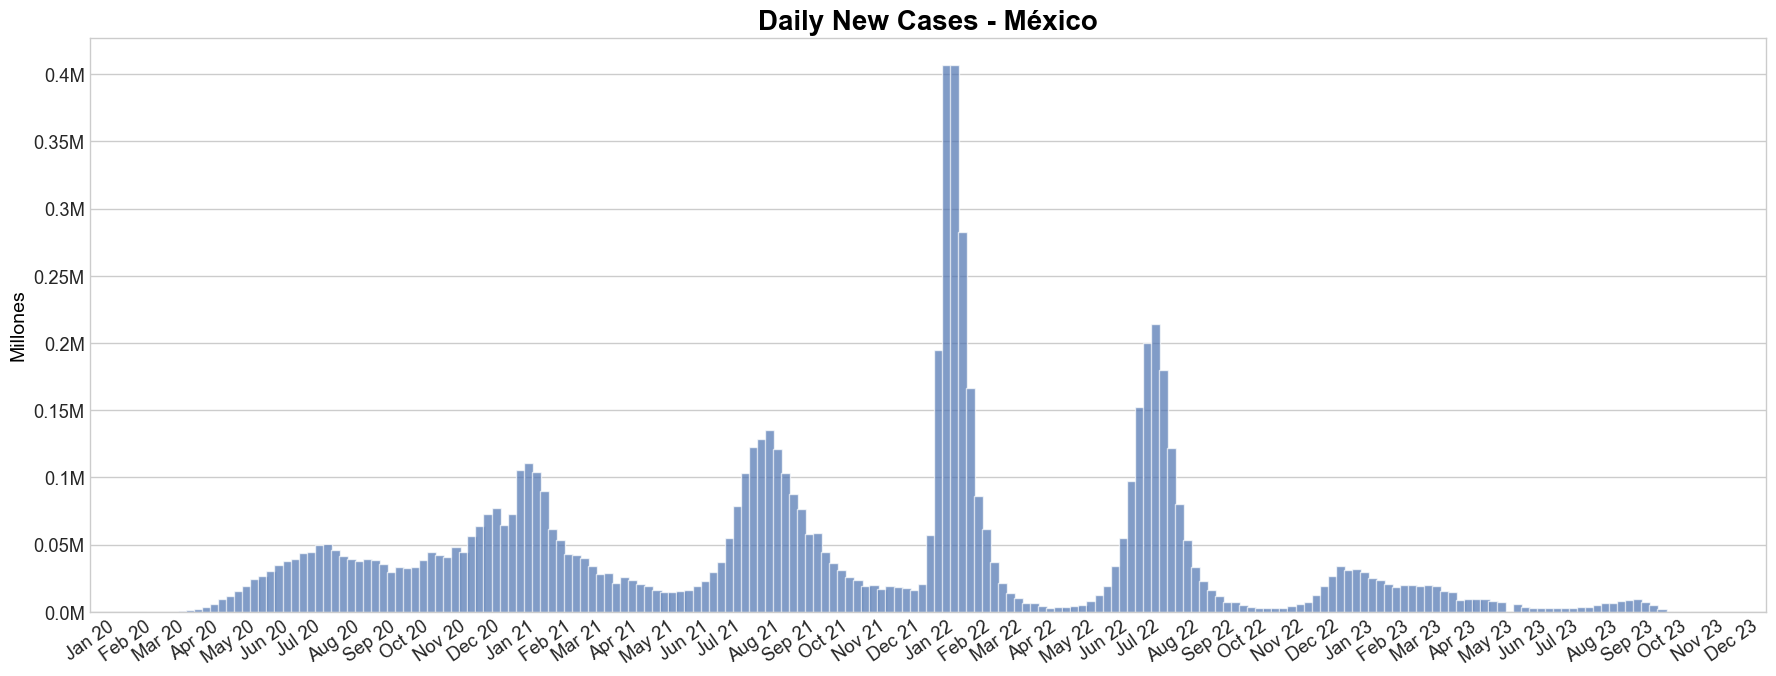

In [112]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
plt.figure(figsize=(18,7))
plt.bar(daily_cases_mexico['Date_reported'],daily_cases_mexico['Mexico_daily_cases'],alpha=0.7, width=8)
plt.title('Daily New Cases - México', fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': 'black'})
plt.ylabel('Millones', fontdict={'fontsize': 14, 'color': 'black'})

# Ajustar el límite inferior del eje x a enero de 2020
start_date = pd.to_datetime('2020-01-01')
end_date = daily_cases_peru['Date_reported'].max()

# Añadir formateo al eje Y con números enteros y "M" para millones
def millions_formatter(x, _):
    return f'{round(x/1e6, 2)}M'

# Formatear las fechas en el eje x y ajustar el intervalo
date_format = mdates.DateFormatter("%b %y")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Mostrar fechas cada 30 días
plt.gca().xaxis.set_major_formatter(date_format)

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.xlim(start_date, end_date) # Establecer los límites del eje x
plt.grid(axis='x')
plt.xticks(rotation=35)
plt.tight_layout()
plt.show()

**CONCLUSIONES**
* En **jun-2021**, se presentó un repunte de casos en México, porque apareció por primera vez la variante **Delta** del covid19.
* Notamos que en **ene-2022**, se presenta un elevado considerado de nuevos casos en México.
* Al analizar con los datos de las noticias, averiguamos que esto se debió a que México atravezó uno de los meses más letales de contagios y decesos, esto debido a una variante del Covid19 llamado **B117**. Se reporta que México registro una escacez de oxígeno, camas hospitalarias y personal médico. Registrandose **438166 nuevos casos**, solo en ese mes. 
* En **Jun-2022**, notamos un nuevo repunte en el aumento de nuevos casos, esto se debe a la variante del Covid 19, la **variante Delta**; sin embargo, el número de decesos se controlo debido al proyecto de vacunación.
* En **dic 2022** se registraron un pequeño aumento de casos nuevamente, pero esto tiene su explicación en la llegada de la variante **omicrón**.

### Colombia - Análisis Nuevos casos  

In [113]:
## Discriminamos el dataframe solo para analizar Colombia, consideramos solo casos diarios con valores mayores a cero
daily_cases_colombia = df_grouped_evaluate[['Date_reported','Colombia_daily_cases']]
daily_cases_colombia = daily_cases_colombia[daily_cases_colombia['Colombia_daily_cases']>0]
daily_cases_colombia

Country Date_reported  Colombia_daily_cases
9          2020-03-08                   1.0
10         2020-03-15                  15.0
11         2020-03-22                 180.0
12         2020-03-29                 527.0
13         2020-04-05                 544.0
..                ...                   ...
207        2023-12-24                 560.0
208        2023-12-31                 692.0
209        2024-01-07                 978.0
210        2024-01-14                2156.0
211        2024-01-21                2307.0

[201 rows x 2 columns]

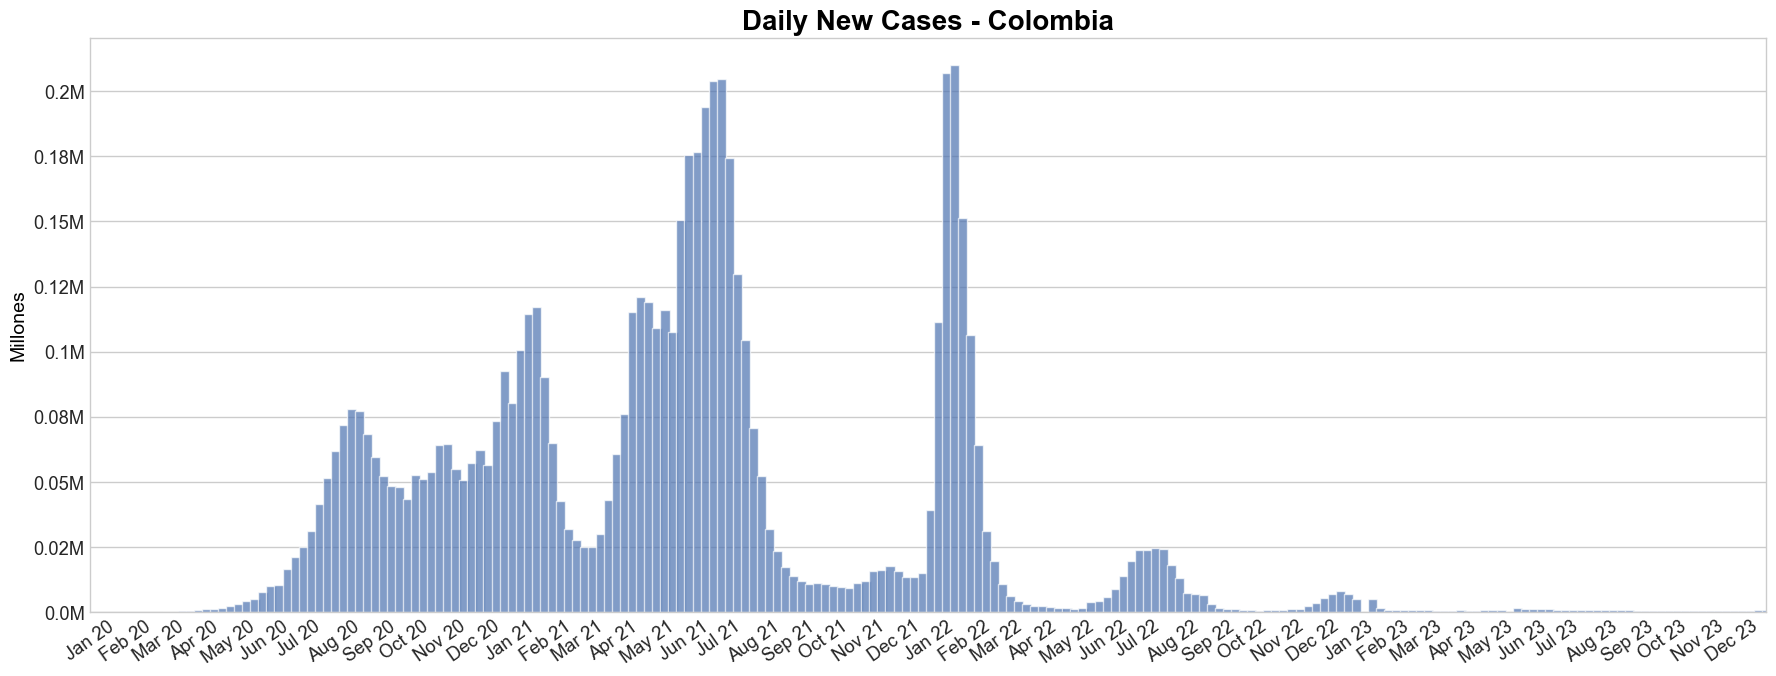

In [114]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
plt.figure(figsize=(18,7))
plt.bar(daily_cases_colombia['Date_reported'],daily_cases_colombia['Colombia_daily_cases'],alpha=0.7, width=8)
plt.title('Daily New Cases - Colombia', fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': 'black'})
plt.ylabel('Millones', fontdict={'fontsize': 14, 'color': 'black'})

# Ajustar el límite inferior del eje x a enero de 2020
start_date = pd.to_datetime('2020-01-01')
end_date = daily_cases_peru['Date_reported'].max()

# Añadir formateo al eje Y con números enteros y "M" para millones
def millions_formatter(x, _):
    return f'{round(x/1e6, 2)}M'

# Formatear las fechas en el eje x y ajustar el intervalo
date_format = mdates.DateFormatter("%b %y")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Mostrar fechas cada 30 días
plt.gca().xaxis.set_major_formatter(date_format)

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.xlim(start_date, end_date) # Establecer los límites del eje x
plt.grid(axis='x')
plt.xticks(rotation=35)
plt.tight_layout()
plt.show()

**CONCLUSIONES**
* En **nov-2020 y dic-2020**, colombia ya se encontraba en la segunda ola de contagios, debido a eso el repunte de nuevos casos.
* Notamos que entre **mar-2021 y abr-2022**, se dió inicio a la tercera ola de contagios en Colombia debido a la variante **Delta**. Se incrementaron los nuevos casos de covid 19. Aparecieron dos nuevas variantes, la **P1** y la **B117**, las cuales son las variantes **Brasileña** y **Británica**, respectivamente.
* En **ene-2022**, se siguió en la tercera ola, se dió un repunte de nuevos casos. Se dió a conocer la aparición de la variante **Omicrón**, generando nuevos casos de el rango de más de 30000 diarios.

## 3.3 ¿Cuál es la evolución del índice de letalidad del Covid-19 en México-Perú-Colombia, comparado con los países con los índices históricos más elevados?

In [115]:
# #Lethality Rate by Country
# def get_max_row(group, column):
#     return group.loc[group[column].idxmax()]

# result = df_covid_limpio_final.groupby(['Country', df_covid_limpio_final['Date_reported'].dt.to_period("M")]).apply(lambda group: get_max_row(group, 'lethality_rate'))
# result.reset_index(drop=True, inplace=True)
# top_4_paises = result.groupby('Country')['lethality_rate'].mean().nlargest(4).index
# result = result[result['Country'].isin(top_4_paises)]
# result_pais = df_covid_limpio_final[df_covid_limpio['Country'] == 'France'].groupby(df_covid_limpio_final['Date_reported'].dt.to_period("M")).apply(lambda group: get_max_row(group, 'lethality_rate'))
# result_pais.reset_index(drop=True, inplace=True)
# result_final = pd.concat([result, result_pais])
# result_final

In [116]:
## Verificamos nuestro dataframe en el cual realizaremos el análisis
df_covid_limpio_final

Date_reported Country_code      Country  New_cases  Cumulative_cases  \
0        2020-01-05           AF  Afghanistan          0                 0   
1        2020-01-12           AF  Afghanistan          0                 0   
2        2020-01-19           AF  Afghanistan          0                 0   
3        2020-01-26           AF  Afghanistan          0                 0   
4        2020-02-02           AF  Afghanistan          0                 0   
...             ...          ...          ...        ...               ...   
49388    2023-12-24           ZW     Zimbabwe         23            266048   
49389    2023-12-31           ZW     Zimbabwe         23            266071   
49390    2024-01-07           ZW     Zimbabwe         46            266117   
49391    2024-01-14           ZW     Zimbabwe         85            266202   
49392    2024-01-21           ZW     Zimbabwe         55            266257   

       New_deaths  Cumulative_deaths  lethality_rate  
0               0                  0        0.000000  
1               0                  0        0.000000  
2               0                  0        0.000000  
3               0                  0        0.000000  
4               0                  0        0.000000  
...           ...                ...             ...  
49388           1               5731        2.154123  
49389           0               5731        2.153936  
49390           3               5734        2.154691  
49391           3               5737        2.155130  
49392           0               5737        2.154685  

[49393 rows x 8 columns]

In [117]:
## Agrupamos los 5 paises con mayor lethality_rate promedio hasta estos momentos
top_5_lethality_rate = df_covid_limpio_final.groupby('Country').mean()['lethality_rate'].sort_values(ascending=False).head(5)
top_5_lethality_rate

Country
Yemen                   11.181456
Peru                     7.187033
Sudan                    7.082756
Mexico                   6.718033
Syrian Arab Republic     5.423008
Name: lethality_rate, dtype: float64

In [118]:
## Colocamos en una lista los 5 países con mayor promedio de lethality rate
countries_lethality_rate = list(top_5_lethality_rate.reset_index()['Country'])
countries_lethality_rate

['Yemen', 'Peru', 'Sudan', 'Mexico', 'Syrian Arab Republic']

In [119]:
## Adicionando el país Colombia que es el otro país que estamos analizando
countries_lethality_rate.append('Colombia')
countries_lethality_rate

['Yemen', 'Peru', 'Sudan', 'Mexico', 'Syrian Arab Republic', 'Colombia']

In [120]:
## Agrupamos solo estos países que deseamos analizar en un nuevo dataframe
df_lethality_rate = df_covid_limpio_final[['Date_reported','Country','lethality_rate']][df_covid_limpio_final['Country'].isin(countries_lethality_rate)]
df_lethality_rate

Date_reported   Country  lethality_rate
9115     2020-01-05  Colombia         0.00000
9116     2020-01-12  Colombia         0.00000
9117     2020-01-19  Colombia         0.00000
9118     2020-01-26  Colombia         0.00000
9119     2020-02-02  Colombia         0.00000
...             ...       ...             ...
48966    2023-12-24     Yemen        12.15625
48967    2023-12-31     Yemen        12.15625
48968    2024-01-07     Yemen        12.15625
48969    2024-01-14     Yemen        12.15625
48970    2024-01-21     Yemen        12.15625

[1272 rows x 3 columns]

In [121]:
## Hacemos uso de la función pivot, a fin de crear una tabla descriptiva de como va modificandose el lethality_rate por país
df_pivot = df_lethality_rate.pivot(index='Date_reported',columns='Country',values='lethality_rate').reset_index()
df_pivot

Country Date_reported  Colombia    Mexico      Peru     Sudan  \
0          2020-01-05  0.000000  0.000000  0.000000  0.000000   
1          2020-01-12  0.000000  0.000000  0.000000  0.000000   
2          2020-01-19  0.000000  0.000000  0.000000  0.000000   
3          2020-01-26  0.000000  0.000000  0.000000  0.000000   
4          2020-02-02  0.000000  0.000000  0.000000  0.000000   
..                ...       ...       ...       ...       ...   
207        2023-12-24  2.235160  4.348483  4.884235  7.885237   
208        2023-12-31  2.234918  4.348518  4.884198  7.885237   
209        2024-01-07  2.234575  4.348518  4.884198  7.885237   
210        2024-01-14  2.233821  4.348518  4.884198  7.885237   
211        2024-01-21  2.233015  4.348518  4.884198  7.885237   

Country  Syrian Arab Republic     Yemen  
0                    0.000000   0.00000  
1                    0.000000   0.00000  
2                    0.000000   0.00000  
3                    0.000000   0.00000  
4                    0.000000   0.00000  
..                        ...       ...  
207                  5.508246  12.15625  
208                  5.508246  12.15625  
209                  5.508246  12.15625  
210                  5.508246  12.15625  
211                  5.508246  12.15625  

[212 rows x 7 columns]

In [122]:
## Agrupamos por meses, y calculamos el mean del mes del lethality_rate por país
df_pivot_grouped = df_pivot.groupby(df_pivot['Date_reported'].dt.to_period('M')).mean().reset_index()

# Tratar 'Date_reported' como fecha en lugar de Periodo
df_pivot_grouped['Date_reported'] = df_pivot_grouped['Date_reported'].dt.to_timestamp()

df_pivot_grouped.head(12)

Country Date_reported  Colombia     Mexico       Peru      Sudan  \
0          2020-01-01  0.000000   0.000000   0.000000   0.000000   
1          2020-02-01  0.000000   0.000000   0.000000   0.000000   
2          2020-03-01  0.165975   0.353119   7.370259   7.293750   
3          2020-04-01  3.566695   8.311873  11.595273  10.705009   
4          2020-05-01  3.868397  12.156250  12.156250   5.331190   
5          2020-06-01  3.245852  12.156250  12.156250   6.134867   
6          2020-07-01  3.453683  12.156250  12.156250   6.295699   
7          2020-08-01  3.272520  12.156250  11.994602   6.397815   
8          2020-09-01  3.185754  12.116432  10.697629   6.171814   
9          2020-10-01  3.055406  11.556626   9.900507   6.104040   
10         2020-11-01  2.857365  10.852140   9.464509   7.191777   
11         2020-12-01  2.715568  10.087652   9.242618   6.340878   

Country  Syrian Arab Republic     Yemen  
0                    0.000000   0.00000  
1                    0.000000   0.00000  
2                    0.000000   0.00000  
3                    8.140566   0.00000  
4                    5.615298  12.15625  
5                    3.845098  12.15625  
6                    4.450361  12.15625  
7                    4.344726  12.15625  
8                    4.423653  12.15625  
9                    4.822961  12.15625  
10                   5.155521  12.15625  
11                   5.752244  12.15625

In [123]:
df_pivot_grouped.drop(columns='Date_reported').head(12)

Country  Colombia     Mexico       Peru      Sudan  Syrian Arab Republic  \
0        0.000000   0.000000   0.000000   0.000000              0.000000   
1        0.000000   0.000000   0.000000   0.000000              0.000000   
2        0.165975   0.353119   7.370259   7.293750              0.000000   
3        3.566695   8.311873  11.595273  10.705009              8.140566   
4        3.868397  12.156250  12.156250   5.331190              5.615298   
5        3.245852  12.156250  12.156250   6.134867              3.845098   
6        3.453683  12.156250  12.156250   6.295699              4.450361   
7        3.272520  12.156250  11.994602   6.397815              4.344726   
8        3.185754  12.116432  10.697629   6.171814              4.423653   
9        3.055406  11.556626   9.900507   6.104040              4.822961   
10       2.857365  10.852140   9.464509   7.191777              5.155521   
11       2.715568  10.087652   9.242618   6.340878              5.752244   

Country     Yemen  
0         0.00000  
1         0.00000  
2         0.00000  
3         0.00000  
4        12.15625  
5        12.15625  
6        12.15625  
7        12.15625  
8        12.15625  
9        12.15625  
10       12.15625  
11       12.15625

**PRIMERA GRÁFICA ANALIZADA POR CADA FECHA**

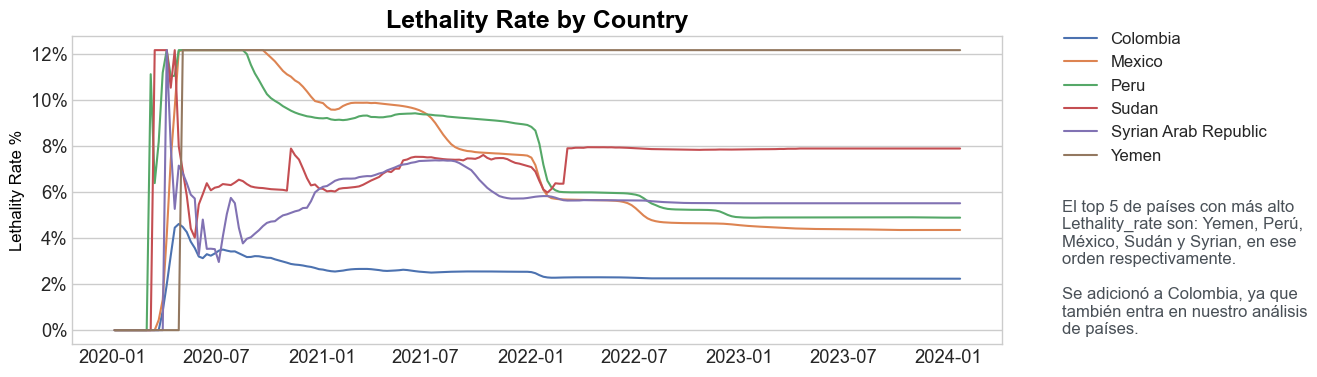

In [124]:
## Graficando como va modificandose el Lethality_rate en los paises seleccionados a lo largo del tiempo

from matplotlib.ticker import FuncFormatter
plt.figure(figsize=(12,4))
x= df_pivot['Date_reported']
y= df_pivot.drop(columns='Date_reported')
plt.plot(x,y)

# Añadir formateo al eje Y con % 
def percentage_formatter(x,_):
    return f'{int(x)}%'

plt.title('Lethality Rate by Country', fontdict={'fontsize': 18, 'fontweight': 'bold', 'color': 'black'})
plt.ylabel('Lethality Rate %', fontdict={'fontsize': 12, 'color': 'black'})

plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

# Añadir texto de conclusión
conclusion_text = '''
El top 5 de países con más alto 
Lethality_rate son: Yemen, Perú,
México, Sudán y Syrian, en ese 
orden respectivamente. 

Se adicionó a Colombia, ya que 
también entra en nuestro análisis
de países. 
'''

plt.figtext(0.95, 0.3, conclusion_text, fontsize=12, color='#495057', va='center', ha='left')
plt.grid(axis='x')
# plt.legend(y.columns, fontsize='small')
plt.legend(y.columns, fontsize='small',loc='center left', bbox_to_anchor=(1.05, 0.8))
plt.show()

**SEGUNDA GRÁFICA ANALIZADO MENSUAL**

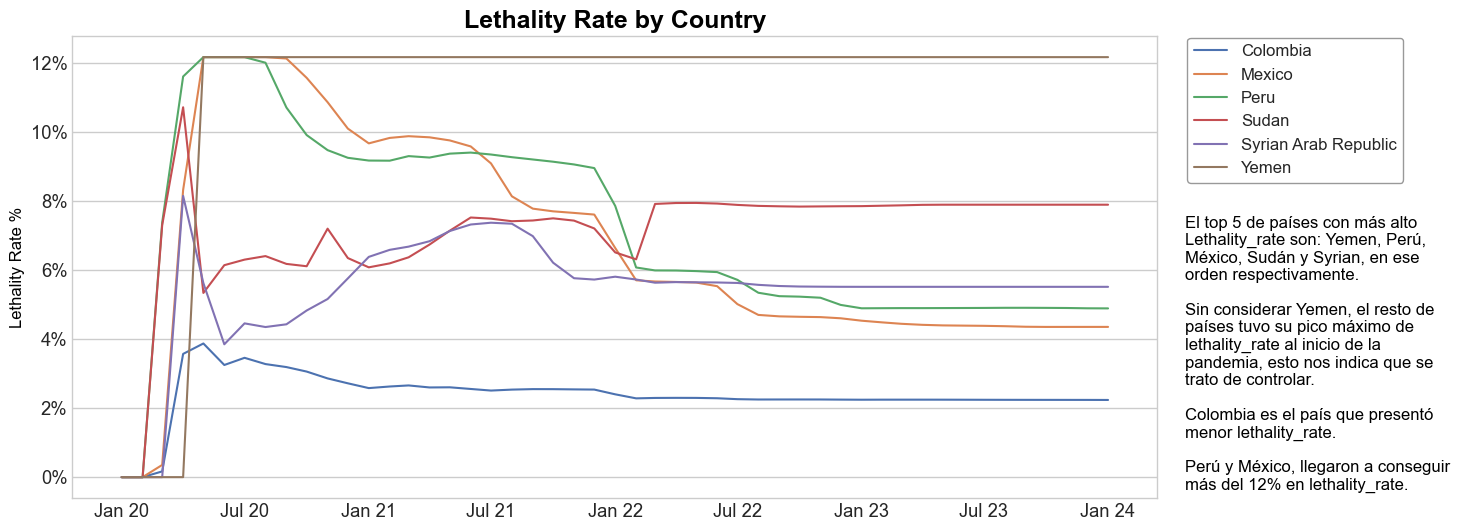

In [125]:
## Graficando como va modificandose el Lethality_rate en los paises seleccionados a lo largo del tiempo
## Considerando un análisis mensual promedio de los lethality_rate por país

from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
plt.figure(figsize=(14,6))
x= df_pivot_grouped['Date_reported']
y= df_pivot_grouped.drop(columns='Date_reported')
plt.plot(x,y)

# Añadir formateo al eje Y con % 
def percentage_formatter(x,_):
    return f'{int(x)}%'

plt.title('Lethality Rate by Country', fontdict={'fontsize': 18, 'fontweight': 'bold', 'color': 'black'})
plt.ylabel('Lethality Rate %', fontdict={'fontsize': 12, 'color': 'black'})

plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

# Formatear las fechas en el eje x y ajustar el intervalo
date_format = mdates.DateFormatter("%b %y")
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Mostrar fechas cada 30 días
plt.gca().xaxis.set_major_formatter(date_format)

# Añadir texto de conclusión
conclusion_text = '''
El top 5 de países con más alto 
Lethality_rate son: Yemen, Perú,
México, Sudán y Syrian, en ese 
orden respectivamente.

Sin considerar Yemen, el resto de
países tuvo su pico máximo de 
lethality_rate al inicio de la 
pandemia, esto nos indica que se
trato de controlar.

Colombia es el país que presentó 
menor lethality_rate.

Perú y México, llegaron a conseguir
más del 12% en lethality_rate.
'''

plt.figtext(0.92, 0.35, conclusion_text, fontsize=12, color='black', va='center', ha='left')
plt.grid(axis='x')
# plt.legend(y.columns, fontsize='small')
plt.legend(y.columns, fontsize='small',loc='center left', bbox_to_anchor=(1.02, 0.84), frameon=True, edgecolor='gray')
plt.show()

## 3.4 Desde una perspectiva demográfica, ¿cuáles son las características que tuvieron un mayor impacto en el índice de letalidad en México-Perú-Colombia? 

In [126]:
## Verificamos nuestro dataframe del covid con el cual trabajaremos para esta pregunta
df_covid_limpio_final

Date_reported Country_code      Country  New_cases  Cumulative_cases  \
0        2020-01-05           AF  Afghanistan          0                 0   
1        2020-01-12           AF  Afghanistan          0                 0   
2        2020-01-19           AF  Afghanistan          0                 0   
3        2020-01-26           AF  Afghanistan          0                 0   
4        2020-02-02           AF  Afghanistan          0                 0   
...             ...          ...          ...        ...               ...   
49388    2023-12-24           ZW     Zimbabwe         23            266048   
49389    2023-12-31           ZW     Zimbabwe         23            266071   
49390    2024-01-07           ZW     Zimbabwe         46            266117   
49391    2024-01-14           ZW     Zimbabwe         85            266202   
49392    2024-01-21           ZW     Zimbabwe         55            266257   

       New_deaths  Cumulative_deaths  lethality_rate  
0               0                  0        0.000000  
1               0                  0        0.000000  
2               0                  0        0.000000  
3               0                  0        0.000000  
4               0                  0        0.000000  
...           ...                ...             ...  
49388           1               5731        2.154123  
49389           0               5731        2.153936  
49390           3               5734        2.154691  
49391           3               5737        2.155130  
49392           0               5737        2.154685  

[49393 rows x 8 columns]

In [127]:
## Verificamos nuestro dataframe de population con el cual trabajaremos para esta pregunta
df_population_limpio

Country_code  Total_Population  Male_Population  Female_Population  \
0             BI        11874838.0        5894278.0          5980560.0   
1             KM          790986.0         397126.0           393860.0   
2             DJ         1073994.0         533626.0           540367.0   
3             ER         3498818.0        1724860.0          1773958.0   
4             ET       114120594.0       57375433.0         56745161.0   
..           ...               ...              ...                ...   
230           WS          211905.0         108147.0           103759.0   
231           TK            1752.0            879.0              874.0   
232           TO          104951.0          51994.0            52956.0   
233           TV           10956.0           5654.0             5301.0   
234           WF           11714.0           5648.0             6066.0   

     Population_Density  Life_Expectancy  
0               457.605           62.351  
1               425.033           64.068  
2                46.333           63.085  
3                28.881           67.300  
4               114.121           65.838  
..                  ...              ...  
230              74.878           72.157  
231             146.000           75.076  
232             161.462           70.871  
233             365.200           64.278  
234              83.671           79.617  

[235 rows x 6 columns]

* Observamos que ambos dataframe comparten una columna en común, esta columna es el **'Country_code'**.
* Esta columna en común nos ayudará a realizar un análisis en conjunto, realizaremos un inner joint.

In [128]:
# #Características demográficas más relevantes
# df_filtrado = df_covid_limpio[df_covid_limpio['Date_reported'] <= '2020-12-31']
# df_agrupado = df_filtrado.groupby(['Country_code', 'Country'], as_index=False)['lethality_rate'].mean()
# df_final = pd.merge(df_agrupado, df_population_limpio, on='Country_code', how='inner')
# columnas_seleccionadas = ['lethality_rate', 'Total_Population', 'Male_Population', 'Female_Population', 'Population_Density', 'Life_Expectancy']
# df_final = df_final[columnas_seleccionadas]

# X = df_final.drop(['lethality_rate'], axis=1)
# y = df_final['lethality_rate']
# model = RandomForestRegressor()
# model.fit(X, y)
# feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
# feature_importances

**FILTRANDO DATAFRAME COVID19**

* Al analizar nuestros datos, observamos que las variables escogidas de nuestro dataframe Population, tienen un corte al 31/07/2020. En consecuencia, decidimos filtrar hasta esa fecha, con la finalidad de tener datos más congruentes.

In [129]:
df_filtrado = df_covid_limpio_final[df_covid_limpio_final['Date_reported'] <= '2020-07-31']
df_filtrado = df_covid_limpio_final.groupby(['Country_code','Country']).mean().reset_index()[['Country_code','Country','lethality_rate']]
df_filtrado

Country_code               Country  lethality_rate
0             AD               Andorra        1.158064
1             AE  United Arab Emirates        0.301439
2             AF           Afghanistan        3.666923
3             AG   Antigua and Barbuda        2.529728
4             AI              Anguilla        0.170310
..           ...                   ...             ...
228           YE                 Yemen       11.181456
229           YT               Mayotte        0.660873
230           ZA          South Africa        2.528656
231           ZM                Zambia        1.499067
232           ZW              Zimbabwe        2.977241

[233 rows x 3 columns]

**REALIZANDO EL MERGE ENTRE LOS DOS DATAFRAMES**

In [130]:
df_final = pd.merge(df_filtrado, df_population_limpio, on='Country_code', how='inner')
df_final

Country_code               Country  lethality_rate  Total_Population  \
0             AD               Andorra        1.158064           76343.0   
1             AE  United Arab Emirates        0.301439         9211657.0   
2             AF           Afghanistan        3.666923        37769499.0   
3             AG   Antigua and Barbuda        2.529728           92117.0   
4             AI              Anguilla        0.170310           15380.0   
..           ...                   ...             ...               ...   
226           YE                 Yemen       11.181456        31546691.0   
227           YT               Mayotte        0.660873          294489.0   
228           ZA          South Africa        2.528656        58087055.0   
229           ZM                Zambia        1.499067        18380477.0   
230           ZW              Zimbabwe        2.977241        15354608.0   

     Male_Population  Female_Population  Population_Density  Life_Expectancy  
0            38842.0            37502.0             162.432           83.004  
1          6443813.0          2767844.0             129.698           79.726  
2         19090409.0         18679089.0              58.170           63.565  
3            43961.0            48156.0             209.356           78.691  
4             7551.0             7828.0             174.767           76.882  
..               ...                ...                 ...              ...  
226       15953578.0         15593113.0              59.751           65.092  
227         139735.0           154754.0             785.304           77.153  
228       28207948.0         29879107.0              47.581           66.175  
229        9066397.0          9314079.0              24.725           62.793  
230        7231989.0          8122618.0              39.691           61.292  

[231 rows x 8 columns]

In [131]:
## Validando presencia de nulos en el nuevo dataframe
df_final.isnull().sum()

Country_code          0
Country               0
lethality_rate        0
Total_Population      0
Male_Population       0
Female_Population     0
Population_Density    0
Life_Expectancy       0
dtype: int64

In [132]:
## Validando los tipos de datos que se tiene en el nuevo dataframe
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country_code        231 non-null    object 
 1   Country             231 non-null    object 
 2   lethality_rate      231 non-null    float64
 3   Total_Population    231 non-null    float64
 4   Male_Population     231 non-null    float64
 5   Female_Population   231 non-null    float64
 6   Population_Density  231 non-null    float64
 7   Life_Expectancy     231 non-null    float64
dtypes: float64(6), object(2)
memory usage: 16.2+ KB


**IMPORTANCIA DE CARACTERÍSTICAS DEMOGRÁFICAS**

In [133]:
selected_columns = ['lethality_rate', 'Total_Population', 'Male_Population', 'Female_Population', 'Population_Density', 'Life_Expectancy']
df_final = df_final[selected_columns]
df_final

lethality_rate  Total_Population  Male_Population  Female_Population  \
0          1.158064           76343.0          38842.0            37502.0   
1          0.301439         9211657.0        6443813.0          2767844.0   
2          3.666923        37769499.0       19090409.0         18679089.0   
3          2.529728           92117.0          43961.0            48156.0   
4          0.170310           15380.0           7551.0             7828.0   
..              ...               ...              ...                ...   
226       11.181456        31546691.0       15953578.0         15593113.0   
227        0.660873          294489.0         139735.0           154754.0   
228        2.528656        58087055.0       28207948.0         29879107.0   
229        1.499067        18380477.0        9066397.0          9314079.0   
230        2.977241        15354608.0        7231989.0          8122618.0   

     Population_Density  Life_Expectancy  
0               162.432           83.004  
1               129.698           79.726  
2                58.170           63.565  
3               209.356           78.691  
4               174.767           76.882  
..                  ...              ...  
226              59.751           65.092  
227             785.304           77.153  
228              47.581           66.175  
229              24.725           62.793  
230              39.691           61.292  

[231 rows x 6 columns]

In [134]:
## Utilizando random forest para conseguir la importancia de nuestras variables
from sklearn.ensemble import RandomForestRegressor
X = df_final.drop(columns = 'lethality_rate')
y = df_final['lethality_rate']
model = RandomForestRegressor(random_state=1)
model.fit(X, y)
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False).reset_index()
feature_importances.columns = ['Variable', '%']
feature_importances.style.background_gradient()

* Observamos que las características más importantes y que afectan directamente a la variable **'lethality_rate'**, son en primer lugar la **'Population_Density'**, seguido de la **'Life_Expectancy'**

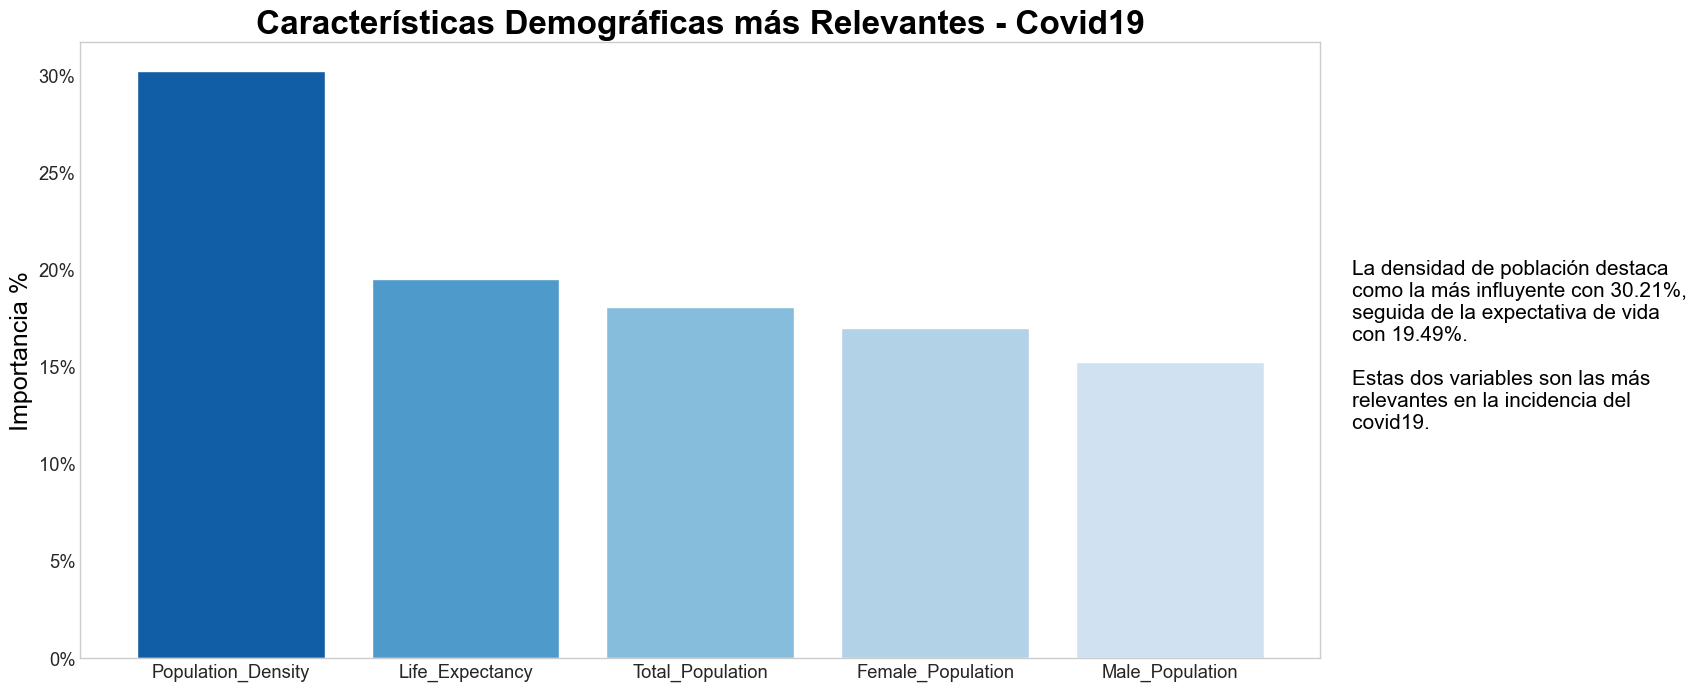

In [135]:
## Realizando el gráfico de importancia de las variables

plt.figure(figsize=(16,8))
data = [210, 150, 110, 80, 50]
colors = plt.cm.Blues(data)
plt.bar(feature_importances['Variable'],feature_importances['%'],color= colors)

# Añadir formateo al eje Y con % 
def percentage_formatter(x,_):
    return f'{round(x*100)}%'

plt.title('Características Demográficas más Relevantes - Covid19', fontdict={'fontsize': 24, 'fontweight': 'bold', 'color': 'black'})
plt.ylabel('Importancia %', fontdict={'fontsize': 18, 'color': 'black'})

# Añadir texto de conclusión
conclusion_text = '''
La densidad de población destaca
como la más influyente con 30.21%,
seguida de la expectativa de vida
con 19.49%. 

Estas dos variables son las más
relevantes en la incidencia del
covid19. 
'''

plt.figtext(0.92, 0.5, conclusion_text, fontsize=15, color='black', va='center', ha='left')

plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
plt.grid(False)
plt.show()

## 3.5 ¿Relación entre el aumento de los nuevos casos diarios y los nuevos decesos diarios para los países México-Perú-Colombia?

In [136]:
## Verificando el dataframe que analizaremos para responder esta pregunta
df_covid_limpio_final

Date_reported Country_code      Country  New_cases  Cumulative_cases  \
0        2020-01-05           AF  Afghanistan          0                 0   
1        2020-01-12           AF  Afghanistan          0                 0   
2        2020-01-19           AF  Afghanistan          0                 0   
3        2020-01-26           AF  Afghanistan          0                 0   
4        2020-02-02           AF  Afghanistan          0                 0   
...             ...          ...          ...        ...               ...   
49388    2023-12-24           ZW     Zimbabwe         23            266048   
49389    2023-12-31           ZW     Zimbabwe         23            266071   
49390    2024-01-07           ZW     Zimbabwe         46            266117   
49391    2024-01-14           ZW     Zimbabwe         85            266202   
49392    2024-01-21           ZW     Zimbabwe         55            266257   

       New_deaths  Cumulative_deaths  lethality_rate  
0               0                  0        0.000000  
1               0                  0        0.000000  
2               0                  0        0.000000  
3               0                  0        0.000000  
4               0                  0        0.000000  
...           ...                ...             ...  
49388           1               5731        2.154123  
49389           0               5731        2.153936  
49390           3               5734        2.154691  
49391           3               5737        2.155130  
49392           0               5737        2.154685  

[49393 rows x 8 columns]

In [137]:
## Creando un dataframe donde coloquemos solo ciertas variables
df_new = df_covid_limpio_final[['Date_reported','Country','Cumulative_cases','Cumulative_deaths']]
df_new

Date_reported      Country  Cumulative_cases  Cumulative_deaths
0        2020-01-05  Afghanistan                 0                  0
1        2020-01-12  Afghanistan                 0                  0
2        2020-01-19  Afghanistan                 0                  0
3        2020-01-26  Afghanistan                 0                  0
4        2020-02-02  Afghanistan                 0                  0
...             ...          ...               ...                ...
49388    2023-12-24     Zimbabwe            266048               5731
49389    2023-12-31     Zimbabwe            266071               5731
49390    2024-01-07     Zimbabwe            266117               5734
49391    2024-01-14     Zimbabwe            266202               5737
49392    2024-01-21     Zimbabwe            266257               5737

[49393 rows x 4 columns]

In [138]:
## Seleccionamos solo información para los países latinoamericanos que venimos analizando México-Perú-Colombia
df_new_mod = df_new[(df_new['Country']=='Mexico')|(df_new['Country']=='Peru')|(df_new['Country']=='Colombia') ]
df_new_mod

Date_reported   Country  Cumulative_cases  Cumulative_deaths
9115     2020-01-05  Colombia                 0                  0
9116     2020-01-12  Colombia                 0                  0
9117     2020-01-19  Colombia                 0                  0
9118     2020-01-26  Colombia                 0                  0
9119     2020-02-02  Colombia                 0                  0
...             ...       ...               ...                ...
34550    2023-12-24      Peru           4536698             221583
34551    2023-12-31      Peru           4536733             221583
34552    2024-01-07      Peru           4536733             221583
34553    2024-01-14      Peru           4536733             221583
34554    2024-01-21      Peru           4536733             221583

[636 rows x 4 columns]

In [139]:
## Utilizamos la función pivot a fin de acomodar nuestro dataframe, los paises en columnas y los casos acumulativos en cada fila
df_new_pivot_cases = df_new_mod.pivot(index='Date_reported', columns='Country', values='Cumulative_cases').reset_index()
df_new_pivot_cases

Country Date_reported  Colombia   Mexico     Peru
0          2020-01-05         0        0        0
1          2020-01-12         0        0        0
2          2020-01-19         0        0        0
3          2020-01-26         0        0        0
4          2020-02-02         0        0        0
..                ...       ...      ...      ...
207        2023-12-24   6385539  7702802  4536698
208        2023-12-31   6386231  7702809  4536733
209        2024-01-07   6387209  7702809  4536733
210        2024-01-14   6389365  7702809  4536733
211        2024-01-21   6391672  7702809  4536733

[212 rows x 4 columns]

In [140]:
## Se genera nuevas columnas que representan los casos diarios para los 3 países
df_new_pivot_cases = df_new_pivot_cases.copy()
df_new_pivot_cases['daily_cases_colombia'] = df_new_pivot_cases['Colombia'].diff().fillna(0)
df_new_pivot_cases['daily_cases_mexico'] = df_new_pivot_cases['Mexico'].diff().fillna(0)
df_new_pivot_cases['daily_cases_peru'] = df_new_pivot_cases['Peru'].diff().fillna(0)
df_new_pivot_cases

Country Date_reported  Colombia   Mexico     Peru  daily_cases_colombia  \
0          2020-01-05         0        0        0                   0.0   
1          2020-01-12         0        0        0                   0.0   
2          2020-01-19         0        0        0                   0.0   
3          2020-01-26         0        0        0                   0.0   
4          2020-02-02         0        0        0                   0.0   
..                ...       ...      ...      ...                   ...   
207        2023-12-24   6385539  7702802  4536698                 560.0   
208        2023-12-31   6386231  7702809  4536733                 692.0   
209        2024-01-07   6387209  7702809  4536733                 978.0   
210        2024-01-14   6389365  7702809  4536733                2156.0   
211        2024-01-21   6391672  7702809  4536733                2307.0   

Country  daily_cases_mexico  daily_cases_peru  
0                       0.0               0.0  
1                       0.0               0.0  
2                       0.0               0.0  
3                       0.0               0.0  
4                       0.0               0.0  
..                      ...               ...  
207                    64.0            1333.0  
208                     7.0              35.0  
209                     0.0               0.0  
210                     0.0               0.0  
211                     0.0               0.0  

[212 rows x 7 columns]

In [141]:
## Utilizamos la función pivot a fin de acomodar nuestro dataframe, los paises en columnas y los decesos acumulativos en cada fila
df_new_pivot_deaths = df_new_mod.pivot(index='Date_reported', columns='Country', values='Cumulative_deaths').reset_index()
df_new_pivot_deaths

Country Date_reported  Colombia  Mexico    Peru
0          2020-01-05         0       0       0
1          2020-01-12         0       0       0
2          2020-01-19         0       0       0
3          2020-01-26         0       0       0
4          2020-02-02         0       0       0
..                ...       ...     ...     ...
207        2023-12-24    142727  334955  221583
208        2023-12-31    142727  334958  221583
209        2024-01-07    142727  334958  221583
210        2024-01-14    142727  334958  221583
211        2024-01-21    142727  334958  221583

[212 rows x 4 columns]

In [142]:
## Se genera nuevas columnas que representan los decesos diarios para los 3 países
df_new_pivot_deaths = df_new_pivot_deaths.copy()
df_new_pivot_deaths['daily_deaths_colombia'] = df_new_pivot_deaths['Colombia'].diff().fillna(0)
df_new_pivot_deaths['daily_deaths_mexico'] = df_new_pivot_deaths['Mexico'].diff().fillna(0)
df_new_pivot_deaths['daily_deaths_peru'] = df_new_pivot_deaths['Peru'].diff().fillna(0)
df_new_pivot_deaths

Country Date_reported  Colombia  Mexico    Peru  daily_deaths_colombia  \
0          2020-01-05         0       0       0                    0.0   
1          2020-01-12         0       0       0                    0.0   
2          2020-01-19         0       0       0                    0.0   
3          2020-01-26         0       0       0                    0.0   
4          2020-02-02         0       0       0                    0.0   
..                ...       ...     ...     ...                    ...   
207        2023-12-24    142727  334955  221583                    0.0   
208        2023-12-31    142727  334958  221583                    0.0   
209        2024-01-07    142727  334958  221583                    0.0   
210        2024-01-14    142727  334958  221583                    0.0   
211        2024-01-21    142727  334958  221583                    0.0   

Country  daily_deaths_mexico  daily_deaths_peru  
0                        0.0                0.0  
1                        0.0                0.0  
2                        0.0                0.0  
3                        0.0                0.0  
4                        0.0                0.0  
..                       ...                ...  
207                      6.0                8.0  
208                      3.0                0.0  
209                      0.0                0.0  
210                      0.0                0.0  
211                      0.0                0.0  

[212 rows x 7 columns]

**COLOMBIA - RELACIÓN NUEVOS CASOS Y DECESOS DIARIOS**

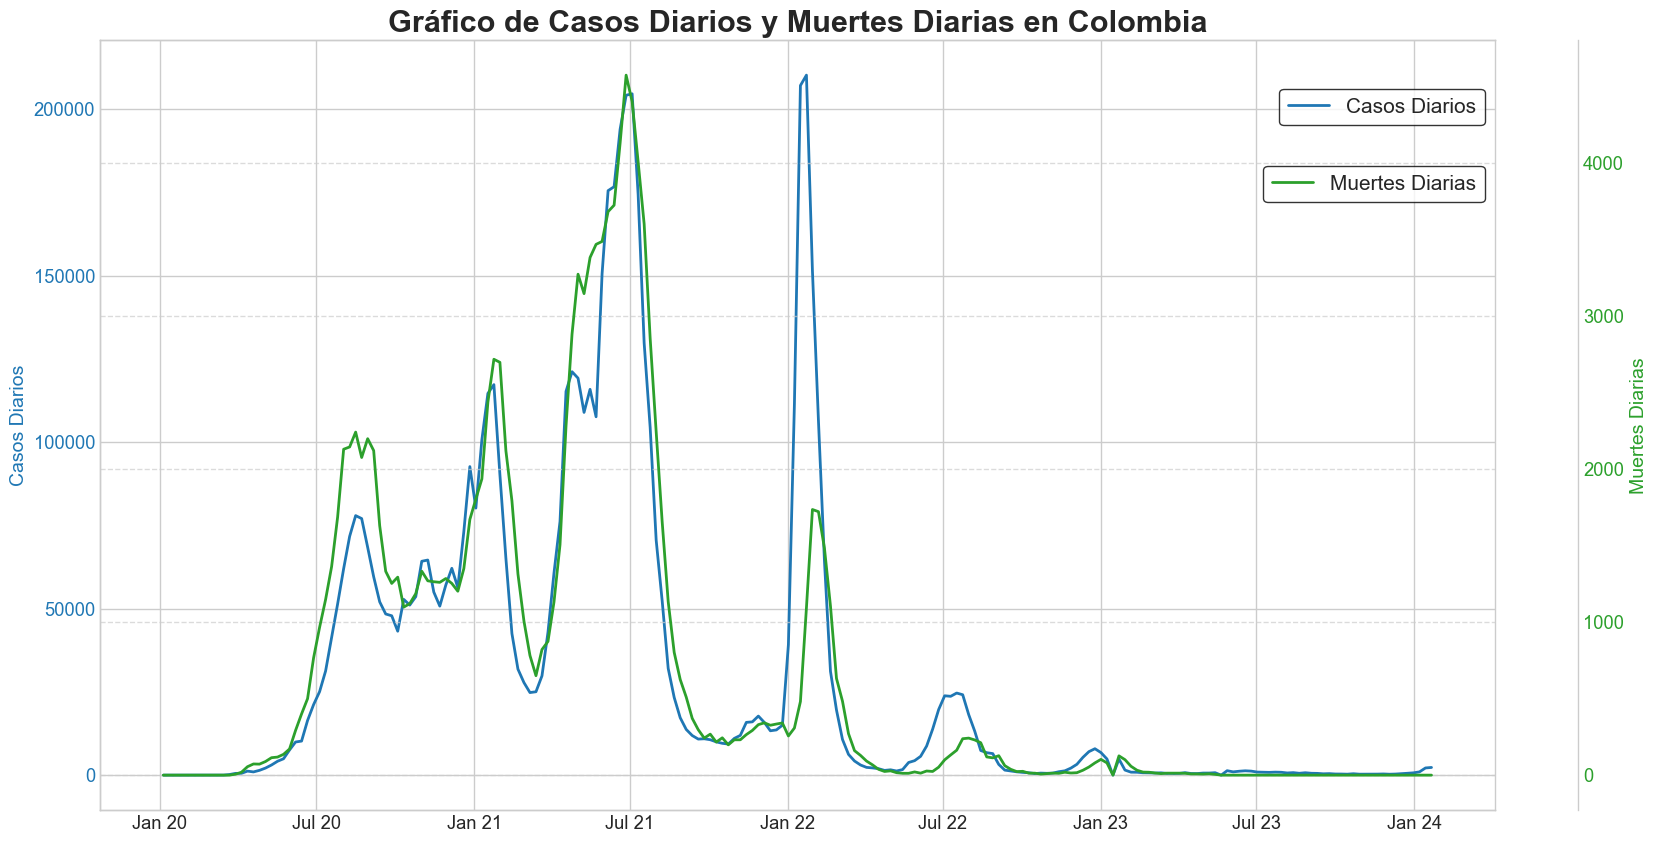

In [143]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter

# Supongamos que tienes un DataFrame llamado df_colombia_mod

fig, ax2 = plt.subplots(figsize=(18, 10))

# Crear un eje secundario para 'Daily_cases' en el eje derecho
color = 'tab:blue'
ax2.set_ylabel('Casos Diarios', color=color, fontsize=14)
ax2.plot(df_new_pivot_cases['Date_reported'], df_new_pivot_cases['daily_cases_colombia'], color=color, label='Casos Diarios', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

# Crear otro eje secundario para 'Daily_deaths' en el eje derecho
ax3 = ax2.twinx()
ax3.spines['right'].set_position(('outward', 60))
color = 'tab:green'
ax3.set_ylabel('Muertes Diarias', color=color, fontsize=14)
ax3.plot(df_new_pivot_deaths['Date_reported'], df_new_pivot_deaths['daily_deaths_colombia'], color=color, label='Muertes Diarias', linewidth=2)
ax3.tick_params(axis='y', labelcolor=color)

# Añadir leyendas con borde solo para 'Casos Diarios' y 'Muertes Diarias'
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax2.legend(lines2, labels2, loc='upper right', fontsize=15, bbox_to_anchor=(1.0, 0.95), frameon=True, edgecolor='black')
ax3.legend(lines3, labels3, loc='upper right', fontsize=15, bbox_to_anchor=(1.0, 0.85), frameon=True, edgecolor='black')

# Formatear las fechas en el eje x y ajustar el intervalo
date_format = mdates.DateFormatter("%b %y")
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Mostrar fechas cada 30 días
plt.gca().xaxis.set_major_formatter(date_format)

plt.title('Gráfico de Casos Diarios y Muertes Diarias en Colombia', fontsize=22, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

**CONCLUSIONES**

* Notamos que durante casi año y medio de pandemia en Colombia, a medida que aumentaban los casos nuevos de covid, aumentaban también los casos de decesos a causa de esta enfermedad.
* Desde **ago-2021**, se ve un descenso considerable en nuevos casos registrados como nuevos decesos registrados, esto se debió a que los esquemas de vacunación en colombia fueron incrementandose, consiguiendo en **0ct-2021**, al 85% de la población vacunada con la primera dosis. En este periodo hasta inicios del **año 2022**, se fue controlando la pandemia del covid 19.
* Desde **ene-2022**, se observa un incremento considerable en los nuevos casos de covid 19 y los decesos en la población. Esto se debió a la presencia de la variante **Omicrón**, que afecto mucho al país. Considerar que muchas medidas adoptadas ya se habian relajado. Poco a poco se fue controlando nuevamente hasta volver a valores minimos de nuevos casos y decesos.
* En **Jun-2022**, se presento un nuevo incremento de nuevos casos, pero los decesos no incrementaron a ese ritmo, consideremos que las vacunaciones en este punto ya estaban dando resultados. Se mantuvo controlado la pandemia desde este punto.

**MÉXICO - RELACIÓN NUEVOS CASOS Y DECESOS DIARIOS**

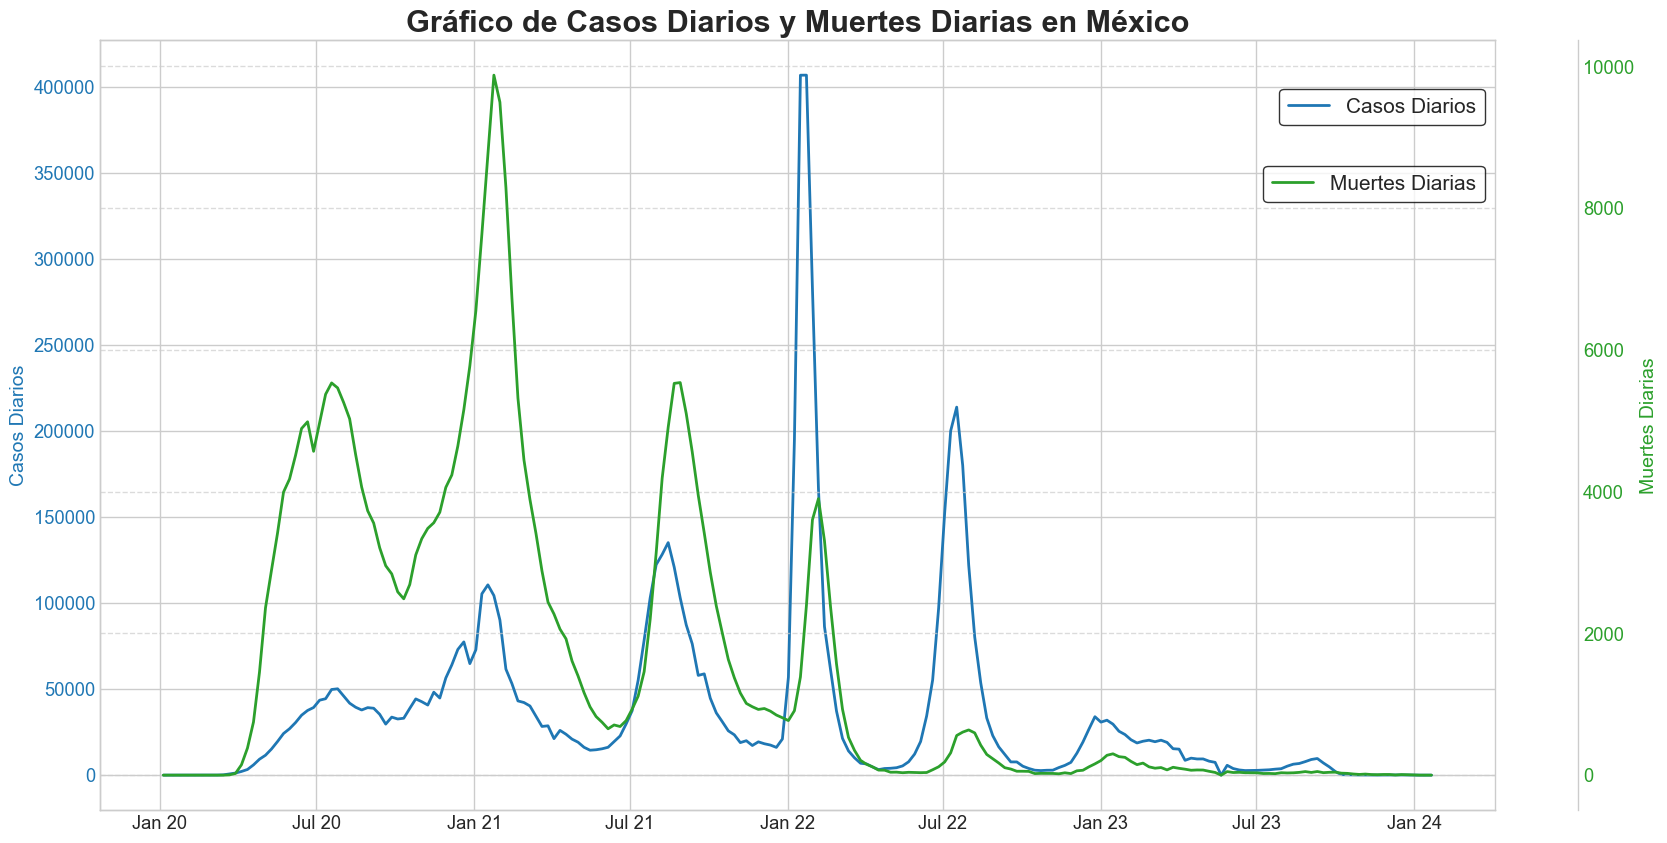

In [144]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter

# Supongamos que tienes un DataFrame llamado df_colombia_mod

fig, ax2 = plt.subplots(figsize=(18, 10))

# Crear un eje secundario para 'Daily_cases' en el eje derecho
color = 'tab:blue'
ax2.set_ylabel('Casos Diarios', color=color, fontsize=14)
ax2.plot(df_new_pivot_cases['Date_reported'], df_new_pivot_cases['daily_cases_mexico'], color=color, label='Casos Diarios', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

# Crear otro eje secundario para 'Daily_deaths' en el eje derecho
ax3 = ax2.twinx()
ax3.spines['right'].set_position(('outward', 60))
color = 'tab:green'
ax3.set_ylabel('Muertes Diarias', color=color, fontsize=14)
ax3.plot(df_new_pivot_deaths['Date_reported'], df_new_pivot_deaths['daily_deaths_mexico'], color=color, label='Muertes Diarias', linewidth=2)
ax3.tick_params(axis='y', labelcolor=color)

# Añadir leyendas con borde solo para 'Casos Diarios' y 'Muertes Diarias'
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax2.legend(lines2, labels2, loc='upper right', fontsize=15, bbox_to_anchor=(1.0, 0.95), frameon=True, edgecolor='black')
ax3.legend(lines3, labels3, loc='upper right', fontsize=15, bbox_to_anchor=(1.0, 0.85), frameon=True, edgecolor='black')

# Formatear las fechas en el eje x y ajustar el intervalo
date_format = mdates.DateFormatter("%b %y")
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Mostrar fechas cada 30 días
plt.gca().xaxis.set_major_formatter(date_format)

plt.title('Gráfico de Casos Diarios y Muertes Diarias en México', fontsize=22, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

**CONCLUSIONES**

* En méxico sucedió algo sorprendente, durante el primer año y medio de pandemia Covid 19, México tuvo un rate de incremento de decesos mucho mayor, por más que el rate de nuevos casos por Covid19 no incrementará de la misma manera.
* El pico más alto de decesos ocurridos en méxico se dieron a **finales del 2020 e inicios del 2021**. En estas fechas se empezaron a adoptar medidas sanitarias como la vacunación. Esto ayudó a bajar considerablemente muchos casos de fallecidos en el país.
* Desde **Jul-2021**, se empezó a notar un nuevo aumento en el caso de fallecidos, asicomo empezó a aumentar el numero de casos nuevos de covid 19, todo esto debido a nuevas variantes que aparecieron, como la variante **Delta**. Sin embargo, esto se pudo controlar en los meses posteriores.
* En **ene-2022**, un nuevo repunte de casos de fallecidos se presento, mucho menor que los anteriores. Pero esto debido a que los nuevos casos aumentaron en cantidades enormes, también ocasionada nuevamente por la variable **Delta**.
* Después de este periodo, empezaron a bajar tanto los nuevos casos de Covid19 como los decesos, se empezó a notar los resultados de las medidas sanitarias adoptadas en méxico.

**PERÚ - RELACIÓN NUEVOS CASOS Y DECESOS DIARIOS**

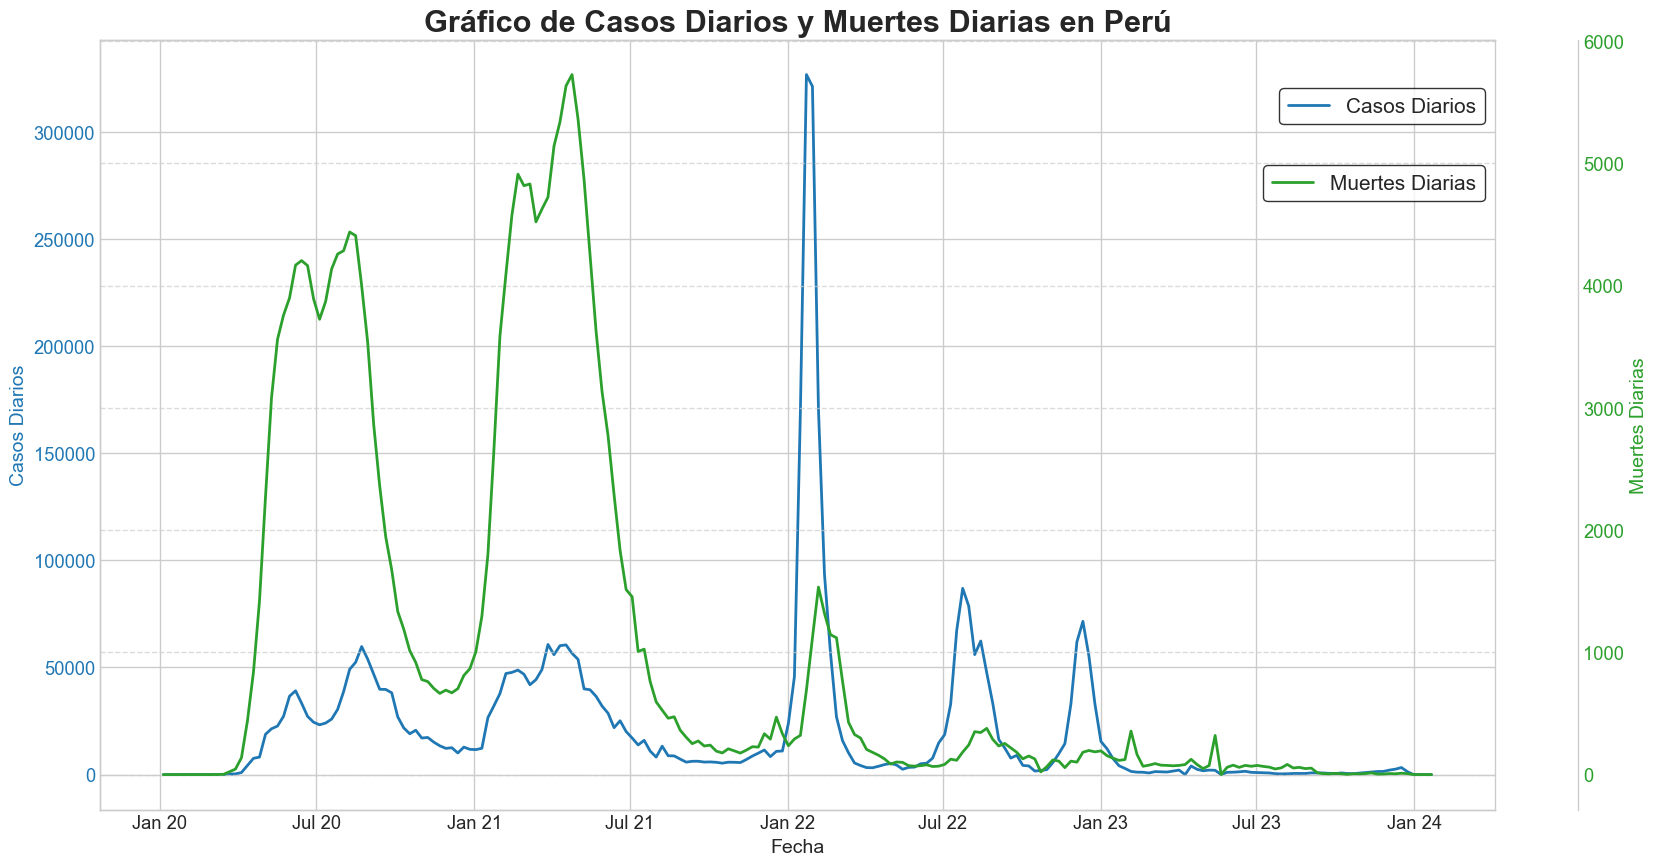

In [145]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter

# Supongamos que tienes un DataFrame llamado df_colombia_mod

fig, ax2 = plt.subplots(figsize=(18, 10))

# Crear un eje secundario para 'Daily_cases' en el eje derecho
color = 'tab:blue'
ax2.set_xlabel('Fecha', fontsize=14)
ax2.set_ylabel('Casos Diarios', color=color, fontsize=14)
ax2.plot(df_new_pivot_cases['Date_reported'], df_new_pivot_cases['daily_cases_peru'], color=color, label='Casos Diarios', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

# Crear otro eje secundario para 'Daily_deaths' en el eje derecho
ax3 = ax2.twinx()
ax3.spines['right'].set_position(('outward', 60))
color = 'tab:green'
ax3.set_ylabel('Muertes Diarias', color=color, fontsize=14)
ax3.plot(df_new_pivot_deaths['Date_reported'], df_new_pivot_deaths['daily_deaths_peru'], color=color, label='Muertes Diarias', linewidth=2)
ax3.tick_params(axis='y', labelcolor=color)

# Añadir leyendas con borde solo para 'Casos Diarios' y 'Muertes Diarias'
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax2.legend(lines2, labels2, loc='upper right', fontsize=15, bbox_to_anchor=(1.0, 0.95), frameon=True, edgecolor='black')
ax3.legend(lines3, labels3, loc='upper right', fontsize=15, bbox_to_anchor=(1.0, 0.85), frameon=True, edgecolor='black')

# Formatear las fechas en el eje x y ajustar el intervalo
date_format = mdates.DateFormatter("%b %y")
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Mostrar fechas cada 30 días
plt.gca().xaxis.set_major_formatter(date_format)

plt.title('Gráfico de Casos Diarios y Muertes Diarias en Perú', fontsize=22, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

**CONCLUSIONES**

* En Perú sucedió algo similar a méxico, durante el **primer año y medio** de **pandemia Covid 19**, se tuvo un rate de incremento de decesos mucho mayor que el rate de nuevos casos por **Covid19**, no incrementaron en la misma proporción.
* Hasta **jul-2021**, en perú se luchaba por vacunar a la población, solo se **consiguió vacunar al 30% de la población**. Se empezaron a realizar nuevas jornadas de vacunación, las cuales generaron buenos resultados, consiguiendo que los decesos disminuyeron considerablemente.
* En **ene-2022**, si bien el 90% de la población ya tenia al menos una dosis del esquema de vacunación, se generó un repunte de nuevos casos, ocasionados por la variante **Omicrón**. Sin embargo, los decesos no aumentaron en ese mismo rate, incluso no aumentaron mucho en comparación con lo presentado al inicio de la pandemia. Esto nos refleja que las medias adoptadas de vacunación dieron resultados y la concientización de la población.
* Luego de esto se **generaron nuevos picos**, ya que siguieron las **mismas variantes del covid 19** que ya existian y aparecieron **nuevas variantes** como la **Delta**, pero **no generaron aumentos considerables** comparados con los periodos anteriores.

* Perú

## 3.6 ¿Cuál ha sido la evolución de los nuevos decesos diarios reportados de Covid-19 en México-Perú-Colombia a lo largo del tiempo? 

In [146]:
## Validamos nuestro dataframe que utilizaremos para analizar esta pregunta
df_covid_limpio_final

Date_reported Country_code      Country  New_cases  Cumulative_cases  \
0        2020-01-05           AF  Afghanistan          0                 0   
1        2020-01-12           AF  Afghanistan          0                 0   
2        2020-01-19           AF  Afghanistan          0                 0   
3        2020-01-26           AF  Afghanistan          0                 0   
4        2020-02-02           AF  Afghanistan          0                 0   
...             ...          ...          ...        ...               ...   
49388    2023-12-24           ZW     Zimbabwe         23            266048   
49389    2023-12-31           ZW     Zimbabwe         23            266071   
49390    2024-01-07           ZW     Zimbabwe         46            266117   
49391    2024-01-14           ZW     Zimbabwe         85            266202   
49392    2024-01-21           ZW     Zimbabwe         55            266257   

       New_deaths  Cumulative_deaths  lethality_rate  
0               0                  0        0.000000  
1               0                  0        0.000000  
2               0                  0        0.000000  
3               0                  0        0.000000  
4               0                  0        0.000000  
...           ...                ...             ...  
49388           1               5731        2.154123  
49389           0               5731        2.153936  
49390           3               5734        2.154691  
49391           3               5737        2.155130  
49392           0               5737        2.154685  

[49393 rows x 8 columns]

In [147]:
## Hacemos uso de la función pivot, a fin de crear una tabla descriptiva de como se iba acumulando los decesos para todos los paises
df_grouped_deaths = df_covid_limpio_final.pivot(index='Date_reported', columns='Country', values='Cumulative_deaths').reset_index()
df_grouped_deaths 

Country Date_reported  Afghanistan  Albania  Algeria  American Samoa  Andorra  \
0          2020-01-05          0.0      0.0      0.0             0.0      0.0   
1          2020-01-12          0.0      0.0      0.0             0.0      0.0   
2          2020-01-19          0.0      0.0      0.0             0.0      0.0   
3          2020-01-26          0.0      0.0      0.0             0.0      0.0   
4          2020-02-02          0.0      0.0      0.0             0.0      0.0   
..                ...          ...      ...      ...             ...      ...   
207        2023-12-24       7970.0   3604.0   6881.0            34.0    159.0   
208        2023-12-31       7973.0   3604.0   6881.0            34.0    159.0   
209        2024-01-07       7973.0   3604.0   6881.0            34.0    159.0   
210        2024-01-14       7975.0   3604.0   6881.0            34.0    159.0   
211        2024-01-21       7975.0   3605.0   6881.0            34.0    159.0   

Country  Angola  Anguilla  Antigua and Barbuda  Argentina  ...  Uruguay  \
0           0.0       0.0                  0.0        0.0  ...      0.0   
1           0.0       0.0                  0.0        0.0  ...      0.0   
2           0.0       0.0                  0.0        0.0  ...      0.0   
3           0.0       0.0                  0.0        0.0  ...      0.0   
4           0.0       0.0                  0.0        0.0  ...      0.0   
..          ...       ...                  ...        ...  ...      ...   
207      1937.0      12.0                146.0   130691.0  ...   7660.0   
208      1937.0      12.0                146.0   130695.0  ...   7660.0   
209      1937.0      12.0                146.0   130697.0  ...   7660.0   
210      1937.0      12.0                146.0   130699.0  ...   7660.0   
211      1937.0      12.0                146.0   130699.0  ...   7660.0   

Country  Uzbekistan  Vanuatu  Venezuela (Bolivarian Republic of)  Viet Nam  \
0               0.0      0.0                                 0.0       0.0   
1               0.0      0.0                                 0.0       0.0   
2               0.0      0.0                                 0.0       0.0   
3               0.0      0.0                                 0.0       0.0   
4               0.0      0.0                                 0.0       0.0   
..              ...      ...                                 ...       ...   
207          1016.0     14.0                              5856.0   43206.0   
208          1016.0     14.0                              5856.0   43206.0   
209          1016.0     14.0                              5856.0   43206.0   
210          1016.0     14.0                              5856.0   43206.0   
211          1016.0     14.0                              5856.0   43206.0   

Country  Wallis and Futuna   Yemen  Zambia  Zimbabwe  \
0                      0.0     0.0     0.0       0.0   
1                      0.0     0.0     0.0       0.0   
2                      0.0     0.0     0.0       0.0   
3                      0.0     0.0     0.0       0.0   
4                      0.0     0.0     0.0       0.0   
..                     ...     ...     ...       ...   
207                    8.0  2159.0  4069.0    5731.0   
208                    8.0  2159.0  4069.0    5731.0   
209                    8.0  2159.0  4069.0    5734.0   
210                    8.0  2159.0  4069.0    5737.0   
211                    8.0  2159.0  4069.0    5737.0   

Country  occupied Palestinian territory, including east Jerusalem  
0                                                      0.0         
1                                                      0.0         
2                                                      0.0         
3                                                      0.0         
4                                                      0.0         
..                                                     ...         
207                                     

In [148]:
## Separamos solo los paises a evaluar: México-Perú-Colombia
df_grouped_to_evaluate = df_grouped_deaths[['Date_reported','Mexico','Peru','Colombia']]
df_grouped_to_evaluate

Country Date_reported    Mexico      Peru  Colombia
0          2020-01-05       0.0       0.0       0.0
1          2020-01-12       0.0       0.0       0.0
2          2020-01-19       0.0       0.0       0.0
3          2020-01-26       0.0       0.0       0.0
4          2020-02-02       0.0       0.0       0.0
..                ...       ...       ...       ...
207        2023-12-24  334955.0  221583.0  142727.0
208        2023-12-31  334958.0  221583.0  142727.0
209        2024-01-07  334958.0  221583.0  142727.0
210        2024-01-14  334958.0  221583.0  142727.0
211        2024-01-21  334958.0  221583.0  142727.0

[212 rows x 4 columns]

**OBS:** Debido a la presencia de datos negativos en la columna **New_deaths**, se evaluará los nuevos casos de los países con la resta de los acumulados, de esta manera evitamos cualquier contratiempo para datos futuros.

In [149]:
## Crearemos nuevas columnas, que representan los decesos diarios para cada uno de los 3 países
df_grouped_to_evaluate = df_grouped_to_evaluate.copy()
df_grouped_to_evaluate['Mexico_daily_deaths'] = df_grouped_to_evaluate['Mexico'].diff().fillna(0)
df_grouped_to_evaluate['Peru_daily_deaths'] = df_grouped_to_evaluate['Peru'].diff().fillna(0)
df_grouped_to_evaluate['Colombia_daily_deaths'] = df_grouped_to_evaluate['Colombia'].diff().fillna(0)
df_grouped_to_evaluate

Country Date_reported    Mexico      Peru  Colombia  Mexico_daily_deaths  \
0          2020-01-05       0.0       0.0       0.0                  0.0   
1          2020-01-12       0.0       0.0       0.0                  0.0   
2          2020-01-19       0.0       0.0       0.0                  0.0   
3          2020-01-26       0.0       0.0       0.0                  0.0   
4          2020-02-02       0.0       0.0       0.0                  0.0   
..                ...       ...       ...       ...                  ...   
207        2023-12-24  334955.0  221583.0  142727.0                  6.0   
208        2023-12-31  334958.0  221583.0  142727.0                  3.0   
209        2024-01-07  334958.0  221583.0  142727.0                  0.0   
210        2024-01-14  334958.0  221583.0  142727.0                  0.0   
211        2024-01-21  334958.0  221583.0  142727.0                  0.0   

Country  Peru_daily_deaths  Colombia_daily_deaths  
0                      0.0                    0.0  
1                      0.0                    0.0  
2                      0.0                    0.0  
3                      0.0                    0.0  
4                      0.0                    0.0  
..                     ...                    ...  
207                    8.0                    0.0  
208                    0.0                    0.0  
209                    0.0                    0.0  
210                    0.0                    0.0  
211                    0.0                    0.0  

[212 rows x 7 columns]

### 3.6.1 Perú - Análisis Nuevos Decesos

In [150]:
## Discriminamos los decesos diarios, solo para cuando tengamos valores mayores a cero
daily_deaths_peru = df_grouped_to_evaluate[['Date_reported','Peru_daily_deaths']]
daily_deaths_peru = daily_deaths_peru[daily_deaths_peru['Peru_daily_deaths']>0]
daily_deaths_peru

Country Date_reported  Peru_daily_deaths
9          2020-03-08                1.0
10         2020-03-15                2.0
11         2020-03-22               23.0
12         2020-03-29               45.0
13         2020-04-05              138.0
..                ...                ...
203        2023-11-26                5.0
204        2023-12-03                8.0
205        2023-12-10                7.0
206        2023-12-17               11.0
207        2023-12-24                8.0

[198 rows x 2 columns]

**VISUALIZACIÓN GRÁFICA DE DECESOS DIARIOS - PERÚ**

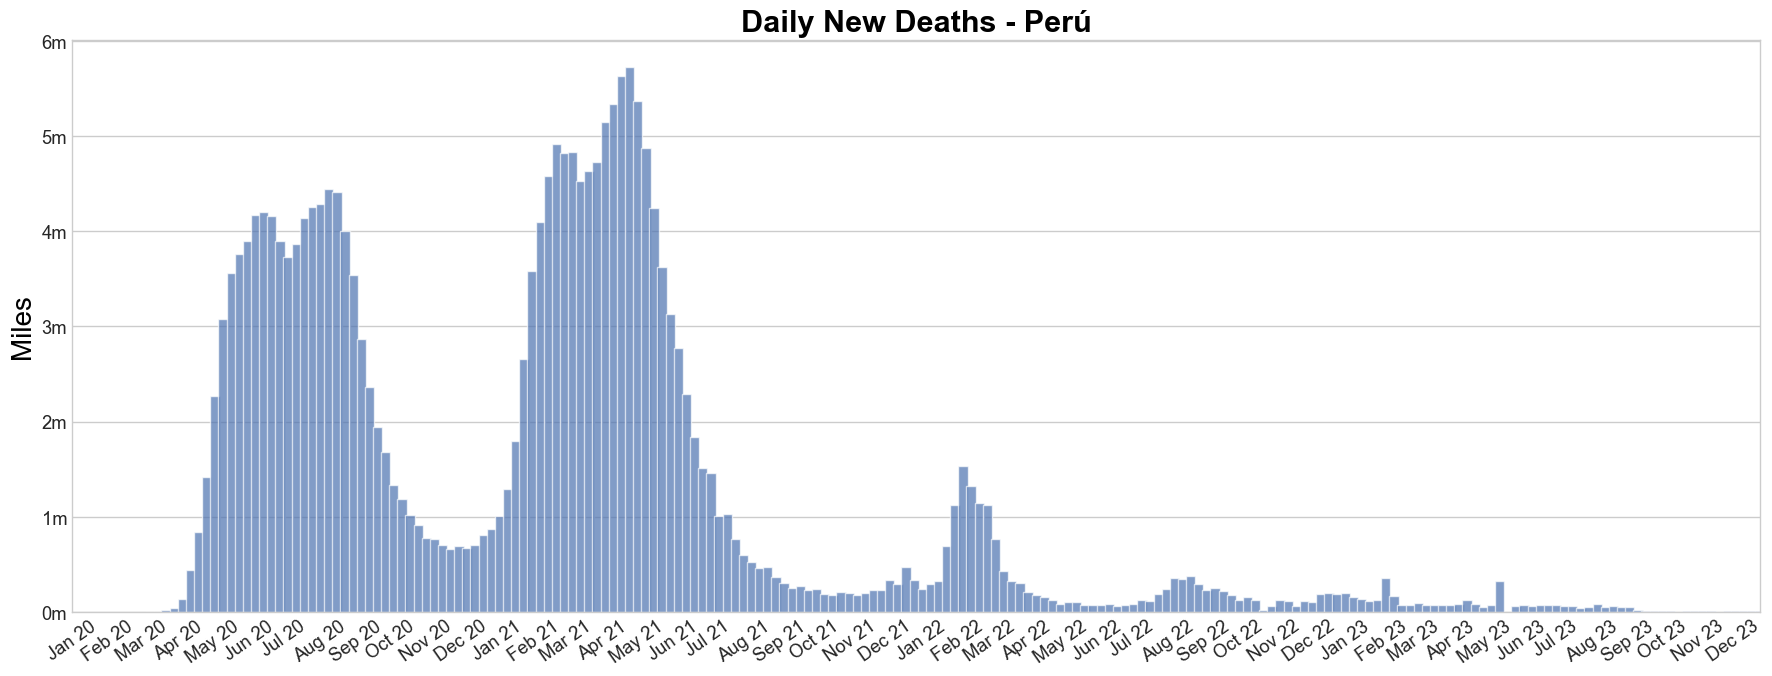

In [151]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

plt.figure(figsize=(18,7))
plt.bar(daily_deaths_peru['Date_reported'],daily_deaths_peru['Peru_daily_deaths'],alpha=0.7, width=8)
plt.title('Daily New Deaths - Perú', fontdict={'fontsize': 22, 'fontweight': 'bold', 'color': 'black'})
plt.ylabel('Miles', fontdict={'fontsize': 20, 'color': 'black'})

# Ajustar el límite inferior del eje x a enero de 2020
start_date = pd.to_datetime('2020-01-01')
end_date = daily_deaths_peru['Date_reported'].max()

# Añadir formateo al eje Y con números enteros y "M" para millones
def miles_formatter(x, _):
    return f'{round(x/1e3)}m'

# Formatear las fechas en el eje x y ajustar el intervalo
date_format = mdates.DateFormatter("%b %y")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Mostrar fechas cada 30 días
plt.gca().xaxis.set_major_formatter(date_format)

plt.gca().yaxis.set_major_formatter(FuncFormatter(miles_formatter))

plt.xlim(start_date, end_date) # Establecer los límites del eje x
plt.grid(axis='x')
plt.xticks(rotation=35)
plt.tight_layout()
plt.show()

### 3.6.2 México - Análisis Nuevos Decesos

In [152]:
## Discriminamos los decesos diarios, solo para cuando tengamos valores mayores a cero
daily_deaths_mexico = df_grouped_to_evaluate[['Date_reported','Mexico_daily_deaths']]
daily_deaths_mexico = daily_deaths_mexico[daily_deaths_mexico['Mexico_daily_deaths']>0]
daily_deaths_mexico

Country Date_reported  Mexico_daily_deaths
11         2020-03-22                  4.0
12         2020-03-29                 24.0
13         2020-04-05                146.0
14         2020-04-12                382.0
15         2020-04-19                749.0
..                ...                  ...
204        2023-12-03                  9.0
205        2023-12-10                  2.0
206        2023-12-17                  8.0
207        2023-12-24                  6.0
208        2023-12-31                  3.0

[197 rows x 2 columns]

**VISUALIZACIÓN GRÁFICA DE DECESOS DIARIOS - MÉXICO**

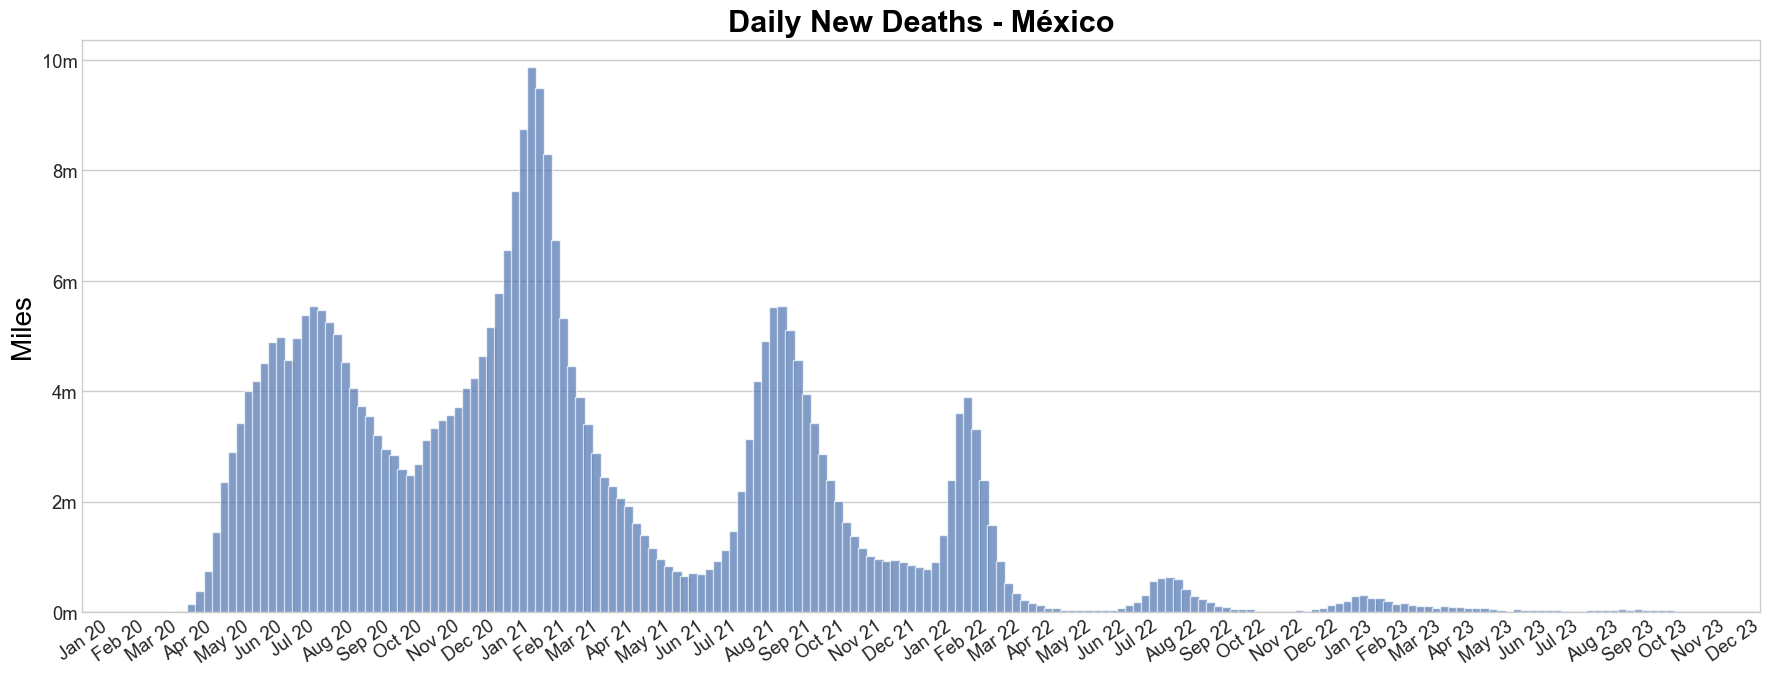

In [153]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

plt.figure(figsize=(18,7))
plt.bar(daily_deaths_mexico['Date_reported'],daily_deaths_mexico['Mexico_daily_deaths'],alpha=0.7, width=8)
plt.title('Daily New Deaths - México', fontdict={'fontsize': 22, 'fontweight': 'bold', 'color': 'black'})
plt.ylabel('Miles', fontdict={'fontsize': 20, 'color': 'black'})

# Ajustar el límite inferior del eje x a enero de 2020
start_date = pd.to_datetime('2020-01-01')
end_date = daily_deaths_peru['Date_reported'].max()

# Añadir formateo al eje Y con números enteros y "M" para millones
def miles_formatter(x, _):
    return f'{round(x/1e3)}m'

# Formatear las fechas en el eje x y ajustar el intervalo
date_format = mdates.DateFormatter("%b %y")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Mostrar fechas cada 30 días
plt.gca().xaxis.set_major_formatter(date_format)

plt.gca().yaxis.set_major_formatter(FuncFormatter(miles_formatter))

plt.xlim(start_date, end_date) # Establecer los límites del eje x
plt.grid(axis='x')
plt.xticks(rotation=35)
plt.tight_layout()
plt.show()

### 3.6.3 Colombia - Análisis Nuevos Decesos

In [154]:
## Discriminamos los decesos diarios, solo para cuando tengamos valores mayores a cero
daily_deaths_colombia = df_grouped_to_evaluate[['Date_reported','Colombia_daily_deaths']]
daily_deaths_colombia = daily_deaths_colombia[daily_deaths_colombia['Colombia_daily_deaths']>0]
daily_deaths_colombia

Country Date_reported  Colombia_daily_deaths
12         2020-03-29                    6.0
13         2020-04-05                   19.0
14         2020-04-12                   55.0
15         2020-04-19                   73.0
16         2020-04-26                   72.0
..                ...                    ...
171        2023-04-16                    8.0
172        2023-04-23                    8.0
173        2023-04-30                    7.0
174        2023-05-07                    9.0
175        2023-05-14                    5.0

[163 rows x 2 columns]

**VISUALIZACIÓN GRÁFICA DE DECESOS DIARIOS - MÉXICO**

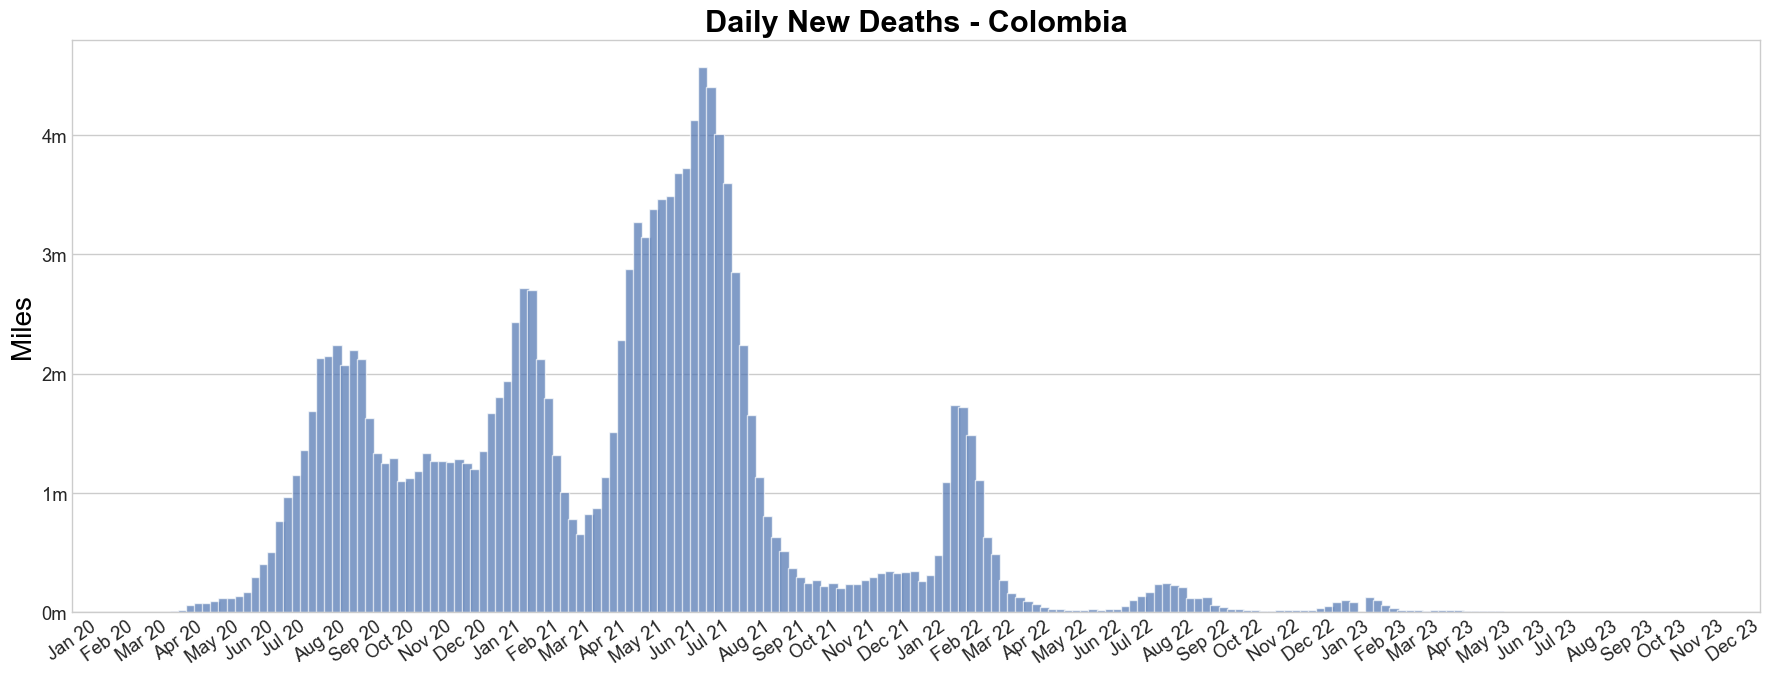

In [155]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

plt.figure(figsize=(18,7))
plt.bar(daily_deaths_colombia['Date_reported'],daily_deaths_colombia['Colombia_daily_deaths'],alpha=0.7, width=8)
plt.title('Daily New Deaths - Colombia', fontdict={'fontsize': 22, 'fontweight': 'bold', 'color': 'black'})
plt.ylabel('Miles', fontdict={'fontsize': 20, 'color': 'black'})

# Ajustar el límite inferior del eje x a enero de 2020
start_date = pd.to_datetime('2020-01-01')
end_date = daily_deaths_peru['Date_reported'].max()

# Añadir formateo al eje Y con números enteros y "M" para millones
def miles_formatter(x, _):
    return f'{round(x/1e3)}m'

# Formatear las fechas en el eje x y ajustar el intervalo
date_format = mdates.DateFormatter("%b %y")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Mostrar fechas cada 30 días
plt.gca().xaxis.set_major_formatter(date_format)

plt.gca().yaxis.set_major_formatter(FuncFormatter(miles_formatter))

plt.xlim(start_date, end_date) # Establecer los límites del eje x
plt.grid(axis='x')
plt.xticks(rotation=35)
plt.tight_layout()
plt.show()

## 3.7 ¿Cómo evolucionan los casos acumulados en todos los países a nivel mundial - Gráfico Coroplético?

In [156]:
## Instalar geopandas si es que no se ha hecho previamente
#!pip install geopandas
#!pip install mapclassify

In [171]:
import geopandas as gpd
import pandas as pd

In [172]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

* Trabajaremos con el dataset del medio, ya que se trata de los datos geoespaciales del mundo

In [173]:
# Creamos la variable que se convertirá en nuestro Geodataframe
mundo = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
mundo

C:\Users\david\AppData\Local\Temp\ipykernel_18620\1364715561.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  mundo = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


pop_est      continent                      name iso_a3  gdp_md_est  \
0       889953.0        Oceania                      Fiji    FJI        5496   
1     58005463.0         Africa                  Tanzania    TZA       63177   
2       603253.0         Africa                 W. Sahara    ESH         907   
3     37589262.0  North America                    Canada    CAN     1736425   
4    328239523.0  North America  United States of America    USA    21433226   
..           ...            ...                       ...    ...         ...   
172    6944975.0         Europe                    Serbia    SRB       51475   
173     622137.0         Europe                Montenegro    MNE        5542   
174    1794248.0         Europe                    Kosovo    -99        7926   
175    1394973.0  North America       Trinidad and Tobago    TTO       24269   
176   11062113.0         Africa                  S. Sudan    SSD       11998   

                                              geometry  
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
..                                                 ...  
172  POLYGON ((18.82982 45.90887, 18.82984 45.90888...  
173  POLYGON ((20.07070 42.58863, 19.80161 42.50009...  
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...  
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...  
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...  

[177 rows x 6 columns]

In [174]:
# Podemos ver y modificar el sistema de coordenadas
mundo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

* Para modificar el sistema de coordenadas utilizaremos la función to_crs con el código EPGS correspondiente para la nueva proyección

In [175]:
## Reproyectaremos en el sistema de proyección Mercator
world = mundo.to_crs('EPSG:3395')
world.crs

<Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [176]:
## De ser necesario
# !pip install --upgrade geopandas
# !pip install --upgrade numba

In [177]:
# mundo.plot(mundo['pop_est'], figsize=(12,13), legend=True, scheme='MaxP')

In [178]:
# mundo.plot(mundo['pop_est'], figsize=(12,13), legend=True, scheme='Quantiles')

In [179]:
## Verificamos el dataframe con el que trabajeremos
df_covid_limpio_final

Date_reported Country_code      Country  New_cases  Cumulative_cases  \
0        2020-01-05           AF  Afghanistan          0                 0   
1        2020-01-12           AF  Afghanistan          0                 0   
2        2020-01-19           AF  Afghanistan          0                 0   
3        2020-01-26           AF  Afghanistan          0                 0   
4        2020-02-02           AF  Afghanistan          0                 0   
...             ...          ...          ...        ...               ...   
49388    2023-12-24           ZW     Zimbabwe         23            266048   
49389    2023-12-31           ZW     Zimbabwe         23            266071   
49390    2024-01-07           ZW     Zimbabwe         46            266117   
49391    2024-01-14           ZW     Zimbabwe         85            266202   
49392    2024-01-21           ZW     Zimbabwe         55            266257   

       New_deaths  Cumulative_deaths  lethality_rate  
0               0                  0        0.000000  
1               0                  0        0.000000  
2               0                  0        0.000000  
3               0                  0        0.000000  
4               0                  0        0.000000  
...           ...                ...             ...  
49388           1               5731        2.154123  
49389           0               5731        2.153936  
49390           3               5734        2.154691  
49391           3               5737        2.155130  
49392           0               5737        2.154685  

[49393 rows x 8 columns]

In [181]:
## Agrupamos el dataframe por país y casos acumulados
df_new = df_covid_limpio_final[['Country_code','Cumulative_cases']]
df_new = df_new.groupby('Country_code').max().reset_index()
df_new

Country_code  Cumulative_cases
0             AD             48015
1             AE           1067030
2             AF            231063
3             AG              9106
4             AI              3904
..           ...               ...
228           YE             11945
229           YT             42027
230           ZA           4072636
231           ZM            349304
232           ZW            266257

[233 rows x 2 columns]

In [182]:
!pip install pycountry

In [183]:
## Convertimos codigos de países para poder realizar el merge
import pycountry

# Función para convertir códigos alpha-2 a alpha-3
def convert_alpha2_to_alpha3(alpha2):
    try:
        country = pycountry.countries.get(alpha_2=alpha2)
        return country.alpha_3
    except AttributeError:
        return None

# Aplicar la función a la columna 'iso_a3'
df_new['Country_code'] = df_new['Country_code'].apply(convert_alpha2_to_alpha3)
df_new = df_new.copy()
df_new.rename(columns={'Country_code': 'iso_a3'}, inplace=True)

df_new

iso_a3  Cumulative_cases
0      AND             48015
1      ARE           1067030
2      AFG            231063
3      ATG              9106
4      AIA              3904
..     ...               ...
228    YEM             11945
229    MYT             42027
230    ZAF           4072636
231    ZMB            349304
232    ZWE            266257

[233 rows x 2 columns]

In [184]:
## Hacemos un merge para combinar dataframes
union = pd.merge(mundo, df_new, on='iso_a3', how='left')
union

pop_est      continent                      name iso_a3  gdp_md_est  \
0       889953.0        Oceania                      Fiji    FJI        5496   
1     58005463.0         Africa                  Tanzania    TZA       63177   
2       603253.0         Africa                 W. Sahara    ESH         907   
3     37589262.0  North America                    Canada    CAN     1736425   
4    328239523.0  North America  United States of America    USA    21433226   
..           ...            ...                       ...    ...         ...   
172    6944975.0         Europe                    Serbia    SRB       51475   
173     622137.0         Europe                Montenegro    MNE        5542   
174    1794248.0         Europe                    Kosovo    -99        7926   
175    1394973.0  North America       Trinidad and Tobago    TTO       24269   
176   11062113.0         Africa                  S. Sudan    SSD       11998   

                                              geometry  Cumulative_cases  
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...           69047.0  
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...           43223.0  
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...               NaN  
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...         4771226.0  
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...       103436829.0  
..                                                 ...               ...  
172  POLYGON ((18.82982 45.90887, 18.82984 45.90888...         2583470.0  
173  POLYGON ((20.07070 42.58863, 19.80161 42.50009...          251280.0  
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...               NaN  
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...          191496.0  
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...           18819.0  

[177 rows x 7 columns]

In [185]:
union.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   pop_est           177 non-null    float64 
 1   continent         177 non-null    object  
 2   name              177 non-null    object  
 3   iso_a3            177 non-null    object  
 4   gdp_md_est        177 non-null    int64   
 5   geometry          177 non-null    geometry
 6   Cumulative_cases  169 non-null    float64 
dtypes: float64(2), geometry(1), int64(1), object(3)
memory usage: 11.1+ KB


In [188]:
union.isnull().sum()

pop_est             0
continent           0
name                0
iso_a3              0
gdp_md_est          0
geometry            0
Cumulative_cases    8
dtype: int64

In [189]:
union = union.dropna()
union.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 169 entries, 0 to 176
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   pop_est           169 non-null    float64 
 1   continent         169 non-null    object  
 2   name              169 non-null    object  
 3   iso_a3            169 non-null    object  
 4   gdp_md_est        169 non-null    int64   
 5   geometry          169 non-null    geometry
 6   Cumulative_cases  169 non-null    float64 
dtypes: float64(2), geometry(1), int64(1), object(3)
memory usage: 10.6+ KB


In [190]:
union = union[['iso_a3','Cumulative_cases','geometry','pop_est','name']]
union

iso_a3  Cumulative_cases  \
0      FJI           69047.0   
1      TZA           43223.0   
3      CAN         4771226.0   
4      USA       103436829.0   
5      KAZ         1503205.0   
..     ...               ...   
171    MKD          350244.0   
172    SRB         2583470.0   
173    MNE          251280.0   
175    TTO          191496.0   
176    SSD           18819.0   

                                              geometry      pop_est  \
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...     889953.0   
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...   58005463.0   
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...   37589262.0   
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  328239523.0   
5    POLYGON ((87.35997 49.21498, 86.59878 48.54918...   18513930.0   
..                                                 ...          ...   
171  POLYGON ((22.38053 42.32026, 22.88137 41.99930...    2083459.0   
172  POLYGON ((18.82982 45.90887, 18.82984 45.90888...    6944975.0   
173  POLYGON ((20.07070 42.58863, 19.80161 42.50009...     622137.0   
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...    1394973.0   
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...   11062113.0   

                         name  
0                        Fiji  
1                    Tanzania  
3                      Canada  
4    United States of America  
5                  Kazakhstan  
..                        ...  
171           North Macedonia  
172                    Serbia  
173                Montenegro  
175       Trinidad and Tobago  
176                  S. Sudan  

[169 rows x 5 columns]

In [194]:
# # Crear un DataFrame GeoPandas a partir de tu DataFrame existente
# gdf = gpd.GeoDataFrame(union, geometry='geometry')

# # Configuraciones del gráfico
# fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# # Plotear el mapa coroplético
# gdf.plot(column='Cumulative_cases', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# # Agregar etiquetas y título
# ax.set_title('Casos acumulados por país', fontdict={'fontsize': '20', 'fontweight' : '3'})
# ax.set_xlabel('Longitud')
# ax.set_ylabel('Latitud')

# # Ajustar la ubicación de la leyenda
# ax.legend(loc='upper right', bbox_to_anchor=(1, 0.5))

# # Mostrar el gráfico
# plt.show()

In [195]:
## De ser necesario
# !pip install plotly

**VISUALIZACIÓN DEL GRÁFICO COROPLÉTICO - CASOS ACUMULADOS COVID 19 - NIVEL MUNDIAL**

In [193]:
import plotly.express as px

# Crear un DataFrame GeoPandas a partir de tu DataFrame existente
gdf = gpd.GeoDataFrame(union, geometry='geometry')

# Crear el gráfico interactivo con Plotly Express
fig = px.choropleth_mapbox(
    gdf, 
    geojson=gdf.geometry.geometry.__geo_interface__,
    locations=gdf.index,
    color='Cumulative_cases',
    hover_name='name',
    mapbox_style="carto-positron",
    center={"lat": gdf.geometry.centroid.y.mean(), "lon": gdf.geometry.centroid.x.mean()},
    zoom=1.5,
)

# Configurar la presentación del gráfico
fig.update_layout(
    title='Casos acumulados por país',
    margin={"r":0,"t":0,"l":0,"b":0}
)

# Mostrar el gráfico interactivo
fig.show()

C:\Users\david\AppData\Local\Temp\ipykernel_18620\857525179.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center={"lat": gdf.geometry.centroid.y.mean(), "lon": gdf.geometry.centroid.x.mean()},


In [197]:
# Guardar el gráfico como un archivo HTML
fig.write_html("grafico_interactivo.html")

# 4. CONCLUSIONES FINALES

* Los países más afectados por el Covid19, fueron **USA y CHINA**, consiguiendo casos registrados de **covid 19** y decesos records comparados con los demás países. Tener en cuenta que un **factor importante** es la **densidad de población del país**, esto generó que estos países concentraran toda esta magnitud.


* **México**, tuvo un **periodo complicado** de la pandemia durante el **primer año y medio**. Fue afectada por varias variantes, pero una de las que generó picos de nuevos casos y decesos fue la variante **Delta**. Si bien los fallecidos también tuvieron picos en estos periodos, no fueron comparables a los picos conseguidos al inicio de la pandemia, quizás ocasionado por la no correcta adopción de medidas sanitarias y concientización de la población.


* **Perú**, tuvo un **periodo complicado** de la pandemia durante el **primer año y medio**, teniendo crisis sanitaria y hospitalaria fuerte. El proceso de vacunación fue tardado, esto alimento a que los decesos fueran no controlables en este periodo inicial. Después de este periodo complicado, perú puede controlar adecuadamente el **Covid19**, consiguiendo que gran parte de la población logre vacunarse y asi los decesos disminuyeron considerablemente hasta el final de la pandemia. La primeras variantes del covid19 afectaron mucho a perú, sin embargo, cuando llegó la variante **Omicrón**, se pudo controlar el número de decesos por más que los nuevos casos siguieron aumentando por intervalos de tiempo.


* **Colombia**, tuvo un **periodo complicado** de la pandemia durante el **primer año y medio**. Los nuevos casos como los decesos aumentaban a rates parecidos, esto generó descontrol en el país, con **crisis sanitaria y hospitalaria fuerte**. Despues de este periodo gris, colombia **pudo controlar medianamente el covid19**, debido a su aumento en la **vacunacion de la población**; Sin embargo algunas nuevas variantes como el **Omicrón**, generaron intervalos de preocupación y crisis.


* Cada país se vió afectado de distinta manera por las diferentes variantes del **Covid19**, no todas afectaron en misma magnitud a todos los países.


* Luego de analizar la data para los múltiples países, se puede concluir que el **proceso de vacunación**, cuando se empezó a adoptar si **tuvo resultados favorables** en los meses posteriores. Esto se puede visualizar en los **gráficos de nuevos casos como de decesos**, cuando se analiza los periodos de implementación.

# 5. RECOMENDACIONES

* **Fortalecimiento de Medidas sanitarias y Concientización a la Población**: Es importante reforzar y promover las medidas sanitarias en crisis como las que vivimos. El uso de mascarillas y distanciamiento social son primordiales. Concientizar a la población es de suma importancia. Se recomienda invertir más en los centros de salud locales, tanto en la capital como en las zonas rurales. Tener un sistema nacional que provee de forma gratuita mascarillas en los centros de salud, como medida de concientización. Crear Propaganda sobre la importancia del lavado de manos y la continuidad anual de la vacunación.

* **Agilizar el Proceso de Vacunación**: Es importante tener en cuenta que los procesos de vacucación son fundamentales para combatir pandemias, endemias, etc. Se recomienda tener alianzas estrategicas con los distintos paises que puedan proveer este tipo de vacunas. Invertir en centros de investigación nacionales y promover la participación de cientificos locales.

* **Mejora de la Infraestructura de Salud**: Se recomienda la construcción de hospitales temporales y adquirir nuevas camas hospitalarias y euipos médicos esenciales. Creación de plantas de oxígeno.

* **Adaptabilidad a Nuevas Variantes**: Desarrollar nuevos planes de respuesta rápida. Generar socios estratégicos en la región y a nivel mundial a fin de poder adquirir nuevas vacunas de ser el caso o camas hospitalarias.

* **Implementar Programas Sociales**: Se recomienda crear centros de apoyo psicológico para poder tratar los traumas que se puedan gestionar durante y después de pandemias como estas.